# AIRBNB PRICE FORECASTER BY KAREN BLANCO

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as mplot
%matplotlib inline 

In [2]:
import os
print(os.getcwd())

d:\AI Bootcamp Github\bnb_forecaster_ML\notebooks


In [3]:
import sys
import os

# Ruta del intérprete de Python
print("Python executable path:", sys.executable)

# Nombre del entorno (si estás usando Anaconda/Miniconda)
conda_env = os.environ.get("CONDA_DEFAULT_ENV", "No conda environment detected")
print("Conda environment:", conda_env)

# Versión de Python
print("Python version:", sys.version)

# Ruta actual de trabajo
print("Current working directory:", os.getcwd())


Python executable path: c:\Users\kshad\anaconda3\envs\py310_env\python.exe
Conda environment: py310_env
Python version: 3.10.16 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:19:12) [MSC v.1929 64 bit (AMD64)]
Current working directory: d:\AI Bootcamp Github\bnb_forecaster_ML\notebooks


**El data set presenta problemas de lectura por lo que para evitar esto chequeamos si hay extra commas, espacios indeseados dentro de celdas, quotes sin cerrar,etc. Podemos aplicar un sep o delimiter=';'**

## 1. Análisis previo a preparación de datos

Vamos a conocer un poco la data y sus tipos. Nos muestra que hay 14780 entradas y 89 columnas.

In [197]:

bnb_data = pd.read_csv("./data/airbnb-listings-extract.csv",sep=';', decimal='.', encoding='utf-8')
print("bnb_data Shape:", bnb_data .shape)
pd.set_option('display.max_columns', None)
bnb_data .head(5)

bnb_data Shape: (14780, 89)


ID                            Listing Url       Scrape ID  \
0  11210388  https://www.airbnb.com/rooms/11210388  20170306202425   
1  17471131  https://www.airbnb.com/rooms/17471131  20170407214050   
2  17584891  https://www.airbnb.com/rooms/17584891  20170407214050   
3   5398030   https://www.airbnb.com/rooms/5398030  20170407214050   
4  18104606  https://www.airbnb.com/rooms/18104606  20170407214050   

  Last Scraped                                 Name  \
0   2017-03-07       The Loft-Full Bath-Deck w/View   
1   2017-04-08           Claris I, Friendly Rentals   
2   2017-04-08  Style Terrace Red, Friendly Rentals   
3   2017-04-08    Picasso Suite 1.4 Paseo de Gracia   
4   2017-04-08       Smart City Centre Apartment II   

                                             Summary  \
0  Loft in the Hill country 12-15 minutes directl...   
1  This apartment has: 1 double bed, 1 double sof...   
2  This apartment has: 1 double bed, 1 double sof...   
3  Live like a local in Barcelona's most chic dis...   
4  Unique apartment in vibrant neighborhoods, car...   

                                               Space  \
0  This loft has a spectacular view of the hills ...   
1  This apartment has: 1 double bed, 1 double sof...   
2  This apartment has: 1 double bed, 1 double sof...   
3  You wake up to the sun rising over Barcelona's...   
4  License: HUTB-005313 Charming apartment, locat...   

                                         Description Experiences Offered  \
0  Loft in the Hill country 12-15 minutes directl...                none   
1  This apartment has: 1 double bed, 1 double sof...                none   
2  This apartment has: 1 double bed, 1 double sof...                none   
3  Live like a local in Barcelona's most chic dis...                none   
4  Unique apartment in vibrant neighborhoods, car...                none   

                               Neighborhood Overview  \
0  This neighborhood is located in the hills west...   
1  Plaza   Cataluña Catalonia Square is the large...   
2  Plaza   Cataluña Catalonia Square is the large...   
3  We're right in the heart of the chic L'Eixampl...   
4                                                NaN   

                                               Notes  \
0  The loft is located on a gated property.  Ther...   
1                                                NaN   
2                                                NaN   
3                          Local permit: HUTB-006794   
4                                                NaN   

                                             Transit  \
0  There is no public transportation from this lo...   
1  Ideal to discover the city either on foot or b...   
2  Ideal to discover the city either on foot or b...   
3  Whatever it is you came to see in Barcelona, I...   
4                                                NaN   

                                              Access  \
0  The loft is entirely private to the guest as i...   
1  Travellers will have access to the entire apar...   
2  Travellers will have access to the entire apar...   
3  This property features keyless entry, making i...   
4                                                NaN   

                                         Interaction  \
0  My wife and I live on the property so we would...   
1  We will be more than happy to help you with an...   
2  We will be more than happy to help you with an...   
3  I'm an Aussie who's lived in Barcelona for alm...   
4                                                NaN   

                                         House Rules  \
0  The loft is entirely private but is adjacent t...   
1  CHECK-IN Week Days: The check-in and key colle...   
2  CHECK-IN Week Days: The check-in and key colle...   
3  Welcome to Barcelona! This will be your home n...   
4                                                NaN   

                                       Thumbnail Url  \
0  https://a0.muscache.com/im/pictures/c351a9b5-

In [198]:
print("Columns in the DataFrame:")
print(bnb_data .columns)


Columns in the DataFrame:
Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'We

In [199]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

bnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

In [200]:
#Hacemos un .describe para hacer una analisis rapido de la distribucion central y tendencias.

bnb_data.describe()

ID     Scrape ID       Host ID  Host Response Rate  \
count  1.478000e+04  1.478000e+04  1.478000e+04        12881.000000   
mean   1.028089e+07  2.017037e+13  3.608080e+07           94.823461   
std    5.564829e+06  5.667971e+08  3.425360e+07           15.215988   
min    1.862800e+04  2.016010e+13  1.745300e+04            0.000000   
25%    5.554732e+06  2.017041e+13  6.787360e+06          100.000000   
50%    1.133492e+07  2.017041e+13  2.464875e+07          100.000000   
75%    1.532631e+07  2.017041e+13  5.432919e+07          100.000000   
max    1.910969e+07  2.017062e+13  1.247534e+08          100.000000   

       Host Listings Count  Host Total Listings Count      Latitude  \
count         14777.000000               14777.000000  14780.000000   
mean             12.513636                  12.513636     40.497626   
std              34.090223                  34.090223      4.641387   
min               0.000000                   0.000000    -37.851182   
25%               1.000000                   1.000000     40.409726   
50%               2.000000                   2.000000     40.419466   
75%               6.000000                   6.000000     40.430916   
max             519.000000                 519.000000     55.966912   

          Longitude  Accommodates     Bathrooms      Bedrooms         Beds  \
count  14780.000000  14780.000000  14725.000000  14755.000000  14731.00000   
mean      -3.858041      3.277808      1.281732      1.343816      2.04426   
std       14.123146      2.097291      0.658517      0.900078      1.61277   
min     -123.131344      1.000000      0.000000      0.000000      1.00000   
25%       -3.707604      2.000000      1.000000      1.000000      1.00000   
50%       -3.700785      3.000000      1.000000      1.000000      2.00000   
75%       -3.684057      4.000000      1.000000      2.000000      2.00000   
max      153.371427     16.000000      8.000000     10.000000     16.00000   

       Square Feet         Price  Weekly Price  Monthly Price  \
count   598.000000  14763.000000   3590.000000    3561.000000   
mean    390.456522     73.561471    376.937883    1426.125246   
std     637.134930     72.062050    195.701043    1246.403853   
min       0.000000      9.000000     70.000000     250.000000   
25%       0.000000     34.000000    215.000000     720.000000   
50%      98.500000     55.000000    350.000000    1200.000000   
75%     646.000000     86.000000    500.000000    1725.000000   
max    6997.000000    999.000000    999.000000   25000.000000   

       Security Deposit  Cleaning Fee  Guests Included  Extra People  \
count       6256.000000   8687.000000     14780.000000  14780.000000   
mean         189.226822     31.805341         1.589986      7.690460   
std          115.151070     30.878599         1.182550     12.971352   
min            0.000000      0.000000         0.000000      0.000000   
25%          100.000000     15.000000         1.000000      0.000000   
50%          150.000000     25.000000         1.000000      0.000000   
75%          200.000000     40.000000         2.000000     15.000000   
max          990.000000    662.000000        16.000000    500.000000   

       Minimum Nights  Maximum Nights  Availability 30  Availability 60  \
count    14780.000000    14780.000000     14780.000000     14780.000000   
mean         3.050474      945.168742         8.954736        22.996211   
std         12.266517     8439.321218         9.333252        19.731371   
min          1.000000        1.000000         0.000000         0.000000   
25%          1.000000      365.000000         0.000000         4.000000   
50%          2.000000     1125.000000         6.000000        20.000000   
75%          3.000000     1125.000000        14.000000        38.000000   
max       1125.000000  1000000.000000        30.000000        60.000000   

       Availability 90  Availability 365  Number of Reviews  \
count     14780.000000      14780.000000       14780.000000 

In [201]:
#Chequeamos si hay nulls para indentificarlos.

bnb_data.isnull().sum()

ID                                    0
Listing Url                           0
Scrape ID                             0
Last Scraped                          0
Name                                  1
Summary                             591
Space                              3892
Description                           6
Experiences Offered                   0
Neighborhood Overview              5646
Notes                              9136
Transit                            5714
Access                             6462
Interaction                        6554
House Rules                        5161
Thumbnail Url                      2820
Medium Url                         2820
Picture Url                          19
XL Picture Url                     2820
Host ID                               0
Host URL                              0
Host Name                             3
Host Since                            3
Host Location                        43
Host About                         5241


Chequeamos el % de Missing Values que tiene cada item para poder eliminar las que tengan un % alto y no sirvan apra nuestro modelo.
Has availability, Jurisdiction Names, License, Host Aceptance Rate no son relevantes para precio y peuden descartarse.

In [202]:
bnb_data.isnull().sum()/bnb_data.shape[0]*100

ID                                 0.000000
Listing Url                        0.000000
Scrape ID                          0.000000
Last Scraped                       0.000000
Name                               0.006766
Summary                            3.998647
Space                             26.332882
Description                        0.040595
Experiences Offered                0.000000
Neighborhood Overview             38.200271
Notes                             61.813261
Transit                           38.660352
Access                            43.721245
Interaction                       44.343708
House Rules                       34.918809
Thumbnail Url                     19.079838
Medium Url                        19.079838
Picture Url                        0.128552
XL Picture Url                    19.079838
Host ID                            0.000000
Host URL                           0.000000
Host Name                          0.020298
Host Since                      

In [203]:
#Chequear duplicados

bnb_data.duplicated().sum()

0

In [204]:
bnb_data.select_dtypes(include="object").columns


Index(['Listing Url', 'Last Scraped', 'Name', 'Summary', 'Space',
       'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes',
       'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url',
       'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name',
       'Host Since', 'Host Location', 'Host About', 'Host Response Time',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Property Type', 'Room Type', 'Bed Type', 'Amenities',
       'Calendar Updated', 'Has Availability', 'Calendar last Scraped',
       'First Review', 'Last Review', 'License', 'Jurisdiction Names',
       'Cancellation Policy', 'Geolocation', 'Features'],
      dtype='object')

### *Eliminamos features que no seran relevantes para el label precio desde un inicio:*


❌**ID, Listing Url, Scrape ID, Host ID, Host URL, Picture URLs, Thumbnail URLs.:** son identificadores únicos y no aportan valor al modelo. No tienen ninguna relación directa con el precio del Airbnb.

❌**Last Scraped, Calendar Last Scraped, Host Since:** Estas son fechas relacionadas con el scraping o actividad temporal que no contribuyen directamente a la predicción del precio.

❌**Host Name, Host Thumbnail Url, Host Picture Url, Host Location:** Información del host que no es relevante para determinar el precio de la propiedad.

❌**Name, Space, Description, Neighborhood Overview, Notes, Transit, Access, Interaction, House Rules:** Estas columnas son principalmente textuales, utiliaremos NLP con las mas relevantes en la predicción del precio como summary y description.

❌**Experiences Offered:** Esta columna tiene muy poco valor porque el campo parece ser estático en la mayoría de los casos.

❌**Medium Url, XL Picture Url, Features:** No contribuyen a la predicción de precios.

❌**Host About:** Esta columna es información descriptiva del host, sin influencia directa en el precio.

❌**Host Response Time, Host Response Rate, Host Acceptance Rate:** Aunque podrían ser relevantes para la satisfacción del cliente, la influencia en el precio es indirecta y no fundamental para una primera aproximación.

❌**License, Jurisdiction Names:** Información de licencias locales que no tiene impacto en el precio.

❌**Calendar Updated:** Información sobre cuándo se actualizó el calendario que no tiene impacto directo en el precio.

❌**Has Availability:** Esta columna tiene muy pocos datos completos (solo 12 no nulos), por lo que no aporta al modelo.

❌**Geolocation, Street:** ya tenemos columna de latitude y longitude y con zipcode, neighborhud tenemos info exacta de localizacion, evitamos redundancia

❌**Thumbnail Url, Medium Url, XL Picture Url, Picture Url:** Enlaces a imágenes que no contribuyen a la predicción.

❌**Calculated host listings count, Host Listings Count:** tienen bastante correlacion con Total Host listings count, eliminamos 2 para evitar multicolinealidad.

In [205]:
# Features a eliminar
columns_to_drop = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Space', 'Experiences Offered',
    'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 
    'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
    'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url',
    'Host Picture Url', 'Calendar Updated', 'Has Availability', 'Geolocation', 'License', 'Jurisdiction Names', 'Features','Host Neighbourhood',
    'Calculated host listings count','Host Listings Count','Calendar last Scraped','Host Verifications', 'Street'
]

bnb_data_cleaned = bnb_data.drop(columns=columns_to_drop)


In [206]:
# Imprimir cada columna 
for column in sorted(bnb_data_cleaned.columns):
    print(column)


Accommodates
Amenities
Availability 30
Availability 365
Availability 60
Availability 90
Bathrooms
Bed Type
Bedrooms
Beds
Cancellation Policy
City
Cleaning Fee
Country
Country Code
Description
Extra People
First Review
Guests Included
Host Total Listings Count
Last Review
Latitude
Longitude
Market
Maximum Nights
Minimum Nights
Monthly Price
Neighbourhood
Neighbourhood Cleansed
Neighbourhood Group Cleansed
Number of Reviews
Price
Property Type
Review Scores Accuracy
Review Scores Checkin
Review Scores Cleanliness
Review Scores Communication
Review Scores Location
Review Scores Rating
Review Scores Value
Reviews per Month
Room Type
Security Deposit
Smart Location
Square Feet
State
Summary
Weekly Price
Zipcode


In [207]:
bnb_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Summary                       14189 non-null  object 
 1   Description                   14774 non-null  object 
 2   Host Total Listings Count     14777 non-null  float64
 3   Neighbourhood                 9551 non-null   object 
 4   Neighbourhood Cleansed        14780 non-null  object 
 5   Neighbourhood Group Cleansed  13760 non-null  object 
 6   City                          14774 non-null  object 
 7   State                         14636 non-null  object 
 8   Zipcode                       14274 non-null  object 
 9   Market                        14723 non-null  object 
 10  Smart Location                14780 non-null  object 
 11  Country Code                  14780 non-null  object 
 12  Country                       14779 non-null  object 
 13  L

In [208]:
bnb_data_cleaned.isnull().sum()

Summary                           591
Description                         6
Host Total Listings Count           3
Neighbourhood                    5229
Neighbourhood Cleansed              0
Neighbourhood Group Cleansed     1020
City                                6
State                             144
Zipcode                           506
Market                             57
Smart Location                      0
Country Code                        0
Country                             1
Latitude                            0
Longitude                           0
Property Type                       0
Room Type                           0
Accommodates                        0
Bathrooms                          55
Bedrooms                           25
Beds                               49
Bed Type                            0
Amenities                         170
Square Feet                     14182
Price                              17
Weekly Price                    11190
Monthly Pric

In [209]:
import re
import unicodedata

# Convertir los nombres de las columnas a minúsculas, quitar acentos y eliminar caracteres especiales
bnb_data_cleaned.columns = (
    bnb_data_cleaned.columns
    .str.lower()
    .str.strip()
    .str.normalize('NFD')                           # Normaliza en NFD para separar acentos
    .str.encode('ascii', errors='ignore')           # Convierte a ASCII, ignorando los acentos
    .str.decode('utf-8')                            # Decodifica de nuevo a UTF-8
    .str.replace(r'\s+', '_', regex=True)
    .str.replace(r'[^a-z0-9_]', '', regex=True)
)

# Convertir los valores de las celdas a minúsculas y eliminar caracteres especiales, 
# PERO manteniendo comas dentro de las celdas y quitando únicamente los acentos (sin borrar la vocal)
bnb_data_cleaned = bnb_data_cleaned.apply(
    lambda x: x.str.lower().str.strip().apply(
        lambda y: re.sub(
            r'[^a-z0-9,\s]', 
            '', 
            unicodedata.normalize('NFD', y).encode('ascii', errors='ignore').decode('utf-8')
        ) if pd.notna(y) else y
    ) if x.dtype == "object" else x
)

bnb_data_cleaned.tail()


summary  \
14775  sometimes i rent as a host im here, guest stil...   
14776  paris 15 residence priveecode  gardien quartie...   
14777  cozy 2 bedroom apartment in core of batignoles...   
14778  the space is in an older victorian home, with ...   
14779  private room sunroom is used for storage at th...   

                                             description  \
14775  sometimes i rent as a host im here, guest stil...   
14776  paris 15 residence priveecode  gardien quartie...   
14777  very functional apartment in one of the most c...   
14778  the space is in an older victorian home, with ...   
14779  private room sunroom is used for storage at th...   

       host_total_listings_count        neighbourhood neighbourhood_cleansed  \
14775                        1.0    bedfordstuyvesant      bedfordstuyvesant   
14776                        1.0  porte de versailles              vaugirard   
14777                        1.0                  NaN     batignollesmonceau   
14778                        1.0       city park west         city park west   
14779                        1.0              ravenna                ravenna   

      neighbourhood_group_cleansed      city        state zipcode    market  \
14775                     brooklyn  brooklyn           ny   11213  new york   
14776                          NaN     paris  iledefrance   75015     paris   
14777                          NaN     paris  iledefrance     NaN     paris   
14778                          NaN    denver           co   80206    denver   
14779          other neighborhoods   seattle           wa   98105   seattle   

      smart_location country_code        country   latitude   longitude  \
14775   brooklyn, ny           us  united states  40.678945  -73.939342   
14776  paris, france           fr         france  48.836197    2.294045   
14777  paris, france           fr         france  48.888809    2.316173   
14778     denver, co           us  united states  39.742205 -104.959933   
14779    seattle, wa           us  united states  47.672327 -122.291451   

        property_type       room_type  accommodates  bathrooms  bedrooms  \
14775       apartment  entire homeapt             2        1.0       1.0   
14776  bed  breakfast    private room             1        1.0       1.0   
14777       apartment  entire homeapt             5        1.0       2.0   
14778       apartment  entire homeapt             4        1.0       1.0   
14779           house    private room             2        1.0       1.0   

       beds  bed_type                                          amenities  \
14775   2.0  real bed  tv,cable tv,internet,wireless internet,air con...   
14776   2.0  real bed  tv,wireless internet,kitchen,breakfast,elevato...   
14777   3.0  real bed  tv,cable tv,internet,wireless internet,air con...   
14778   2.0  real bed  internet,wireless internet,kitchen,heating,was...   
14779   1.0  real bed  tv,cable tv,internet,wireless internet,air con...   

       square_feet  price  weekly_price  monthly_price  security_deposit  \
14775          NaN   90.0           NaN            NaN             150.0   
14776          NaN   75.0           NaN            NaN               NaN   
14777          NaN  100.0           NaN            NaN             400.0   
14778          NaN   99.0           NaN            NaN             200.0   
14779          NaN   74.0         450.0         1800.0             250.0   

       cleaning_fee  guests_included  extra_people  minimum_nights  \
14775          60.0                1             0               1   
14776           NaN                1             0               3   
14777          40.0                3            10               3   
14778          10.0                2            10               2   
14779           NaN                2             0               2   

       maximum_nights  availability_30  availability_60  availability_90  \
14775            1125                7              

In [210]:
# Mostrar las categorías únicas de 'property_type'
unique_property_type_cleaned = bnb_data_cleaned['property_type'].unique()
print("Categorías únicas de property_type:", unique_property_type_cleaned)

# Mostrar el número total de categorías únicas
total_unique_property_types = len(unique_property_type_cleaned)
print("\nNúmero total de categorías únicas en 'property_type':", total_unique_property_types)

# Contar el total de registros por cada categoría en 'property_type'
property_type_counts = bnb_data_cleaned['property_type'].value_counts()
print("\nTotal de registros por cada categoría de Property_type:\n", property_type_counts)

Categorías únicas de property_type: ['loft' 'apartment' 'house' 'condominium' 'camperrv' 'other' 'dorm'
 'bed  breakfast' 'tent' 'boat' 'guesthouse' 'villa' 'hostel' 'townhouse'
 'chalet' 'serviced apartment' 'bungalow' 'boutique hotel' 'guest suite'
 'casa particular' 'timeshare' 'earth house']

Número total de categorías únicas en 'property_type': 22

Total de registros por cada categoría de Property_type:
 property_type
apartment             11962
house                  1368
condominium             363
bed  breakfast          353
loft                    305
other                   225
dorm                     44
guesthouse               42
chalet                   26
villa                    19
townhouse                17
hostel                   16
serviced apartment       13
boutique hotel            6
boat                      4
camperrv                  4
guest suite               3
casa particular           3
earth house               3
bungalow                  2
tent         

In [211]:
# Ver los tipos únicos de amenities presentes en el dataset
unique_amenities = bnb_data_cleaned['amenities'].str.split(',', expand=True).stack().str.strip().unique()
print(unique_amenities)

# Mostrar el número total de categorías únicas
total_unique_amenities = len(unique_amenities)
print("\nNúmero total de categorías únicas en 'amenities':", total_unique_amenities)

['tv' 'cable tv' 'internet' 'wireless internet' 'air conditioning' 'pool'
 'free parking on premises' 'heating' 'familykid friendly'
 'smoke detector' 'carbon monoxide detector' 'fire extinguisher'
 'essentials' 'shampoo' 'lock on bedroom door' '24hour checkin' 'hangers'
 'hair dryer' 'iron' 'laptop friendly workspace' 'self checkin'
 'doorman entry' 'private entrance' 'elevator in building' 'washer'
 'wheelchair accessible' 'kitchen' 'doorman' 'breakfast'
 'buzzerwireless intercom' 'lockbox' 'safety card' 'smoking allowed'
 'first aid kit' 'indoor fireplace' 'dryer'
 'translation missing enhostingamenity49'
 'translation missing enhostingamenity50' 'hot tub' 'pets allowed'
 'keypad' 'private living room' 'pets live on this property' 'cats' 'dogs'
 'suitable for events' 'smartlock' 'gym' 'free parking on street'
 'other pets' 'bathtub' 'washer  dryer' 'crib' 'roomdarkening shades'
 'window guards' 'game console' 'hot water' 'bed linens'
 'extra pillows and blankets' 'microwave' 'coffee

In [212]:
print(bnb_data_cleaned[['first_review', 'last_review']].head(10))

print(bnb_data_cleaned[['first_review', 'last_review']].tail(10))

  first_review last_review
0     20160313    20170226
1     20170305    20170305
2          NaN         NaN
3     20160417    20170302
4          NaN         NaN
5          NaN         NaN
6     20140517    20160923
7     20130725    20170315
8     20170108    20170108
9     20150914    20150914
      first_review last_review
14770          NaN         NaN
14771          NaN         NaN
14772     20140604    20150605
14773          NaN         NaN
14774     20150818    20150818
14775     20140102    20170422
14776          NaN         NaN
14777     20160924    20170326
14778     20160417    20160417
14779     20150807    20151027


In [213]:
# Guardar el dataset limpio antes de dividir
bnb_data_cleaned.to_csv('./data/airbnb-listings-cleaned.csv', sep=';', decimal='.', index=False, encoding='utf-8')


## 1. Carga de datos y división train/test después de análisis previo


In [214]:
#Lo haré con método train_test_split

from sklearn.model_selection import train_test_split

bnb_data_cleaned = pd.read_csv("./data/airbnb-listings-cleaned.csv", sep=';', decimal='.', encoding='utf-8')
train, test = train_test_split(bnb_data_cleaned, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardar
train.to_csv('./data/airbnb-listings-cleaned_train.csv', sep=';', decimal='.', index=False, encoding='utf-8')
test.to_csv('./data/airbnb-listings-cleaned_test.csv', sep=';', decimal='.', index=False, encoding='utf-8')

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. Los llamare df_bnb_train y df_bnb_test

df_bnb_train = pd.read_csv('./data/airbnb-listings-cleaned_train.csv',sep=';', decimal='.', encoding='utf-8')
df_bnb_train.head().T

Dimensiones del dataset de training: (11824, 49)
Dimensiones del dataset de test: (2956, 49)


0  \
summary                       piso recien reformado comoda habitacion con ba...   
description                   piso recien reformado comoda habitacion con ba...   
host_total_listings_count                                                   2.0   
neighbourhood                                                         jeronimos   
neighbourhood_cleansed                                                jeronimos   
neighbourhood_group_cleansed                                             retiro   
city                                                                     madrid   
state                                                       comunidad de madrid   
zipcode                                                                   28014   
market                                                                   madrid   
smart_location                                                    madrid, spain   
country_code                                                                 es   
country                                                                   spain   
latitude                                                              40.407732   
longitude                                                             -3.684819   
property_type                                                         apartment   
room_type                                                        entire homeapt   
accommodates                                                                  4   
bathrooms                                                                   1.0   
bedrooms                                                                    1.0   
beds                                                                        2.0   
bed_type                                                               real bed   
amenities                     tv,internet,wireless internet,air conditioning...   
square_feet                                                                 NaN   
price                                                                      60.0   
weekly_price                                                              550.0   
monthly_price                                                            1250.0   
security_deposit                                                            NaN   
cleaning_fee                                                               25.0   
guests_included                                                               1   
extra_people                                                                  0   
minimum_nights                                                                2   
maximum_nights                                                             1125   
availability_30                                                               9   
availability_60                                                              32   
availability_90                                                              52   
availability_365                                                            117   
number_of_reviews                                                            12   
first_review                                                         20150426.0   
last_review                                                          20170228.0   
review_scores_rating                                                       95.0   
review_scores_accuracy                                                      9.0   
review_scores_cleanliness                                                  10.0   
review_scores_checkin                                                      10.0   
review_scores_communication                                                10.0   
review_scores_location                                                     10.0   
review_scores_value                                                         9.0   
cancellation_policy                                                    moderate   
reviews_per

In [215]:
df_bnb_train.dtypes


summary                          object
description                      object
host_total_listings_count       float64
neighbourhood                    object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
city                             object
state                            object
zipcode                          object
market                           object
smart_location                   object
country_code                     object
country                          object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
beds                            float64
bed_type                         object
amenities                        object
square_feet                     float64
price                           float64


In [216]:
# Ver los tipos únicos de amenities presentes en el dataset
unique_amenities = df_bnb_train['amenities'].str.split(',', expand=True).stack().str.strip().unique()

# Imprimir la cantidad de amenities únicas
print("Número de amenities únicas:", len(unique_amenities))

unique_amenities


Número de amenities únicas: 82


array(['tv', 'internet', 'wireless internet', 'air conditioning',
       'kitchen', 'doorman', 'elevator in building',
       'buzzerwireless intercom', 'heating', 'familykid friendly',
       'washer', 'essentials', 'hangers', 'smoke detector',
       'carbon monoxide detector', 'shampoo', '24hour checkin',
       'hair dryer', 'iron', 'laptop friendly workspace',
       'wheelchair accessible', 'pool', 'free parking on premises',
       'breakfast', 'suitable for events', 'first aid kit', 'safety card',
       'fire extinguisher', 'lock on bedroom door', 'smoking allowed',
       'cable tv', 'translation missing enhostingamenity50',
       'translation missing enhostingamenity49', 'private entrance',
       'dryer', 'pets allowed', 'hot tub', 'indoor fireplace', 'gym',
       'private living room', 'pets live on this property', 'dogs',
       'bathtub', 'self checkin', 'doorman entry', 'cats', 'lockbox',
       'babysitter recommendations', 'roomdarkening shades', 'other pets',
     

## 2. Análisis exploratorio

## 2b. Imputar Nulls

In [218]:
df_bnb_train.isnull().sum()

summary                           473
description                         7
host_total_listings_count           3
neighbourhood                    4159
neighbourhood_cleansed              1
neighbourhood_group_cleansed      818
city                               49
state                             165
zipcode                           399
market                             44
smart_location                      0
country_code                        0
country                             1
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                          44
bedrooms                           20
beds                               37
bed_type                            0
amenities                         141
square_feet                     11350
price                              15
weekly_price                     8943
monthly_pric

In [219]:
import joblib

# Reemplazar 0 con NaN
df_bnb_train['square_feet'] = df_bnb_train['square_feet'].replace(0, np.nan)

# Calcular mediana agrupada y mediana global usando SÓLO el train
group_medians_train = df_bnb_train.groupby(['property_type', 'bedrooms', 'accommodates'])['square_feet'].median()
global_median_train = df_bnb_train['square_feet'].median()

# Imputar con la mediana por grupo
df_bnb_train['square_feet'] = df_bnb_train.apply(
    lambda row: group_medians_train.loc[
        (row['property_type'], row['bedrooms'], row['accommodates'])
    ]
    if pd.isna(row['square_feet']) 
       and (row['property_type'], row['bedrooms'], row['accommodates']) in group_medians_train.index
    else row['square_feet'],
    axis=1
)

# Si aún quedan nulos, imputar con la mediana global
df_bnb_train['square_feet'] = df_bnb_train['square_feet'].fillna(global_median_train)

# Crear la columna square_meters
df_bnb_train['square_meters'] = df_bnb_train['square_feet'] * 0.092903

# ---- GUARDAR LAS MEDIANAS EN JOBLIB ----
joblib.dump(group_medians_train, './data/joblib/group_medians_train.joblib')
joblib.dump(global_median_train, './data/joblib/global_median_train.joblib')


['./data/joblib/global_median_train.joblib']

In [220]:
# Eliminar square_feet de df_bnb_train para evitar duplicación
df_bnb_train = df_bnb_train.drop(columns=['square_feet'])

In [221]:
df_bnb_train[['square_meters']].isnull().sum()

square_meters    0
dtype: int64

In [222]:
print(df_bnb_train.columns)


Index(['summary', 'description', 'host_total_listings_count', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'cancellation_policy', 'reviews_per_month',
       'square_meters'],
      dtype='object')


In [223]:
# summary' y 'description' en df
df_bnb_train[['summary', 'description']].head(10)


summary  \
0  piso recien reformado comoda habitacion con ba...   
1  lugares de interes plaza mayor, plaza del sol,...   
2  , la casa tiene 5 habitaciones, 180m2 totalmen...   
3  this stunning and amazig room is covered with ...   
4                                                NaN   
5  se trata de una habitacion en piso muy luminos...   
6  apartment 2 minute walking to sol, mayor squar...   
7  estupendo piso de gran tamano, totalmente refo...   
8  this gorgeous sea view apartment in the pictur...   
9  located in one of the best neighbourhoods in m...   

                                         description  
0  piso recien reformado comoda habitacion con ba...  
1  lugares de interes plaza mayor, plaza del sol,...  
2  , la casa tiene 5 habitaciones, 180m2 totalmen...  
3  this stunning and amazig room is covered with ...  
4  we are a young couple david spain and ana colo...  
5  se trata de una habitacion en piso muy luminos...  
6  apartment 2 minute walking to sol, mayor squar...  
7  estupendo piso de gran tamano, totalmente refo...  
8  this gorgeous sea view apartment in the pictur...  
9  located in one of the best neighbourhoods in m...

In [224]:
#NULLS en summary y description, imputando con genericos e info del mismo registro

import pandas as pd

print("Valores nulos en summary:", df_bnb_train['summary'].isnull().sum())
print("Valores nulos en description:", df_bnb_train['description'].isnull().sum())

# Imputar valores nulos en 'summary' con el valor de 'description' del mismo registro, y viceversa.
df_bnb_train['summary'] = df_bnb_train.apply(lambda row: row['description'] if pd.isna(row['summary']) and pd.notna(row['description']) else row['summary'], axis=1)
df_bnb_train['description'] = df_bnb_train.apply(lambda row: row['summary'] if pd.isna(row['description']) and pd.notna(row['summary']) else row['description'], axis=1)

# Verificar si quedan valores nulos en 'summary' o 'description' y mostrar en pantalla
print("Valores nulos despues de imputacion entre valores de mismo registro:")
print("Summary nulos:", df_bnb_train['summary'].isnull().sum())
print("Description nulos:", df_bnb_train['description'].isnull().sum())

# Imputar valores genéricos en 'summary' y 'description' si aún hay nulos.
df_bnb_train['summary'] = df_bnb_train['summary'].fillna('No summary available')
df_bnb_train['description'] = df_bnb_train['description'].fillna('No description provided')


# Verificar si quedan valores nulos en 'summary_length' o 'description_length' y mostrar en pantalla
print("Valores nulos en 'summary' y 'description' después de la imputación y conversión:")
print("Summary Length nulos:", df_bnb_train['summary'].isnull().sum())
print("Description Length nulos:", df_bnb_train['description'].isnull().sum())


Valores nulos en summary: 473
Valores nulos en description: 7
Valores nulos despues de imputacion entre valores de mismo registro:
Summary nulos: 6
Description nulos: 6
Valores nulos en 'summary' y 'description' después de la imputación y conversión:
Summary Length nulos: 0
Description Length nulos: 0


In [225]:
duplicates = df_bnb_train[df_bnb_train['summary'] == df_bnb_train['description']]
print(f"Número de duplicados exactos entre 'summary' y 'description': {len(duplicates)}")


Número de duplicados exactos entre 'summary' y 'description': 3102


In [226]:
duplicate_percentage = (len(duplicates) / len(df_bnb_train)) * 100
print(f"Porcentaje de duplicados exactos: {duplicate_percentage:.2f}%")


Porcentaje de duplicados exactos: 26.23%


In [227]:
df_bnb_train.isnull().sum()

summary                            0
description                        0
host_total_listings_count          3
neighbourhood                   4159
neighbourhood_cleansed             1
neighbourhood_group_cleansed     818
city                              49
state                            165
zipcode                          399
market                            44
smart_location                     0
country_code                       0
country                            1
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         44
bedrooms                          20
beds                              37
bed_type                           0
amenities                        141
price                             15
weekly_price                    8943
monthly_price                   8955
security_deposit                6772
c

### ***Nulos en bathrooms, bedrooms y beds***

Estas caracteristicas son importantes y debemos imputarlas correctamente con los mejores datos.

**Estrategia de imputación**

KNN podría proporcionar una imputación más precisa para bedrooms, bathrooms y beds, ya que estas características están influenciadas por varias otras como property_type, square_meters, y accommodates. La imputación con KNN aprovecharía las similitudes entre registros para llenar los valores de una forma más cercana a los valores reales.

1. Se seleccionan las columnas que tienen influencia en bathrooms, bedrooms, y beds, incluyendo características como property_type, square_meters, y accommodates.

2. Las columnas categóricas son convertidas a variables dummy, para que KNN pueda manejar los valores.

3. Se utiliza StandardScaler para escalar los datos. Esto es importante porque KNN utiliza distancias para encontrar vecinos, y las características en diferentes escalas pueden influir en la imputación. Escalar asegura que todas las características tengan la misma importancia al calcular la distancia.

4. Se utiliza el imputador KNN para rellenar los valores faltantes de las columnas (bathrooms, bedrooms, beds).

5. Conversión de datos imputados a enteros: Debido a que KNN puede devolver valores decimales, se realiza una conversión a enteros (round().astype(int)) para bedrooms y beds.

In [228]:
df_bnb_train[['property_type', 'bedrooms', 'bathrooms', 'beds', 'room_type', 'bed_type']].isnull().sum()


property_type     0
bedrooms         20
bathrooms        44
beds             37
room_type         0
bed_type          0
dtype: int64

In [229]:
df_bnb_train[['property_type', 'bedrooms', 'bathrooms', 'beds', 'room_type', 'bed_type']].dtypes

property_type     object
bedrooms         float64
bathrooms        float64
beds             float64
room_type         object
bed_type          object
dtype: object

In [230]:
from sklearn.impute import KNNImputer

# Ajustar columnas categóricas y agregar la categoría "Unknown"
for cat_col in ["property_type", "room_type", "bed_type"]:
    df_bnb_train[cat_col] = df_bnb_train[cat_col].astype("category")
    if "unknown" not in df_bnb_train[cat_col].cat.categories:
        df_bnb_train[cat_col] = df_bnb_train[cat_col].cat.add_categories(["unknown"])

# Definir columnas a imputar y features para KNN
columns_to_impute = ["bathrooms", "bedrooms", "beds"]
features_for_knn = ["property_type", "square_meters", "accommodates",
                    "room_type", "bed_type"] + columns_to_impute

# Crear copia y convertir categóricas a códigos numéricos
knn_data = df_bnb_train[features_for_knn].copy()
for col in ["property_type", "room_type", "bed_type"]:
    knn_data[col] = knn_data[col].cat.codes

# Ajustar y aplicar KNNImputer (fit_transform) en TRAIN
knn_imputer = KNNImputer(n_neighbors=5)
knn_data_imputed = knn_imputer.fit_transform(knn_data)
knn_data_imputed_df = pd.DataFrame(knn_data_imputed, columns=knn_data.columns)

# Actualizar df_bnb_train (por ejemplo, bathrooms float; bedrooms y beds enteros)
df_bnb_train["bathrooms"] = knn_data_imputed_df["bathrooms"]  # float
df_bnb_train["bedrooms"]  = knn_data_imputed_df["bedrooms"].round().astype(int)
df_bnb_train["beds"]      = knn_data_imputed_df["beds"].round().astype(int)

# Guardar el imputador para usar en TEST
joblib.dump(knn_imputer, "./data/joblib/knn_imputer.joblib")



['./data/joblib/knn_imputer.joblib']

In [231]:
df_bnb_train[['property_type', 'bedrooms', 'bathrooms', 'beds', 'room_type', 'bed_type']].isnull().sum()

property_type    0
bedrooms         0
bathrooms        0
beds             0
room_type        0
bed_type         0
dtype: int64

### *Tratando mas valores Nulos*
**Columnas con más del 50% de valores nulos:**

weekly_price (8,943 nulos), monthly_price (8,955 nulos), security_deposit (6,772 nulos), y cleaning_fee (4,850 nulos).

square_feet: imputar la mediana agrupando por property_type y bedrooms para obtener un valor más representativo.

weekly_price y monthly_price: imputar utilizando el precio diario (price) multiplicado por 7 o 30, respectivamente.

security_deposit y cleaning_fee: imputar la mediana agrupando por property_type. Para valores que aún estén nulos después, imputar con la mediana general.


**Columnas con Menos Valores Nulos:**

Por ejemplo, bathrooms (44 nulos), bedrooms (20 nulos), beds (37 nulos), price (15 nulos).

Para columnas numéricas con pocos valores nulos, se puede imputar con la mediana, ya que ayuda a mitigar el efecto de valores atípicos.

Para columnas categóricas como neighbourhood_cleansed (1 nulo), country (1 nulo), y city (49 nulos), se puede imputar con la moda (el valor más frecuente).



In [232]:
df_bnb_train[['weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'room_type', 'bed_type']].isnull().sum()

weekly_price        8943
monthly_price       8955
security_deposit    6772
cleaning_fee        4850
room_type              0
bed_type               0
dtype: int64

In [233]:
# Análisis de correlación entre precios para validar relaciones
price_corr = df_bnb_train[['price', 'weekly_price', 'monthly_price']].corr()
print("Correlación entre price, weekly_price, y monthly_price:\n", price_corr)

Correlación entre price, weekly_price, y monthly_price:
                   price  weekly_price  monthly_price
price          1.000000      0.880469       0.827679
weekly_price   0.880469      1.000000       0.924147
monthly_price  0.827679      0.924147       1.000000


La correlación entre price y weekly_price (0.88) es alta y la correlación entre price y monthly_price (0.82) también es razonablemente alta, podemos imputar weekly_price como price * 7 y monthly_price como price * 30 en los valores faltantes.

In [234]:
import pandas as pd
import joblib

# Imputar weekly_price y monthly_price basados en price
df_bnb_train['weekly_price'] = df_bnb_train['weekly_price'].fillna(df_bnb_train['price'] * 7)
df_bnb_train['monthly_price'] = df_bnb_train['monthly_price'].fillna(df_bnb_train['price'] * 30)

# Imputar valores nulos restantes con la mediana del train
df_bnb_train['price'] = df_bnb_train['price'].fillna(df_bnb_train['price'].median())
df_bnb_train['weekly_price'] = df_bnb_train['weekly_price'].fillna(df_bnb_train['weekly_price'].median())
df_bnb_train['monthly_price'] = df_bnb_train['monthly_price'].fillna(df_bnb_train['monthly_price'].median())

# Guardar las medianas para test
price_median_train = df_bnb_train['price'].median()
weekly_price_median_train = df_bnb_train['weekly_price'].median()
monthly_price_median_train = df_bnb_train['monthly_price'].median()

# Guardar en disco con joblib para test
joblib.dump(price_median_train, './data/joblib/price_median_train.joblib')
joblib.dump(weekly_price_median_train, './data/joblib/weekly_price_median_train.joblib')
joblib.dump(monthly_price_median_train, './data/joblib/monthly_price_median_train.joblib')


['./data/joblib/monthly_price_median_train.joblib']

**Imputación security_deposit y cleaninig_fee**

In [235]:
import joblib

# Imputación para security_deposit y cleaning_fee con agrupación adicional en train
df_bnb_train['security_deposit'] = df_bnb_train.groupby(['property_type', 'bedrooms', 'smart_location'])['security_deposit'].transform(lambda x: x.fillna(x.median()))
df_bnb_train['cleaning_fee'] = df_bnb_train.groupby(['property_type', 'bedrooms', 'smart_location'])['cleaning_fee'].transform(lambda x: x.fillna(x.median()))

# Imputar cualquier valor restante en las columnas relevantes con la mediana general
cols_to_impute_with_median = ['square_meters', 'security_deposit', 'cleaning_fee']
for col in cols_to_impute_with_median:
    df_bnb_train[col] = df_bnb_train[col].fillna(df_bnb_train[col].median())

# Calcular las medianas necesarias
group_medians_security_deposit = df_bnb_train.groupby(['property_type', 'bedrooms', 'smart_location'])['security_deposit'].median()
group_medians_cleaning_fee = df_bnb_train.groupby(['property_type', 'bedrooms', 'smart_location'])['cleaning_fee'].median()
general_medians = {
    'security_deposit': df_bnb_train['security_deposit'].median(),
    'cleaning_fee': df_bnb_train['cleaning_fee'].median(),
    'square_meters': df_bnb_train['square_meters'].median()
}

# Guardar las estadísticas calculadas con Joblib
joblib.dump(group_medians_security_deposit, "group_medians_security_deposit.joblib")
joblib.dump(group_medians_cleaning_fee, "group_medians_cleaning_fee.joblib")
joblib.dump(general_medians, "general_medians.joblib")


C:\Users\kshad\AppData\Local\Temp\ipykernel_248\111596414.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bnb_train['security_deposit'] = df_bnb_train.groupby(['property_type', 'bedrooms', 'smart_location'])['security_deposit'].transform(lambda x: x.fillna(x.median()))
C:\Users\kshad\AppData\Local\Temp\ipykernel_248\111596414.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bnb_train['cleaning_fee'] = df_bnb_train.groupby(['property_type', 'bedrooms', 'smart_location'])['cleaning_fee'].transform(lambda x: x.fillna(x.median()))
C:\Users\kshad\AppData\Local\Temp\ipykernel_248\111596414.py:13: Futur

['general_medians.joblib']

In [236]:
# Mostrar columnas con nulls y el total de cada una
print("Columnas con valores nulos y su total:")
print(df_bnb_train.isnull().sum()[df_bnb_train.isnull().sum() > 0])


Columnas con valores nulos y su total:
host_total_listings_count          3
neighbourhood                   4159
neighbourhood_cleansed             1
neighbourhood_group_cleansed     818
city                              49
state                            165
zipcode                          399
market                            44
country                            1
amenities                        141
first_review                    2539
last_review                     2540
review_scores_rating            2661
review_scores_accuracy          2681
review_scores_cleanliness       2676
review_scores_checkin           2688
review_scores_communication     2677
review_scores_location          2691
review_scores_value             2692
reviews_per_month               2539
dtype: int64


**Variables Relacionadas con Reviews:**

Muchas de las columnas de reseñas (review_scores) y reviews_per_month tienen varios valores nulos.
Imputar estos valores con 0 si el hecho de que no haya reseñas es representativo de que no han recibido ninguna (es decir, falta de reseñas = sin reseñas). 
Pero haremos primero comprobacion con mas columnas de reviews para saber si es cierto que un nulll es indicacion de falta de reseña.

**Dependencia entre las Reseñas:**

Verificamos si las filas que tienen valores nulos en review_scores_* también tienen valores nulos en number_of_reviews o reviews_per_month.
Si number_of_reviews es igual a cero y las columnas de review_scores_* tienen nulos, es una indicación de que no hay reseñas, y los valores nulos en las puntuaciones probablemente se deban a la falta de reviews.

**Agrupar las Propiedades con Valores Nulos en las Reseñas:**

Agrupa los valores nulos en las columnas de reseñas para verificar si tienen características comunes, como que number_of_reviews o days_since_last_review son cero o nulos.

In [237]:
# Verificar si los valores nulos en review_scores_* se deben a la falta de reseñas
review_cols = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'reviews_per_month'
]

# Comparar los nulos en las columnas de reviews con el número de reseñas
nulos_reviews = df_bnb_train[review_cols].isnull().sum()
sin_resenas = df_bnb_train[df_bnb_train['number_of_reviews'] == 0][review_cols].isnull().sum()

print("Valores nulos en las columnas de reviews:\n", nulos_reviews)
print("Valores nulos en las columnas de reviews cuando 'number_of_reviews' es 0:\n", sin_resenas)

# Analizar si las columnas reviews son nulas cuando no hay reseñas
propiedades_sin_resena = df_bnb_train[df_bnb_train['number_of_reviews'] == 0]
print("Total de propiedades sin reseña:", len(propiedades_sin_resena))
print("Valores nulos en las columnas de reviews para propiedades sin reseñas:\n", propiedades_sin_resena[review_cols].isnull().sum())


Valores nulos en las columnas de reviews:
 review_scores_rating           2661
review_scores_accuracy         2681
review_scores_cleanliness      2676
review_scores_checkin          2688
review_scores_communication    2677
review_scores_location         2691
review_scores_value            2692
reviews_per_month              2539
dtype: int64
Valores nulos en las columnas de reviews cuando 'number_of_reviews' es 0:
 review_scores_rating           2539
review_scores_accuracy         2539
review_scores_cleanliness      2539
review_scores_checkin          2539
review_scores_communication    2539
review_scores_location         2539
review_scores_value            2539
reviews_per_month              2539
dtype: int64
Total de propiedades sin reseña: 2539
Valores nulos en las columnas de reviews para propiedades sin reseñas:
 review_scores_rating           2539
review_scores_accuracy         2539
review_scores_cleanliness      2539
review_scores_checkin          2539
review_scores_communicatio

**Total de Propiedades sin Reseña:** 2539 propiedades no tienen ninguna reseña (number_of_reviews == 0).

**Valores Nulos en las Columnas de Reviews:** Coinciden exactamente con las propiedades sin reseña, lo cual indica que los nulos en estas columnas están relacionados con la falta de reseñas.

**Imputar con 0 para Columnas de Reviews y reviews_per_month:**
Para las propiedades que no tienen ninguna reseña (number_of_reviews == 0), es lógico imputar 0 en todas las columnas relacionadas con review_scores_* y reviews_per_month, ya que no se tiene información sobre la calidad.

In [238]:
import joblib

# Definir columnas a imputar
review_score_cols = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
    'review_scores_value', 'reviews_per_month'
]

# Imputación por agrupación
group_medians_review_scores = {}
for col in review_score_cols:
    # Calcular las medianas por grupo basado en 'property_type', 'room_type', 'number_of_reviews'
    group_medians = df_bnb_train.groupby(['property_type', 'room_type', 'number_of_reviews'])[col].median()
    group_medians_review_scores[col] = group_medians
    # Imputar valores nulos con las medianas del grupo
    df_bnb_train[col] = df_bnb_train.groupby(['property_type', 'room_type', 'number_of_reviews'])[col].transform(lambda x: x.fillna(x.median()))

# Imputación con la mediana global para cualquier nulo restante
global_medians_review_scores = {}
for col in review_score_cols:
    global_median = df_bnb_train[col].median()
    global_medians_review_scores[col] = global_median
    df_bnb_train[col] = df_bnb_train[col].fillna(global_median)

# Guardar las medianas calculadas con Joblib
joblib.dump(group_medians_review_scores, "group_medians_review_scores.joblib")
joblib.dump(global_medians_review_scores, "global_medians_review_scores.joblib")

# Verificar que no haya nulos en las columnas
print("Nulos restantes en las columnas de puntuación de reseñas y 'reviews_per_month' después de la imputación:")
print(df_bnb_train[review_score_cols].isnull().sum())


C:\Users\kshad\AppData\Local\Temp\ipykernel_248\2688959365.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_medians = df_bnb_train.groupby(['property_type', 'room_type', 'number_of_reviews'])[col].median()
C:\Users\kshad\AppData\Local\Temp\ipykernel_248\2688959365.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bnb_train[col] = df_bnb_train.groupby(['property_type', 'room_type', 'number_of_reviews'])[col].transform(lambda x: x.fillna(x.median()))


Nulos restantes en las columnas de puntuación de reseñas y 'reviews_per_month' después de la imputación:
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64


**'first_review' y 'last_review'**

In [239]:
# Mostrar la fecha más antigua y más reciente en 'first_review' y 'last_review'
oldest_first_review = df_bnb_train['first_review'].min()
newest_first_review = df_bnb_train['first_review'].max()
oldest_last_review = df_bnb_train['last_review'].min()
newest_last_review = df_bnb_train['last_review'].max()

print("Fecha más antigua en first_review:", oldest_first_review)
print("Fecha más reciente en first_review:", newest_first_review)
print("Fecha más antigua en last_review:", oldest_last_review)
print("Fecha más reciente en last_review:", newest_last_review)


Fecha más antigua en first_review: 20100518.0
Fecha más reciente en first_review: 20170506.0
Fecha más antigua en last_review: 20120804.0
Fecha más reciente en last_review: 20170611.0


In [240]:
from datetime import datetime


# Obtener la fecha actual
today_date = datetime.today()

# Convertir 'first_review' y 'last_review' en formato fecha si no lo están
df_bnb_train['first_review'] = pd.to_datetime(df_bnb_train['first_review'], format='%Y%m%d', errors='coerce')
df_bnb_train['last_review'] = pd.to_datetime(df_bnb_train['last_review'], format='%Y%m%d', errors='coerce')

# Calcular los días desde la fecha actual
df_bnb_train['days_since_first_review'] = df_bnb_train['first_review'].apply(
    lambda x: (today_date - x).days if pd.notna(x) else None
)
df_bnb_train['days_since_last_review'] = df_bnb_train['last_review'].apply(
    lambda x: (today_date - x).days if pd.notna(x) else None
)

# Calcular la mediana para las columnas de días desde las reseñas
medians_days_reviews = {
    'days_since_first_review': df_bnb_train['days_since_first_review'].median(),
    'days_since_last_review': df_bnb_train['days_since_last_review'].median()
}

# Imputar valores nulos
df_bnb_train['days_since_first_review'] = df_bnb_train['days_since_first_review'].fillna(medians_days_reviews['days_since_first_review'])
df_bnb_train['days_since_last_review'] = df_bnb_train['days_since_last_review'].fillna(medians_days_reviews['days_since_last_review'])

# Calcular la duración de la actividad de reseñas
df_bnb_train['review_activity_duration'] = (
    df_bnb_train['days_since_first_review'] - df_bnb_train['days_since_last_review']
)

# Guardar la fecha actual y las medianas en Joblib
joblib.dump(today_date, "today_date.joblib")
joblib.dump(medians_days_reviews, "medians_days_reviews.joblib")


['medians_days_reviews.joblib']

In [241]:
# Eliminar las columnas originales de fecha
df_bnb_train.drop(columns=['first_review', 'last_review'], inplace=True)

In [242]:
print(df_bnb_train.isnull().sum()[df_bnb_train.isnull().sum() > 0])

host_total_listings_count          3
neighbourhood                   4159
neighbourhood_cleansed             1
neighbourhood_group_cleansed     818
city                              49
state                            165
zipcode                          399
market                            44
country                            1
amenities                        141
dtype: int64


In [243]:
# guardar df
df_bnb_train.to_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_train_processed1.csv", index=False)


In [244]:

file_path = r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_train_processed1.csv"

# Cargar el DataFrame desde el archivo CSV
df_bnb_train = pd.read_csv(file_path)

# Verificar las primeras filas del DataFrame cargado
print(df_bnb_train.head())


                                             summary  \
0  piso recien reformado comoda habitacion con ba...   
1  lugares de interes plaza mayor, plaza del sol,...   
2  , la casa tiene 5 habitaciones, 180m2 totalmen...   
3  this stunning and amazig room is covered with ...   
4  we are a young couple david spain and ana colo...   

                                         description  \
0  piso recien reformado comoda habitacion con ba...   
1  lugares de interes plaza mayor, plaza del sol,...   
2  , la casa tiene 5 habitaciones, 180m2 totalmen...   
3  this stunning and amazig room is covered with ...   
4  we are a young couple david spain and ana colo...   

   host_total_listings_count neighbourhood neighbourhood_cleansed  \
0                        2.0     jeronimos              jeronimos   
1                        1.0           NaN                    sol   
2                       16.0   carabanchel           vista alegre   
3                      114.0           NaN        

**"amenities"**

In [245]:
unique_amenities = df_bnb_train['amenities'].unique()
unique_amenities 

array(['tv,internet,wireless internet,air conditioning,kitchen,doorman,elevator in building,buzzerwireless intercom,heating,familykid friendly,washer,essentials,hangers',
       'tv,internet,wireless internet,air conditioning,kitchen,elevator in building,heating,familykid friendly,washer,smoke detector,carbon monoxide detector,essentials,shampoo,24hour checkin,hangers,hair dryer,iron,laptop friendly workspace',
       'internet,wireless internet,wheelchair accessible,pool,kitchen,free parking on premises,doorman,breakfast,elevator in building,buzzerwireless intercom,heating,familykid friendly,suitable for events,washer,smoke detector,first aid kit,safety card,fire extinguisher,essentials,shampoo,lock on bedroom door,hangers,hair dryer,iron,laptop friendly workspace',
       ...,
       'tv,internet,wireless internet,kitchen,breakfast,elevator in building,buzzerwireless intercom,heating,familykid friendly,washer,first aid kit,safety card,essentials,shampoo,hangers,iron,laptop friendly w

In [246]:
import pandas as pd
from collections import Counter
import joblib

# Asegurarse de que cada valor de 'amenities_list' sea una lista
df_bnb_train['amenities_list'] = df_bnb_train['amenities'].apply(
    lambda x: x.split(' ') if isinstance(x, str) else []
)

# Función para obtener los amenities más comunes por tipo de propiedad
def obtener_amenities_comunes(df, property_type, room_type):
    subset = df[(df['property_type'] == property_type) & (df['room_type'] == room_type)]
    amenities = sum(subset['amenities_list'].tolist(), [])  # Convertimos cada lista en 'amenities_list' en un solo conjunto de datos
    amenities_comunes = [item for item, _ in Counter(amenities).most_common(10)]  # Top 10 amenities
    return ' '.join(amenities_comunes)

# Calcular los amenities más comunes para cada combinación de property_type y room_type
amenities_comunes_dict = {}
for property_type in df_bnb_train['property_type'].unique():
    for room_type in df_bnb_train['room_type'].unique():
        amenities_comunes_dict[(property_type, room_type)] = obtener_amenities_comunes(
            df_bnb_train, property_type, room_type
        )

# Añadir un valor por defecto para combinaciones desconocidas
amenities_comunes_dict["default"] = "unknown"

# Guardar el diccionario de amenities comunes con Joblib
joblib.dump(amenities_comunes_dict, "./data/joblib/amenities_comunes_dict.joblib")

# Imputación de nulos basada en property_type y room_type
df_bnb_train['amenities'] = df_bnb_train.apply(
    lambda row: amenities_comunes_dict.get(
        (row['property_type'], row['room_type']), 
        amenities_comunes_dict["default"]
    ) if pd.isna(row['amenities']) else row['amenities'], axis=1
)

# Eliminar columna temporal amenities_list si no es necesaria después de la imputación
df_bnb_train.drop(columns=['amenities_list'], inplace=True)

# Verificar si hay nulos en amenities después de la imputación
print("Nulos restantes en la columna 'amenities' después de la imputación:")
print(df_bnb_train['amenities'].isnull().sum())




Nulos restantes en la columna 'amenities' después de la imputación:
0


In [247]:
# Filtrar registros sin amenities y contar la cantidad de registros sin amenities
no_amenities_df = df_bnb_train[df_bnb_train['amenities'].isna()]
num_no_amenities = no_amenities_df.shape[0]

# Mostrar el número de registros sin amenities
print(f"Número de registros sin amenities: {num_no_amenities}")

# Mostrar la columna amenities para estos registros
no_amenities_df[['amenities']]

print(df_bnb_train[['amenities']].head(20))


Número de registros sin amenities: 0
                                            amenities
0   tv,internet,wireless internet,air conditioning...
1   tv,internet,wireless internet,air conditioning...
2   internet,wireless internet,wheelchair accessib...
3   wireless internet,kitchen,smoking allowed,heat...
4   tv,cable tv,internet,wireless internet,air con...
5   tv,internet,wireless internet,wheelchair acces...
6   tv,cable tv,internet,wireless internet,air con...
7   wireless internet,kitchen,smoking allowed,elev...
8   tv,internet,wireless internet,air conditioning...
9   tv,cable tv,internet,wireless internet,air con...
10  tv,wireless internet,kitchen,heating,familykid...
11  tv,wireless internet,air conditioning,kitchen,...
12  tv,wireless internet,air conditioning,kitchen,...
13  tv,internet,wireless internet,air conditioning...
14  tv,internet,wireless internet,air conditioning...
15  tv,wireless internet,air conditioning,kitchen,...
16  tv,wireless internet,kitchen,smoking allo

**'host_total_listings_count'**

In [248]:

# Imputar 'host_total_listings_count' utilizando la mediana por 'property_type'
df_bnb_train['host_total_listings_count'] = df_bnb_train.groupby('property_type')['host_total_listings_count'].transform(lambda x: x.fillna(x.median()))

# Calcular la mediana general para 'host_total_listings_count'
median_host_total_listings = df_bnb_train['host_total_listings_count'].median()

# Imputar cualquier valor restante con la mediana general si aún existen valores nulos
df_bnb_train['host_total_listings_count'] = df_bnb_train['host_total_listings_count'].fillna(median_host_total_listings)

# Guardar las estadísticas necesarias con Joblib
median_per_property_type = df_bnb_train.groupby('property_type')['host_total_listings_count'].median().to_dict()
joblib.dump(median_per_property_type, "./data/joblib/median_per_property_type_host_total_listings.joblib")
joblib.dump(median_host_total_listings, "./data/joblib/median_host_total_listings.joblib")


['./data/joblib/median_host_total_listings.joblib']

In [249]:
print(df_bnb_train.isnull().sum()[df_bnb_train.isnull().sum() > 0])


neighbourhood                   4159
neighbourhood_cleansed             1
neighbourhood_group_cleansed     818
city                              49
state                            165
zipcode                          399
market                            44
country                            1
dtype: int64


In [250]:
# tipos de datos de las columnas especificas
df_bnb_train.dtypes[['country', 'state', 'city', 'smart_location', 'zipcode', 
                     'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 
                     'neighbourhood', 'latitude', 'longitude']]


country                          object
state                            object
city                             object
smart_location                   object
zipcode                          object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
neighbourhood                    object
latitude                        float64
longitude                       float64
dtype: object

**Variables de localización con Nulos**

Ahora las caraterisiticas que se relaciona con localizacion 'neighbourhood', 'city', 'state', 'zipcode' tienen varios nulos excepto latitude y longitude. Para asegurar que las imputaciones sean precisas y que la información sea consistente con la realidad geográfica utilizare KNN para imputación basada en distancia:

Con esto podré encontrar propiedades cercanas basadas en la proximidad espacial (latitude y longitude) y usar sus valores para imputar los datos faltantes.

Antes de aplicar KNN, es mejor realizar una agrupación preliminar considerando las coordenadas y alguna variable relacionada (si está disponible), para garantizar que no se imputen valores de áreas geográficas completamente diferentes.


In [251]:
df_bnb_train['zipcode'].unique()


array(['28014', '28012', '28025', '28015', '28005', '28013', '07181',
       '28006', '28028', '28009', '28008', '28026', '28004', '1040',
       '28003', '28002', '28033', '07011', '28017', '28045', '28020',
       '07579', '28046', nan, '75016', '28010', '28019', '28042', '28016',
       '28032', '28053', '28047', '28030', '28035', '28027', '00185',
       '28007', '28043', '28018', '28038', '28011', '2026', '98117',
       '90036', '28039', 'sm1 4sl', '75006', '08001', '07015', '1093 cp',
       '2', '28001', '10405', '07001', '07450', '10115', '28029', '07520',
       '91105', 'sw11 1hn', '07458', 'w3 9lw', '07320', '75017', '07609',
       '08009', '1700', '28041', '28037', '28024', '11215', '08015',
       '2010', '08003', '07530', '20002', '28054', 'eh7 4hj', '60657',
       '75018', 'sw3 5uw', '07140', '07010', '90046', '28022', '28040',
       '07170', '28034', '10035', '08011', 'd 8', '07680', '28050', 'v6z',
       '60622', '11206', '07550', '08005', '07002', '2000', '90013'

**"country"**

In [252]:

# Imputar 'country' basado en 'country_code' utilizando la moda
country_mode_by_country_code = df_bnb_train.groupby('country_code')['country'].agg(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()

# Rellenar los valores nulos de 'country' con la moda correspondiente al 'country_code'
df_bnb_train['country'] = df_bnb_train.apply(
    lambda row: country_mode_by_country_code.get(row['country_code'], None)
    if pd.isna(row['country']) else row['country'], axis=1
)

# Si quedan valores nulos, imputarlos con la moda general de 'country'
country_mode_general = df_bnb_train['country'].mode()[0]
df_bnb_train['country'] = df_bnb_train['country'].fillna(country_mode_general)

# Guardar las estadísticas necesarias
joblib.dump(country_mode_by_country_code, "./data/joblib/country_mode_by_country_code.joblib")
joblib.dump(country_mode_general, "./data/joblib/country_mode_general.joblib")


['./data/joblib/country_mode_general.joblib']

**"state"**

In [253]:

# Crear un diccionario de moda para 'state' basado en 'country'
state_mode_by_country = (
    df_bnb_train.groupby('country')['state']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else None)
    .to_dict()
)

# Función para imputar 'state' basado en 'country'
def imputar_state(row):
    if pd.isna(row['state']):
        return state_mode_by_country.get(row['country'], None)  # Busca en el diccionario por 'country'
    return row['state']

# Aplicar la imputación
df_bnb_train['state'] = df_bnb_train.apply(imputar_state, axis=1)

# Imputar cualquier valor restante con la moda general de 'state'
state_mode_general = df_bnb_train['state'].mode()[0]
df_bnb_train['state'] = df_bnb_train['state'].fillna(state_mode_general)

# Guardar las estadísticas necesarias
joblib.dump(state_mode_by_country, "./data/joblib/state_mode_by_country.joblib")
joblib.dump(state_mode_general, "./data/joblib/state_mode_general.joblib")


['./data/joblib/state_mode_general.joblib']

**"market"**

In [254]:

# Crear un diccionario de moda para 'market' basado en 'country' y 'state'
market_mode_by_country_state = (
    df_bnb_train.groupby(['country', 'state'])['market']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else None)
    .to_dict()
)

# Función para imputar 'market' basado en 'country' y 'state'
def imputar_market(row):
    if pd.isna(row['market']):
        return market_mode_by_country_state.get((row['country'], row['state']), None)
    return row['market']

# Aplicar la imputación
df_bnb_train['market'] = df_bnb_train.apply(imputar_market, axis=1)

# Imputar cualquier valor restante con la moda general de 'market'
market_mode_general = df_bnb_train['market'].mode()[0]
df_bnb_train['market'] = df_bnb_train['market'].fillna(market_mode_general)

# Guardar las estadísticas necesarias
joblib.dump(market_mode_by_country_state, "./data/joblib/market_mode_by_country_state.joblib")
joblib.dump(market_mode_general, "./data/joblib/market_mode_general.joblib")


['./data/joblib/market_mode_general.joblib']

**"city"**

In [255]:

# Crear un diccionario de moda para 'city' basado en 'state' y 'market'
city_mode_by_state_market = (
    df_bnb_train.groupby(['state', 'market'])['city']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else None)
    .to_dict()
)

# Función para imputar 'city' basado en 'state' y 'market'
def imputar_city(row):
    if pd.isna(row['city']):
        return city_mode_by_state_market.get((row['state'], row['market']), None)
    return row['city']

# Aplicar la imputación
df_bnb_train['city'] = df_bnb_train.apply(imputar_city, axis=1)

# Imputar cualquier valor restante con la moda general de 'city'
city_mode_general = df_bnb_train['city'].mode()[0]
df_bnb_train['city'] = df_bnb_train['city'].fillna(city_mode_general)

# Guardar las estadísticas necesarias
joblib.dump(city_mode_by_state_market, "./data/joblib/city_mode_by_state_market.joblib")
joblib.dump(city_mode_general, "./data/joblib/city_mode_general.joblib")


['./data/joblib/city_mode_general.joblib']

**"zipcode"**

In [256]:
from sklearn.neighbors import KNeighborsClassifier

# Convertir 'zipcode' a cadena para que funcione con KNN
df_bnb_train['zipcode'] = df_bnb_train['zipcode'].astype(str)

# Crear un subset con filas donde 'zipcode' no es nulo para entrenar el modelo
df_with_zipcode = df_bnb_train[df_bnb_train['zipcode'].notna()]

# Definir el clasificador KNN y las características de ubicación
knn = KNeighborsClassifier(n_neighbors=5)
location_features = ['latitude', 'longitude']

# Entrenar el modelo solo con registros que tienen 'zipcode' conocidos
knn.fit(df_with_zipcode[location_features], df_with_zipcode['zipcode'])

# Guardar el modelo entrenado con Joblib
joblib.dump(knn, "./data/joblib/knn_zipcode_imputer2.joblib")

# Predecir 'zipcode' solo si hay filas con valores nulos
df_no_zipcode = df_bnb_train[df_bnb_train['zipcode'].isna()]
if not df_no_zipcode.empty:
    # Realizar la predicción y asignarla a las filas correspondientes
    predicted_zipcodes = knn.predict(df_no_zipcode[location_features])
    df_bnb_train.loc[df_bnb_train['zipcode'].isna(), 'zipcode'] = predicted_zipcodes

# Verificar si quedan nulos en la columna 'zipcode'
print("Nulos restantes en 'zipcode' después de la imputación:", df_bnb_train['zipcode'].isnull().sum())


Nulos restantes en 'zipcode' después de la imputación: 0


**"neighbourhood_cleansed"**

In [257]:

# Filtrar registros con 'neighbourhood_cleansed' conocidos para entrenar el modelo
df_with_neighbourhood_cleansed = df_bnb_train.dropna(subset=['neighbourhood_cleansed']).copy()

# Convertir 'neighbourhood_cleansed' a tipo categórico (string) para el modelo
df_with_neighbourhood_cleansed['neighbourhood_cleansed'] = df_with_neighbourhood_cleansed['neighbourhood_cleansed'].astype(str)

# Definir las características de ubicación para el modelo
location_features = ['latitude', 'longitude']

# Entrenar el modelo KNN con las filas conocidas
knn_neighbourhood_cleansed = KNeighborsClassifier(n_neighbors=5)
knn_neighbourhood_cleansed.fit(df_with_neighbourhood_cleansed[location_features], df_with_neighbourhood_cleansed['neighbourhood_cleansed'])

# Guardar el modelo entrenado con Joblib
joblib.dump(knn_neighbourhood_cleansed, "./data/joblib/knn_neighbourhood_cleansed2.joblib")

# Predecir 'neighbourhood_cleansed' para las filas con valores nulos en esa columna
df_no_neighbourhood_cleansed = df_bnb_train[df_bnb_train['neighbourhood_cleansed'].isna()]
if not df_no_neighbourhood_cleansed.empty:
    predicted_neighbourhoods_cleansed = knn_neighbourhood_cleansed.predict(df_no_neighbourhood_cleansed[location_features])
    # Asignar los valores predichos en el DataFrame original
    df_bnb_train.loc[df_bnb_train['neighbourhood_cleansed'].isna(), 'neighbourhood_cleansed'] = predicted_neighbourhoods_cleansed

# Verificar si quedan nulos en 'neighbourhood_cleansed'
print("Nulos restantes en 'neighbourhood_cleansed' después de la imputación:", df_bnb_train['neighbourhood_cleansed'].isnull().sum())


Nulos restantes en 'neighbourhood_cleansed' después de la imputación: 0


**'neighbourhood_group_cleansed'**

In [258]:

# Imputar basándonos en combinaciones jerárquicas
def imputar_neighbourhood_group(row):
    if pd.isna(row['neighbourhood_group_cleansed']):
        # Coincidencia exacta con todos los campos
        subset = df_bnb_train[
            (df_bnb_train['zipcode'] == row['zipcode']) &
            (df_bnb_train['latitude'] == row['latitude']) &
            (df_bnb_train['longitude'] == row['longitude']) &
            (df_bnb_train['city'] == row['city'])
        ]

        if subset.empty:
            subset = df_bnb_train[
                (df_bnb_train['zipcode'] == row['zipcode']) &
                (df_bnb_train['city'] == row['city'])
            ]
        
        if subset.empty:
            subset = df_bnb_train[df_bnb_train['zipcode'] == row['zipcode']]
        
        if not subset.empty and not subset['neighbourhood_group_cleansed'].mode().empty:
            return subset['neighbourhood_group_cleansed'].mode()[0]
    return row['neighbourhood_group_cleansed']

# Aplicar la imputación jerárquica
df_bnb_train['neighbourhood_group_cleansed'] = df_bnb_train.apply(imputar_neighbourhood_group, axis=1)

# Aplicar KNN para registros restantes
df_no_neighbourhood_group = df_bnb_train[df_bnb_train['neighbourhood_group_cleansed'].isna()]
df_with_neighbourhood_group = df_bnb_train.dropna(subset=['neighbourhood_group_cleansed']).copy()

# Convertir neighbourhood_group_cleansed a categórico
df_with_neighbourhood_group['neighbourhood_group_cleansed'] = df_with_neighbourhood_group['neighbourhood_group_cleansed'].astype(str)

# Definir características de ubicación
location_features = ['latitude', 'longitude']

# Entrenar KNN solo con datos completos
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df_with_neighbourhood_group[location_features], df_with_neighbourhood_group['neighbourhood_group_cleansed'])

# Guardar el modelo KNN con Joblib
joblib.dump(knn, "./data/joblib/knn_neighbourhood_group_cleansed2.joblib")

# Predecir valores faltantes
if not df_no_neighbourhood_group.empty:
    df_bnb_train.loc[df_bnb_train['neighbourhood_group_cleansed'].isna(), 'neighbourhood_group_cleansed'] = knn.predict(df_no_neighbourhood_group[location_features])

# Verificar nulos restantes
print("Nulos restantes en 'neighbourhood_group_cleansed' después de la imputación:", df_bnb_train['neighbourhood_group_cleansed'].isnull().sum())


Nulos restantes en 'neighbourhood_group_cleansed' después de la imputación: 0


**'neighbourhood'**

In [259]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import joblib

# Copiar el DataFrame original
temp_df = df_bnb_train.copy()

# Convertir columnas categóricas a valores numéricos utilizando LabelEncoder
label_encoders = {}
for col in ['neighbourhood_cleansed', 'neighbourhood_group_cleansed']:
    le = LabelEncoder()
    temp_df[col] = le.fit_transform(temp_df[col].astype(str))
    label_encoders[col] = le

# Guardar los LabelEncoders
joblib.dump(label_encoders, "label_encoders_neighbourhood.joblib")

# Filtrar filas con valores en 'neighbourhood' para entrenar
df_with_neighbourhood = temp_df.dropna(subset=['neighbourhood']).copy()

# Entrenar KNN en características geográficas y categóricas temporales
location_features = ['latitude', 'longitude', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed']
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(df_with_neighbourhood[location_features], df_with_neighbourhood['neighbourhood'])

# Guardar el modelo KNN
joblib.dump(knn, "./data/joblib/knn_neighbourhood2.joblib")

# Predecir 'neighbourhood' para registros sin valor
df_no_neighbourhood = temp_df[temp_df['neighbourhood'].isna()]
if not df_no_neighbourhood.empty:
    predicted_neighbourhoods = knn.predict(df_no_neighbourhood[location_features])
    df_bnb_train.loc[df_bnb_train['neighbourhood'].isna(), 'neighbourhood'] = predicted_neighbourhoods

# Verificar si quedan nulos en 'neighbourhood'
print("Nulos restantes en 'neighbourhood' después de la imputación:", df_bnb_train['neighbourhood'].isnull().sum())


Nulos restantes en 'neighbourhood' después de la imputación: 0


In [260]:
df_bnb_train.isnull().sum()

summary                         0
description                     0
host_total_listings_count       0
neighbourhood                   0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
city                            0
state                           0
zipcode                         0
market                          0
smart_location                  0
country_code                    0
country                         0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
price                           0
weekly_price                    0
monthly_price                   0
security_deposit                0
cleaning_fee                    0
guests_included                 0
extra_people  

In [261]:
df_bnb_train.to_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_train_processed2.csv", index=False)


In [262]:

file_path = r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_train_processed2.csv"

# Cargar el DataFrame desde el archivo CSV
df_bnb_train = pd.read_csv(file_path)

# Verificar las primeras filas del DataFrame cargado
print(df_bnb_train.head())


                                             summary  \
0  piso recien reformado comoda habitacion con ba...   
1  lugares de interes plaza mayor, plaza del sol,...   
2  , la casa tiene 5 habitaciones, 180m2 totalmen...   
3  this stunning and amazig room is covered with ...   
4  we are a young couple david spain and ana colo...   

                                         description  \
0  piso recien reformado comoda habitacion con ba...   
1  lugares de interes plaza mayor, plaza del sol,...   
2  , la casa tiene 5 habitaciones, 180m2 totalmen...   
3  this stunning and amazig room is covered with ...   
4  we are a young couple david spain and ana colo...   

   host_total_listings_count neighbourhood neighbourhood_cleansed  \
0                        2.0     jeronimos              jeronimos   
1                        1.0           sol                    sol   
2                       16.0   carabanchel           vista alegre   
3                      114.0   embajadores        

## por fin no tenemos mas NULOS!! ahora...

## CAMBIAR LAS CATEGORICAS A NUMERICAS FALTANTES

Emepecemos con amenities, summary y description.
amenities: tiene 128 cateogrias unicas, las dividire en basicas, estandard y high y poderles asignar un peso y score para que el modelo entienda su importancia para el precio
summary y description: Extraeré términos o frases recurrentes que puedan indicar características importantes de la propiedad, haré un filtrado de las palabras clave en ambas columnas (summary y description) para reducirlas y generaré una columna content_score que sume la cantidad de palabras clave importantes presentes en cada propiedad.

In [263]:
categorical_columns = df_bnb_train.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['summary', 'description', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'property_type',
       'room_type', 'bed_type', 'amenities', 'cancellation_policy'],
      dtype='object')


In [264]:
# Ver los tipos únicos de amenities presentes en el dataset
unique_amenities = df_bnb_train['amenities'].str.split(',', expand=True).stack().str.strip().unique()

# Imprimir la cantidad de amenities únicas
print("Número de amenities únicas:", len(unique_amenities))

# Opcionalmente, puedes ver la lista de amenities únicas
unique_amenities


Número de amenities únicas: 128


array(['tv', 'internet', 'wireless internet', 'air conditioning',
       'kitchen', 'doorman', 'elevator in building',
       'buzzerwireless intercom', 'heating', 'familykid friendly',
       'washer', 'essentials', 'hangers', 'smoke detector',
       'carbon monoxide detector', 'shampoo', '24hour checkin',
       'hair dryer', 'iron', 'laptop friendly workspace',
       'wheelchair accessible', 'pool', 'free parking on premises',
       'breakfast', 'suitable for events', 'first aid kit', 'safety card',
       'fire extinguisher', 'lock on bedroom door', 'smoking allowed',
       'cable tv', 'translation missing enhostingamenity50',
       'translation missing enhostingamenity49', 'private entrance',
       'dryer', 'pets allowed', 'hot tub',
       'missing in friendly on aid enhostingamenity50 tv',
       'wireless enhostingamenity49', 'translation internet', 'air dryer',
       'laptop', 'indoor fireplace', 'gym', 'private living room',
       'pets live on this property', 'dogs',

In [265]:
import pandas as pd
import joblib

# Mantener las categorías originales
high_amenities = [
    'pool', 'hot tub', 'gym', 'indoor fireplace', 'bbq grill', 'ev charger', 
    'doorman', 'private entrance', 'elevator in building', 'suitable for events', 
    'jacuzzi', 'smartlock', 'free parking on premises', 'fireplace guards', 'private living room',
    'game console', 'patio or balcony', 'garden or backyard', 'paid parking off premises', 
    'fire extinguisher'
]

standard_amenities = [
    'air conditioning', 'heating', 'washer', 'dryer', 'dishwasher', 'microwave', 'coffee maker',
    'refrigerator', 'cooking basics', 'oven', 'laptop friendly workspace', 'iron', 'hair dryer',
    'self check-in', 'doorman entry', 'crib', 'bathtub', 'breakfast', 'pets allowed', 
    'pets live on this property', 'cat(s)', 'dog(s)', 'other pet(s)', 'baby bath', 'high chair',
    'children’s books and toys', 'table corner guards', 'stair gates', 'children’s dinnerware', 
    'pack ’n play/travel crib', 'babysitter recommendations', 'changing table', 'wheelchair accessible', 
    'room-darkening shades', 'long term stays allowed', 'keypad', 'smoking allowed', 
    'window guards', 'luggage dropoff allowed', 'outlet covers', 'first aid kit', 
    'carbon monoxide detector', 'extra pillows and blankets', 'bed linens', 'hot water', 'air', 
    'air dryer', 'lockbox', 'smartlock', 'refrigerator', 'familykid friendly', 'kitchen', 
    'stove', 'washer / dryer', 'missing in friendly on aid enhostingamenity50 tv', 
    'translation enhostingamenity50 internet', 'missing in friendly aid on internet', 
    'missing in friendly enhostingamenity50 on enhostingamenity49', 'translation tv', 
    'wireless aid workspace', 'table corner guards', 'stair gates'
]

basic_amenities = [
    'wifi', 'cable tv', 'internet', 'smoke detector', 'safety card', '24-hour check-in',
    'buzzer/wireless intercom', 'wireless internet', 'lock on bedroom door', 
    'dishes and silverware', 'path to entrance lit at night', 'translation missing enhostingamenity49',
    'translation missing enhostingamenity50', 'tv', 'fire extinguisher', 'essentials', 
    'familykid friendly', 'hangers', 'shampoo', 'lock on bedroom door', 'iron', 'air', 
    'outlet covers', 'translation aid internet', 'translation friendly in wireless tv', 
    'missing on tv', 'wireless enhostingamenity50 dryer', 'laptop in workspace intercom', 
    'laptop building', 'buzzerwireless', 'air on friendly parking tv', 'wireless detector', 
    'laptop intercom', 'wireless friendly dryer', 'hair dryer', 'buzzerwireless missing tv', 
    'wifi', 'tv', 'wireless', 'smoke detector', 'path to entrance lit at night', 
    'dishes and silverware', 'wireless internet', 'lock on bedroom door', 'carbon monoxide detector'
]

# Diccionario para reemplazar variantes o errores en las amenidades
amenity_replacements = {
    'pack n playtravel crib': 'pack ’n play/travel crib',
    'self checkin': 'self check-in',
    'childrens dinnerware': 'children’s dinnerware',
    'childrens books and toys': 'children’s books and toys',
    'wheelchair': 'wheelchair accessible',
    'free parking on street': 'free parking on premises',
    'washer  dryer': 'washer / dryer',
    '24hour checkin': '24-hour check-in',
    'buzzerwireless intercom': 'buzzer/wireless intercom',
    'translation': None,  # Eliminar irrelevantes
    'missing enhostingamenity50 on enhostingamenity49': None,
}

# Asignar pesos a cada categoría
high_weight = 3
standard_weight = 2
basic_weight = 1
default_weight = 0  # Peso para amenidades desconocidas

# Función para limpiar las amenidades
def clean_amenities(amenities):
    if pd.isna(amenities):
        return None
    amenities_list = amenities.lower().split(',')
    cleaned_list = [amenity_replacements.get(amenity.strip(), amenity.strip()) for amenity in amenities_list]
    return ','.join(filter(None, cleaned_list))  # Eliminar amenidades irrelevantes

# Limpiar las categorías
df_bnb_train['amenities'] = df_bnb_train['amenities'].apply(clean_amenities)

# Función para calcular el puntaje de amenidades y registrar nuevas amenidades
def calculate_amenity_score(amenities, new_amenities=set()):
    if pd.isna(amenities):
        return 0  # Si no hay amenidades, el puntaje será 0
    
    # Dividir las amenidades en una lista de amenidades individuales
    amenities_list = amenities.lower().split(',')
    
    # Contadores para cada categoría
    high_count = sum(amenity.strip() in high_amenities for amenity in amenities_list)
    standard_count = sum(amenity.strip() in standard_amenities for amenity in amenities_list)
    basic_count = sum(amenity.strip() in basic_amenities for amenity in amenities_list)
    
    # Identificar amenidades nuevas
    for amenity in amenities_list:
        if amenity.strip() not in high_amenities + standard_amenities + basic_amenities:
            basic_amenities.append(amenity.strip())  # Asignar automáticamente a la categoría básica
            new_amenities.add(amenity.strip())
            # Serializar categorías actualizadas inmediatamente
            categories = {
                "high": high_amenities,
                "standard": standard_amenities,
                "basic": basic_amenities,
            }
            joblib.dump(categories, "./data/joblib/amenity_categories_updated.joblib")
    
    # Calcular el puntaje total
    return (
        (high_count * high_weight) +
        (standard_count * standard_weight) +
        (basic_count * basic_weight)
    )

# Crear un conjunto para rastrear nuevas amenidades
new_amenities_train = set()

# Aplicar la función para calcular el puntaje de amenidades
df_bnb_train['amenity_score'] = df_bnb_train['amenities'].apply(
    lambda x: calculate_amenity_score(x, new_amenities=new_amenities_train)
)

# Mostrar amenidades nuevas encontradas en train
print("Amenidades nuevas asignadas a la categoría básica:", new_amenities_train)


Amenidades nuevas asignadas a la categoría básica: {'laptop', 'air in tv', 'air intercom', 'familykid', 'translation internet', 'wireless on intercom', 'air bedroom friendly aid dryer', 'buzzerwireless internet', 'in missing tv', 'air friendly', 'roomdarkening shades', 'cable dryer', 'first wireless conditioning', 'familykid workspace building', 'missing in enhostingamenity50 on friendly enhostingamenity49', 'familykid building', 'cats', 'dogs', 'air tv', 'familykid aid missing internet', 'buzzerwireless aid internet', 'in building', 'wireless tv', 'other pets', 'wireless enhostingamenity49', 'wireless bedroom workspace'}


In [266]:
# Eliminar la columna original de 'amenities' si ya no es necesaria
df_bnb_train = df_bnb_train.drop(columns=['amenities'])

**"summary, description"**

Son categorias textuales por lo que haré un sencillo procesamiento para encontrar las palabras mas frecuentes, tokenizar, encontrar stopwords, n-grams y bigrams y obtener una lista de las 40 mas utilizadas. Después crearé una función con esta lista de palabras clave para calcular un Score por la coincidencia de esas palabras en cada "summary" y "description".

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kshad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Palabras más comunes y su frecuencia (español e inglés):
[('madrid', 20356), ('apartment', 13017), ('room', 9966), ('metro', 9830), ('plaza', 7665), ('sol', 6660), ('bed', 6516), ('kitchen', 6484), ('centro', 6188), ('de', 5911), ('located', 5774), ('apartamento', 5706), ('habitacion', 5450), ('barrio', 5425), ('wifi', 5174), ('cocina', 5122), ('gran', 5107), ('minutes', 5066), ('puerta', 4940), ('one', 4917), ('minutos', 4892), ('area', 4889), ('living', 4871), ('casa', 4827), ('city', 4804), ('cama', 4775), ('bathroom', 4678), ('two', 4653), ('piso', 4453), ('double', 4362), ('bedroom', 4280), ('center', 4117), ('via', 4105), ('zona', 4102), ('min', 4005), ('bano', 3917), ('quiet', 3608), ('walk', 3588), ('tv', 3580), ('equipped', 3570)]

Generando nube de palabras...


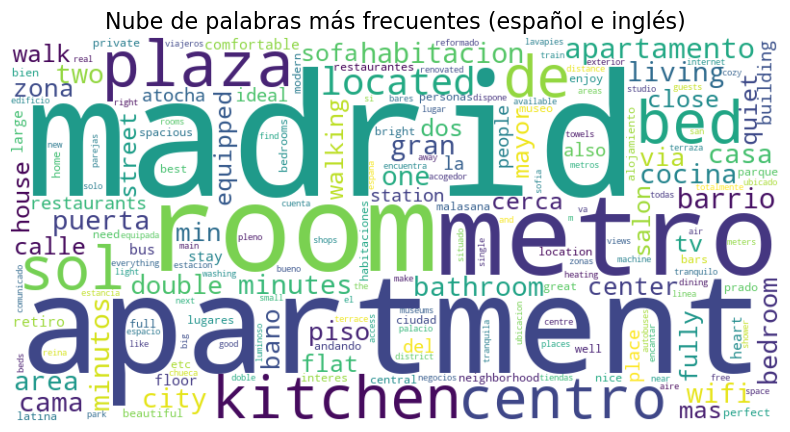


Análisis de n-gramas (bigramas y trigramas):
N-gramas más comunes y su frecuencia:
gran via: 3929
living room: 3881
puerta sol: 3625
plaza mayor: 3228
centro madrid: 2886
fully equipped: 2208
double bed: 2172
reina sofia: 1786
lugares interes: 1463
center madrid: 1456
alojamiento bueno: 1427
sofa bed: 1417
walking distance: 1396
apartment located: 1262
heart madrid: 1255
washing machine: 1249
pleno centro: 1199
va encantar: 1199
equipped kitchen: 1197
plaza espana: 1163


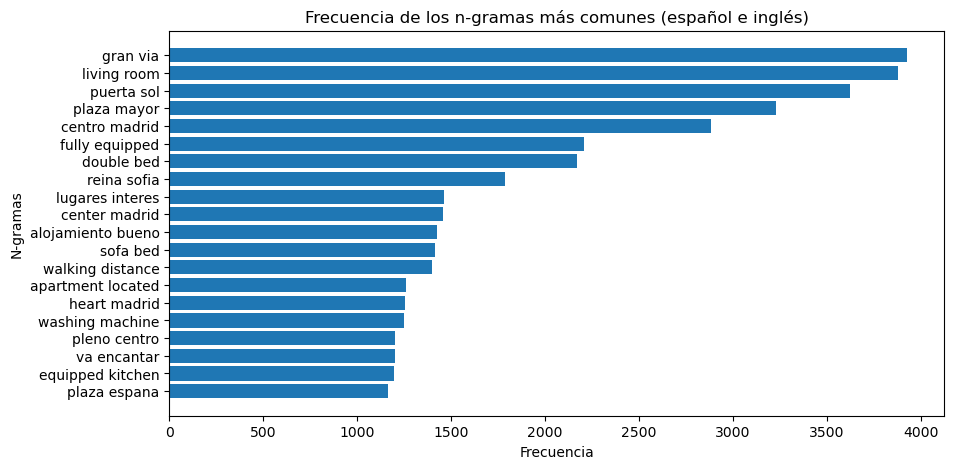

In [267]:
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from langdetect import detect

# Descargar stopwords de NLTK si no están disponibles
import nltk
nltk.download('stopwords')
stop_words_en = set(stopwords.words('english'))
stop_words_es = set(stopwords.words('spanish'))

# Función para limpiar y tokenizar texto
def clean_and_tokenize_multilang(text):
    if pd.isna(text):
        return []
    # Detectar el idioma del texto
    try:
        language = detect(text)
    except:
        language = "unknown"
    
    # Seleccionar stopwords según el idioma detectado
    if language == "es":
        stop_words = stop_words_es
    elif language == "en":
        stop_words = stop_words_en
    else:
        stop_words = set()  # Sin stopwords si el idioma es desconocido

    # Convertir a minúsculas, eliminar caracteres especiales y números
    text = re.sub(r'[^\w\s]', '', text.lower())
    text = re.sub(r'\d+', '', text)
    # Dividir en palabras y eliminar stopwords
    words = text.split()
    return [word for word in words if word not in stop_words]

# Combinar las columnas `summary` y `description` para el análisis
combined_text = pd.concat([df_bnb_train['summary'], df_bnb_train['description']], ignore_index=True)

# Limpiar y tokenizar todo el texto
all_words = combined_text.apply(clean_and_tokenize_multilang).explode()

# Calcular frecuencia de palabras
word_counts = Counter(all_words)

# Mostrar las 40 palabras más comunes
most_common_words = word_counts.most_common(40)
print("Palabras más comunes y su frecuencia (español e inglés):")
print(most_common_words)

# Crear una nube de palabras
print("\nGenerando nube de palabras...")
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras más frecuentes (español e inglés)", fontsize=16)
plt.show()

# Análisis de n-gramas por idioma
print("\nAnálisis de n-gramas (bigramas y trigramas):")
vectorizer = CountVectorizer(ngram_range=(2, 3), max_features=20, stop_words=list(stop_words_en | stop_words_es))
ngrams = vectorizer.fit_transform(combined_text.dropna())
ngram_features = vectorizer.get_feature_names_out()

# Mostrar los n-gramas más comunes
ngram_counts = ngrams.sum(axis=0).A1
ngram_freq = dict(zip(ngram_features, ngram_counts))
sorted_ngrams = sorted(ngram_freq.items(), key=lambda x: x[1], reverse=True)
print("N-gramas más comunes y su frecuencia:")
for ngram, count in sorted_ngrams:
    print(f"{ngram}: {count}")

# Visualizar n-gramas con barras
plt.figure(figsize=(10, 5))
plt.barh([ngram for ngram, _ in sorted_ngrams], [count for _, count in sorted_ngrams])
plt.xlabel("Frecuencia")
plt.ylabel("N-gramas")
plt.title("Frecuencia de los n-gramas más comunes (español e inglés)")
plt.gca().invert_yaxis()
plt.show()


In [268]:
# Procesar summary y description por contenido de relevancia

# Definir palabras clave relevantes (combinando frases y palabras únicas)
relevant_keywords = [
    'gran via', 'living room', 'puerta sol', 'plaza mayor', 'centro madrid',
    'fully equipped', 'double bed', 'reina sofia', 'lugares interes', 'madrid', 
    'apartment', 'room', 'metro', 'plaza', 'sol', 'bed', 'kitchen', 'centro', 
    'located', 'apartamento', 'habitacion', 'barrio', 'wifi', 'cocina', 'gran',
    'minutes', 'puerta', 'minutos', 'area', 'living', 'casa', 'city', 'cama', 
    'bathroom', 'two', 'piso', 'double', 'bedroom', 'center', 'via', 'zona', 
    'min', 'bano', 'quiet', 'walk', 'tv', 'equipped', 'center madrid', 
    'alojamiento bueno', 'sofa bed', 'walking distance', 'apartment located',
    'heart madrid', 'washing machine', 'pleno centro', 'va encantar', 
    'equipped kitchen', 'plaza espana'
]

# Función para calcular el puntaje de contenido basado en las palabras clave
def calculate_content_score(text):
    if pd.isna(text):
        return 0  # Si el texto es nulo, el puntaje será 0
    text = text.lower()
    score = sum(1 for phrase in relevant_keywords if phrase in text)
    return score

# Aplicar la función a las columnas `summary` y `description`
df_bnb_train['summary_content_score'] = df_bnb_train['summary'].apply(calculate_content_score)
df_bnb_train['description_content_score'] = df_bnb_train['description'].apply(calculate_content_score)

# Verificar los resultados
print("Train: Puntajes de contenido calculados")
print(df_bnb_train[['summary_content_score', 'description_content_score']].head())

# Guardar los puntajes relevantes como archivo CSV o pickle para futuras referencias
df_bnb_train[['summary_content_score', 'description_content_score']].to_csv(
    './data/train_content_scores.csv', index=False
)


Train: Puntajes de contenido calculados
   summary_content_score  description_content_score
0                     12                         17
1                     10                         16
2                      5                         13
3                      3                          3
4                      9                          9


In [269]:
df_bnb_train[['summary', 'description']].to_csv('./data/backup_summary_description_train.csv', index=False)


In [270]:
# Drop original text columns after extraction
df_bnb_train = df_bnb_train.drop(columns=['summary', 'description'])

In [271]:
df_bnb_train.head()

host_total_listings_count neighbourhood neighbourhood_cleansed  \
0                        2.0     jeronimos              jeronimos   
1                        1.0           sol                    sol   
2                       16.0   carabanchel           vista alegre   
3                      114.0   embajadores            embajadores   
4                        2.0    gaztambide             gaztambide   

  neighbourhood_group_cleansed    city                state zipcode  market  \
0                       retiro  madrid  comunidad de madrid   28014  madrid   
1                       centro  madrid  comunidad de madrid   28012  madrid   
2                  carabanchel  madrid  comunidad de madrid   28025  madrid   
3                       centro  madrid  comunidad de madrid   28012  madrid   
4                     chamberi  madrid                   28   28015  madrid   

  smart_location country_code country   latitude  longitude property_type  \
0  madrid, spain           es   spain  40.407732  -3.684819     apartment   
1  madrid, spain           es   spain  40.415802  -3.705340     apartment   
2  madrid, spain           es   spain  40.389048  -3.740374     apartment   
3  madrid, spain           es   spain  40.412814  -3.703052     apartment   
4  madrid, spain           es   spain  40.438631  -3.713716     apartment   

        room_type  accommodates  bathrooms  bedrooms  beds  bed_type  price  \
0  entire homeapt             4        1.0         1     2  real bed   60.0   
1  entire homeapt             4        1.0         1     2  real bed   50.0   
2     shared room             1        1.5         1     8  real bed   10.0   
3    private room             2        3.0         1     1  real bed   30.0   
4    private room             2        1.0         1     1  real bed   32.0   

   weekly_price  monthly_price  security_deposit  cleaning_fee  \
0         550.0         1250.0             150.0          25.0   
1         350.0         1500.0             150.0          15.0   
2          70.0          300.0             150.0           5.0   
3         210.0          900.0             150.0          20.0   
4         224.0          960.0             150.0          20.0   

   guests_included  extra_people  minimum_nights  maximum_nights  \
0                1             0               2            1125   
1                1             0               1            1125   
2                1             0               3              30   
3                1             0              10            1125   
4                1            10               1            1125   

   availability_30  availability_60  availability_90  availability_365  \
0                9               32               52               117   
1               15               39               64               208   
2               14               44               74               140   
3                0                6               36               311   
4                7               34               62               337   

   number_of_reviews  review_scores_rating  review_scores_accuracy  \
0                 12                  95.0                     9.0   
1                 20                  91.0                     9.0   
2                  0                  94.0                    10.0   
3                  0                  94.0                    10.0   
4                 97                  92.0                     9.0   

   review_scores_cleanliness  review_scores_checkin  \
0                       10.0                   10.0   
1                        9.0                   10.0   
2                       10.0                   10.0   
3                       10.0                   10.0   
4                        9.0                    9.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                    10.0                  9.0   
1             

In [272]:
categorical_columns = df_bnb_train.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)


Index(['neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'property_type',
       'room_type', 'bed_type', 'cancellation_policy'],
      dtype='object')


In [273]:
df_bnb_train.to_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_train_processed3.csv", index=False)


In [276]:
# Ruta completa del archivo
file_path = r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_train_processed3.csv"

# Cargar el DataFrame desde el archivo CSV
df_bnb_train = pd.read_csv(file_path)

# Verificar las primeras filas
print(df_bnb_train.head())

   host_total_listings_count neighbourhood neighbourhood_cleansed  \
0                        2.0     jeronimos              jeronimos   
1                        1.0           sol                    sol   
2                       16.0   carabanchel           vista alegre   
3                      114.0   embajadores            embajadores   
4                        2.0    gaztambide             gaztambide   

  neighbourhood_group_cleansed    city                state zipcode  market  \
0                       retiro  madrid  comunidad de madrid   28014  madrid   
1                       centro  madrid  comunidad de madrid   28012  madrid   
2                  carabanchel  madrid  comunidad de madrid   28025  madrid   
3                       centro  madrid  comunidad de madrid   28012  madrid   
4                     chamberi  madrid                   28   28015  madrid   

  smart_location country_code country   latitude  longitude property_type  \
0  madrid, spain           es   s

In [277]:
df_bnb_train.isnull().sum()

host_total_listings_count         0
neighbourhood                     0
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
city                              0
state                             0
zipcode                         399
market                            0
smart_location                    0
country_code                      0
country                           0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
bed_type                          0
price                             0
weekly_price                      0
monthly_price                     0
security_deposit                  0
cleaning_fee                      0
guests_included                   0
extra_people                      0
minimum_nights              

## *Seguimos con property_type* ##

Agrupare el número de columnas en función de sus rangos de precios para optimizar el modelo al utilizar una codificación ordinal mediante property_type_weighted, sin añadir múltiples columnas, asegurando una interpretación directa y eficiente para el modelo.

In [278]:

# Mostrar categorías únicas de 'property_type'
unique_property_type_cleaned = df_bnb_train['property_type'].unique()
print("Categorías únicas de property_type:", unique_property_type_cleaned)

# Calcular el precio promedio para cada tipo de propiedad
average_price_by_property_type = df_bnb_train.groupby('property_type')['price'].mean().sort_values()
print("\nPrecio promedio por tipo de propiedad:")
print(average_price_by_property_type)

# Definir las agrupaciones basadas en el análisis de precio promedio
property_type_group_mapping = {
    'villa': 'high_price_accommodation',
    'house': 'mid_price_accommodation',
    'townhouse': 'mid_price_accommodation',
    'boat': 'mid_price_accommodation',
    'chalet': 'mid_price_accommodation',
    'loft': 'mid_price_accommodation',
    'apartment': 'affordable_accommodation',
    'condominium': 'affordable_accommodation',
    'serviced apartment': 'affordable_accommodation',
    'bungalow': 'affordable_accommodation',
    'boutique hotel': 'affordable_accommodation',
    'guesthouse': 'low_price_accommodation',
    'dorm': 'low_price_accommodation',
    'hostel': 'low_price_accommodation',
    'bed  breakfast': 'low_price_accommodation',
    'casa particular': 'low_price_accommodation',
    'camperrv': 'low_price_accommodation',
    'tent': 'low_price_accommodation',
    'earth house': 'low_price_accommodation',
    'guest suite': 'low_price_accommodation',
    'other': 'unique_accommodation',
    'timeshare': 'low_price_accommodation'
}

# Asignar agrupaciones a property_type_grouped
df_bnb_train['property_type_grouped'] = df_bnb_train['property_type'].map(property_type_group_mapping)

# Calcular rangos de precios promedio para cada grupo
price_ranges = df_bnb_train.groupby('property_type_grouped')['price'].mean().to_dict()
print("\nRangos de precio promedio por grupo:")
print(price_ranges)

# Guardar el mapeo y los rangos de precio para uso en test
joblib.dump(property_type_group_mapping, "./data/joblib/property_type_mapping.joblib")
joblib.dump(price_ranges, "./data/joblib/price_ranges.joblib")
print("\nMapeo y rangos de precio guardados con éxito.")


Categorías únicas de property_type: ['apartment' 'loft' 'house' 'bed  breakfast' 'dorm' 'chalet' 'condominium'
 'guesthouse' 'hostel' 'other' 'villa' 'boutique hotel' 'camperrv'
 'casa particular' 'townhouse' 'serviced apartment' 'guest suite' 'boat'
 'tent' 'earth house' 'bungalow']

Precio promedio por tipo de propiedad:
property_type
earth house            20.500000
guest suite            20.500000
tent                   25.000000
casa particular        31.666667
camperrv               35.666667
bed  breakfast         39.558394
guesthouse             43.781250
hostel                 47.923077
dorm                   48.513514
bungalow               56.000000
serviced apartment     64.888889
condominium            65.954225
other                  66.754386
boutique hotel         68.000000
apartment              72.276412
loft                   80.983871
chalet                 84.227273
house                  95.482028
boat                  102.000000
townhouse             108.666667
v

In [279]:

# Asignar pesos a las agrupaciones
property_type_group_weights = {
    'high_price_accommodation': 4,
    'mid_price_accommodation': 3,
    'affordable_accommodation': 2,
    'low_price_accommodation': 1,
    'unique_accommodation': 2
}

# Mapear los pesos a la nueva columna
df_bnb_train['property_type_weighted'] = df_bnb_train['property_type_grouped'].map(property_type_group_weights)

# Tratar valores nulos (categorías nuevas no asignadas en train)
df_bnb_train['property_type_weighted'].fillna(1, inplace=True)  # Asignar peso mínimo por defecto

# Verificar valores nulos después del mapeo
print("Valores nulos en property_type_weighted (train):", df_bnb_train['property_type_weighted'].isna().sum())

# Guardar los pesos para uso en test
joblib.dump(property_type_group_weights, "./data/joblib/property_type_weights.joblib")
print("\nPesos de property_type_grouped guardados con éxito.")

# Guardar el DataFrame procesado
df_bnb_train.to_csv("./data/train_property_type_weighted.csv", index=False)
print("\nProcesamiento de train completado y guardado.")


C:\Users\kshad\AppData\Local\Temp\ipykernel_248\2911749610.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bnb_train['property_type_weighted'].fillna(1, inplace=True)  # Asignar peso mínimo por defecto


Valores nulos en property_type_weighted (train): 0

Pesos de property_type_grouped guardados con éxito.

Procesamiento de train completado y guardado.


In [280]:
# Eliminar columnas redundantes
df_bnb_train = df_bnb_train.drop(columns=['property_type', 'property_type_grouped'])

In [281]:
df_bnb_train.isnull().sum()

host_total_listings_count         0
neighbourhood                     0
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
city                              0
state                             0
zipcode                         399
market                            0
smart_location                    0
country_code                      0
country                           0
latitude                          0
longitude                         0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
bed_type                          0
price                             0
weekly_price                      0
monthly_price                     0
security_deposit                  0
cleaning_fee                      0
guests_included                   0
extra_people                      0
minimum_nights                    0
maximum_nights              

### *Seguimos con room_type y bed_type* ###

Target Encoding: Con esta codificación, el modelo asigna automáticamente más peso a las categorías con un mayor precio promedio, ayudando a la predicción de price.

Mejora en interpretabilidad y evita alta dimensionalidad. Las categorías con mayor valor tendrán un impacto mayor en la predicción del precio, lo cual es crucial para entender la contribución de cada variable al precio.

In [282]:

# Obtener el promedio de 'price' para cada categoría en 'room_type' y 'bed_type'
room_type_mean = df_bnb_train.groupby('room_type')['price'].mean()
bed_type_mean = df_bnb_train.groupby('bed_type')['price'].mean()

# Mapear los promedios al dataset como codificación
df_bnb_train['room_type_encoded'] = df_bnb_train['room_type'].map(room_type_mean)
df_bnb_train['bed_type_encoded'] = df_bnb_train['bed_type'].map(bed_type_mean)

# Tratar valores nulos generados por categorías nuevas o ausentes
df_bnb_train['room_type_encoded'].fillna(df_bnb_train['price'].mean(), inplace=True)
df_bnb_train['bed_type_encoded'].fillna(df_bnb_train['price'].mean(), inplace=True)

# Verificar el resultado final
print("Valores nulos en room_type_encoded:", df_bnb_train['room_type_encoded'].isna().sum())
print("Valores nulos en bed_type_encoded:", df_bnb_train['bed_type_encoded'].isna().sum())

# Guardar los mapeos para uso en test
joblib.dump(room_type_mean.to_dict(), "./data/joblib/room_type_mean.joblib")
joblib.dump(bed_type_mean.to_dict(), "./data/joblib/bed_type_mean.joblib")
print("\nMapeos de room_type y bed_type guardados con éxito.")

# Guardar el DataFrame procesado
df_bnb_train.to_csv("./data/train_room_bed_encoded.csv", index=False)
print("\nArchivo final de train guardado.")



C:\Users\kshad\AppData\Local\Temp\ipykernel_248\3735009601.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bnb_train['room_type_encoded'].fillna(df_bnb_train['price'].mean(), inplace=True)
C:\Users\kshad\AppData\Local\Temp\ipykernel_248\3735009601.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

Valores nulos en room_type_encoded: 0
Valores nulos en bed_type_encoded: 0

Mapeos de room_type y bed_type guardados con éxito.

Archivo final de train guardado.


In [283]:
# Eliminar las columnas originales después de la codificación
df_bnb_train = df_bnb_train.drop(columns=['room_type', 'bed_type'])

In [284]:
df_bnb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_total_listings_count     11824 non-null  float64
 1   neighbourhood                 11824 non-null  object 
 2   neighbourhood_cleansed        11824 non-null  object 
 3   neighbourhood_group_cleansed  11824 non-null  object 
 4   city                          11824 non-null  object 
 5   state                         11824 non-null  object 
 6   zipcode                       11425 non-null  object 
 7   market                        11824 non-null  object 
 8   smart_location                11824 non-null  object 
 9   country_code                  11824 non-null  object 
 10  country                       11824 non-null  object 
 11  latitude                      11824 non-null  float64
 12  longitude                     11824 non-null  float64
 13  a

In [285]:
categorical_columns = df_bnb_train.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)


Index(['neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'cancellation_policy'],
      dtype='object')


In [286]:
import pandas as pd
import joblib

# Definir el mapeo para cancellation_policy
cancellation_p_map = {
    'flexible': 1,
    'flexiblenew': 1,
    'moderate': 2,
    'moderatenew': 2,
    'strict': 3,
    'strictnew': 3,
    'superstrict30': 4,
    'superstrict60': 5
}

# Convertir cancellation_policy a numérica
df_bnb_train['cancellation_policy_numeric'] = df_bnb_train['cancellation_policy'].map(cancellation_p_map)

# Tratar valores nulos generados por categorías nuevas o ausentes
df_bnb_train['cancellation_policy_numeric'].fillna(0, inplace=True)  # Asignar 0 como categoría desconocida

# Verificar valores nulos después de la conversión
print("Valores nulos en cancellation_policy_numeric (train):", df_bnb_train['cancellation_policy_numeric'].isna().sum())

# Guardar el mapeo para su uso en test
joblib.dump(cancellation_p_map, "./data/joblib/cancellation_policy_map.joblib")
print("\nMapeo de cancellation_policy guardado con éxito.")


Valores nulos en cancellation_policy_numeric (train): 0

Mapeo de cancellation_policy guardado con éxito.


C:\Users\kshad\AppData\Local\Temp\ipykernel_248\2259193410.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bnb_train['cancellation_policy_numeric'].fillna(0, inplace=True)  # Asignar 0 como categoría desconocida


In [287]:
# Eliminar la columna original 'cancellation_policy' para evitar redundancia
df_bnb_train = df_bnb_train.drop(columns=['cancellation_policy'])

In [288]:
categorical_columns = df_bnb_train.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country'],
      dtype='object')


In [289]:
unique_neighbourhood = pd.concat([
    df_bnb_train['neighbourhood'], 
    df_bnb_train['neighbourhood_cleansed'],
    df_bnb_train['neighbourhood_group_cleansed']
]).str.split(',', expand=True).stack().str.strip().unique()

unique_neighbourhood


# Mostrar los valores únicos y el total
print("Valores únicos de neighbourhoods:", unique_neighbourhood)


Valores únicos de neighbourhoods: ['jeronimos' 'sol' 'carabanchel' 'embajadores' 'gaztambide' 'palacio'
 'san blas' 'goya' 'fuente del berro' 'ibiza' 'la latina' 'arguelles'
 'usera' 'malasana' 'etterbeek' 'lista' 'vallehermosa' 'prosperidad'
 'ciudad lineal' 'pacifico' 'cortes' 'palos do moguer' 'justicia'
 'cuatro caminos' 'arapiles' 'castillejos' 'castellana' 'passy' 'almagro'
 'guindalera' 'barajas' 'acacias' 'hispanoamerica' 'vicalvaro'
 'puente de vallecas' 'aluche' 'moratalaz' 'almenara' 'fuencarralel pardo'
 'esquilino' 'trafalgar' 'rios rosas' 'bondi' 'greenwood' 'midwilshire'
 'berruguete' 'hortaleza' 'castilla' 'lb of sutton' 'el raval'
 'indische buurt' 'docklands' 'prenzlauer berg' 'imperial' 'el born'
 'mitte' 'recoletos' 'moncloa' 'pasadena' 'balham' 'la chopera' 'acton'
 'santsmontjuic' 'batignolles' 'delicias' 'dreta de leixample' 'kdbyen'
 'villaverde' 'fairlawn' 'darlinghurst' 'eckington' 'el viso' 'islington'
 'riverbend' 'la chapelle' 'chelsea' 'hollywood' 'valdeac

In [290]:
unique_neighbourhood_group_cleansed = df_bnb_train['neighbourhood_group_cleansed'].str.split(',', expand=True).stack().str.strip().unique()
unique_neighbourhood_group_cleansed

# Mostrar los valores únicos y el total
print("Valores únicos de neighbourhood:", unique_neighbourhood_group_cleansed)


Valores únicos de neighbourhood: ['retiro' 'centro' 'carabanchel' 'chamberi' 'santsmontjuic' 'salamanca'
 'moncloa  aravaca' 'usera' 'friedrichshainkreuzberg' 'chamartin'
 'ciudad lineal' 'arganzuela' 'tetuan' 'ciutat vella' 'hortaguinardo'
 'barajas' 'vicalvaro' 'puente de vallecas' 'latina' 'moratalaz'
 'fuencarral  el pardo' 'isole' 'other neighborhoods' 'capitol hill'
 'hortaleza' 'mitte' 'pankow' 'eixample' 'villaverde'
 'san blas  canillejas' 'brooklyn' 'manhattan' 'sant marti' 'magnolia'
 'sarriasant gervasi' 'gracia' 'villa de vallecas' 'les corts' 'neukolln'
 'queens' 'beacon hill' 'tempelhof  schoneberg' 'treptow  kopenick'
 'bronx' 'nou barris' 'charlottenburgwilm' 'ballard']


In [291]:
unique_neighbourhood_cleansed = df_bnb_train['neighbourhood_cleansed'].str.split(',', expand=True).stack().str.strip().unique()
unique_neighbourhood_cleansed

# Mostrar los valores únicos y el total
print("Valores únicos de neighbourhood:", unique_neighbourhood_cleansed)

Valores únicos de neighbourhood: ['jeronimos' 'sol' 'vista alegre' 'embajadores' 'gaztambide' 'palacio'
 'calvia' 'goya' 'fuente del berro' 'ibiza' 'casa de campo' 'almendrales'
 'moscardo' 'universidad' 'etterbeek' 'lista' 'vallehermoso' 'prosperidad'
 'costillares' 'palma de mallorca' 'ventas' 'cortes' 'palos de moguer'
 'arguelles' 'justicia' 'cuatro caminos' 'arta' 'castillejos' 'castellana'
 'passy' 'almagro' 'guindalera' 'san isidro' 'timon' 'acacias'
 'aeropuerto' 'hispanoamerica' 'ambroz' 'san diego' 'carmenes' 'vinateros'
 'arapiles' 'almenara' 'pueblo nuevo' 'penagrande' 'concepcion'
 'i centro storico' 'pacifico' 'san juan bautista' 'palomeras sureste'
 'mirasierra' 'trafalgar' 'quintana' 'comillas' 'rios rosas'
 'puerta bonita' 'lucero' 'waverley' 'phinney ridge' 'midwilshire'
 'berruguete' 'canillas' 'castilla' 'puerta del angel' 'sutton'
 'luxembourg' 'el raval' 'pinar del rey' 'oudoost' 'dublin city'
 'prenzlauer berg sud' 'imperial' 'santa margalida' 'brunnenstr sud'
 '


**Continuamos con Codificacion de variables categoricas, por ejemplo 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed' con target Encoding:**

*neighbourhood_group_cleansed: tiene 47 valores únicos y puede representar niveles de zona, label encoding o ordinal encoding sería más adecuado. Esto mantiene un orden y evita crear múltiples columnas que podrían añadir complejidad sin aportar mucho detalle.

*neighbourhood_cleansed: 442 valores únicos, target encoding podría ser lo mejor, ya que reduce las dimensiones y permite al modelo captar la relación directa entre el vecindario y la variable objetivo (precio), sin agregar muchas variables dummy.

*neighbourhood: Tiene 350 valores únicos y no parece aportar una jerarquía. Si la variable es relevante, target encoding también es una opción aquí.

In [292]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Label Encoding para `neighbourhood_group_cleansed`
label_encoder_group = LabelEncoder()
df_bnb_train['neighbourhood_group_cleansed_encoded'] = label_encoder_group.fit_transform(df_bnb_train['neighbourhood_group_cleansed'])

# Guardar el encoder para test
joblib.dump(label_encoder_group, "./data/joblib/label_encoder_group.joblib")
print("\nLabel Encoder para neighbourhood_group_cleansed guardado.")

# Imputar nulos en 'price' con la media del barrio
neighbourhood_mean_price = df_bnb_train.groupby('neighbourhood')['price'].transform('mean')
df_bnb_train['price'].fillna(neighbourhood_mean_price, inplace=True)

# Si todavía quedan nulos, imputar con la media general de 'price'
mean_price = df_bnb_train['price'].mean()
df_bnb_train['price'].fillna(mean_price, inplace=True)

# Target Encoding para `neighbourhood_cleansed`
mean_map = {}
mean_map['neighbourhood_cleansed'] = df_bnb_train.groupby('neighbourhood_cleansed')['price'].mean()
df_bnb_train['neighbourhood_cleansed_encoded'] = df_bnb_train['neighbourhood_cleansed'].map(mean_map['neighbourhood_cleansed'])

# Target Encoding para `neighbourhood`
mean_map['neighbourhood'] = df_bnb_train.groupby('neighbourhood')['price'].mean()
df_bnb_train['neighbourhood_encoded'] = df_bnb_train['neighbourhood'].map(mean_map['neighbourhood'])

# Verificar si hay nulos en las nuevas columnas codificadas
print("\nVerificación de nulos después de la codificación (train):")
print(df_bnb_train[['neighbourhood_cleansed_encoded', 'neighbourhood_encoded', 'neighbourhood_group_cleansed_encoded']].isnull().sum())

# Guardar los mapas de target encoding
joblib.dump(mean_map, "./data/joblib/mean_map_neighbourhoods.joblib")
print("\nMapas de Target Encoding guardados con éxito.")




Label Encoder para neighbourhood_group_cleansed guardado.

Verificación de nulos después de la codificación (train):
neighbourhood_cleansed_encoded          0
neighbourhood_encoded                   0
neighbourhood_group_cleansed_encoded    0
dtype: int64

Mapas de Target Encoding guardados con éxito.


C:\Users\kshad\AppData\Local\Temp\ipykernel_248\2016426258.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bnb_train['price'].fillna(neighbourhood_mean_price, inplace=True)
C:\Users\kshad\AppData\Local\Temp\ipykernel_248\2016426258.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [293]:
df_bnb_train.isnull().sum()

host_total_listings_count                 0
neighbourhood                             0
neighbourhood_cleansed                    0
neighbourhood_group_cleansed              0
city                                      0
state                                     0
zipcode                                 399
market                                    0
smart_location                            0
country_code                              0
country                                   0
latitude                                  0
longitude                                 0
accommodates                              0
bathrooms                                 0
bedrooms                                  0
beds                                      0
price                                     0
weekly_price                              0
monthly_price                             0
security_deposit                          0
cleaning_fee                              0
guests_included                 

In [294]:
# Mostrar las primeras filas para comprobar
df_bnb_train[['neighbourhood_cleansed', 'neighbourhood_cleansed_encoded', 'neighbourhood', 'neighbourhood_encoded', 'neighbourhood_group_cleansed', 'neighbourhood_group_cleansed_encoded']].head()


neighbourhood_cleansed  neighbourhood_cleansed_encoded neighbourhood  \
0              jeronimos                      104.600000     jeronimos   
1                    sol                       85.710220           sol   
2           vista alegre                       37.074074   carabanchel   
3            embajadores                       60.703779   embajadores   
4             gaztambide                       56.000000    gaztambide   

   neighbourhood_encoded neighbourhood_group_cleansed  \
0             104.121212                       retiro   
1              84.620205                       centro   
2              39.979522                  carabanchel   
3              59.554729                       centro   
4              61.982301                     chamberi   

   neighbourhood_group_cleansed_encoded  
0                                    34  
1                                     8  
2                                     7  
3                                     8  
4                                    10

In [295]:
# Eliminar las columnas categóricas originales después del encoding
df_bnb_train.drop(columns=['neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed'], inplace=True)


In [296]:
categorical_columns = df_bnb_train.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['city', 'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country'],
      dtype='object')


In [297]:
# guardar df
df_bnb_train.to_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_train_processed4.csv", index=False)

In [298]:
# Ruta completa del archivo
file_path = r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_train_processed4.csv"

# Cargar el DataFrame desde el archivo CSV
df_bnb_train = pd.read_csv(file_path)

# Verificar las primeras filas
print(df_bnb_train.head())


   host_total_listings_count    city                state zipcode  market  \
0                        2.0  madrid  comunidad de madrid   28014  madrid   
1                        1.0  madrid  comunidad de madrid   28012  madrid   
2                       16.0  madrid  comunidad de madrid   28025  madrid   
3                      114.0  madrid  comunidad de madrid   28012  madrid   
4                        2.0  madrid                   28   28015  madrid   

  smart_location country_code country   latitude  longitude  accommodates  \
0  madrid, spain           es   spain  40.407732  -3.684819             4   
1  madrid, spain           es   spain  40.415802  -3.705340             4   
2  madrid, spain           es   spain  40.389048  -3.740374             1   
3  madrid, spain           es   spain  40.412814  -3.703052             2   
4  madrid, spain           es   spain  40.438631  -3.713716             2   

   bathrooms  bedrooms  beds  price  weekly_price  monthly_price  \
0     

In [299]:
categorical_columns = df_bnb_train.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['city', 'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country'],
      dtype='object')


**Target encoding para: city, state, zipcode, market, country_code o country**

*Eliminar smart_location si es redundante.*

**city:** Posiblemente tenga un alto número de categorías únicas, lo cual impacta en la granularidad geográfica. Si el número de categorías es alto, sería más conveniente usar target encoding para reflejar cómo el precio medio varía entre ciudades. Esto agrega valor al modelo sin generar demasiadas columnas.

**state:** Dependiendo de la diversidad de valores, podría usarse target encoding para capturar las variaciones en precio entre estados, especialmente si el número de valores es moderado.

**zipcode:** Si los zipcodes son numerosos y específicos, puede aportar más al precio si se usa target encoding, dado que los precios pueden variar considerablemente por zonas de código postal. Esto también previene la creación de una cantidad excesiva de columnas.

**market:** Esta categoría representa una segmentación más amplia del lugar, probablemente a nivel de mercado regional. Si los valores son numerosos, target encoding es ideal para reflejar el precio medio por mercado.

**smart_location:** Si smart_location sigue una estructura que incluye ciudad y algún otro descriptor único, se recomienda eliminarla tras verificar que es redundante con city y zipcode. Mantenerla podría duplicar información.

**country_code y country:**  cada país o código de país se transforma en una representación numérica basada en la relación con price.

In [300]:
# Mostrar los primeros valores únicos de 'smart_location' para entender su contenido y si duplica info que hay en city
print(df_bnb_train['smart_location'].unique()[:10])  # Solo los primeros 10 valores para tener una idea


['madrid, spain' 'illetes, spain' 'etterbeek, belgium' 'palma, spain'
 'betlem, spain' 'paris, france' ', spain' 'rome, italy'
 'bondi, australia' 'seattle, wa']


In [301]:
# Código para eliminar la columna 'smart_location' del DataFrame de entrenamiento
df_bnb_train = df_bnb_train.drop(columns=['smart_location'])

In [302]:
# Verificar si 'smart_location' está presente en el DataFrame
if 'smart_location' in df_bnb_train.columns:
    print("'smart_location' sigue en el DataFrame.")
else:
    print("'smart_location' fue descartada del DataFrame.")


'smart_location' fue descartada del DataFrame.


In [303]:
# Crear un diccionario para guardar los mapeos
mean_map = {}
target_column = 'price'  # Columna objetivo para predecir

# Aplicar Target Encoding a 'city', 'state', 'zipcode', y 'market'
for column in ['city', 'state', 'zipcode', 'market']:
    mean = df_bnb_train.groupby(column)[target_column].mean()
    df_bnb_train[f'{column}_encoded'] = df_bnb_train[column].map(mean)
    mean_map[column] = mean

# Verificar valores nulos generados por Target Encoding
for column in ['city', 'state', 'zipcode', 'market']:
    df_bnb_train[f'{column}_encoded'].fillna(df_bnb_train[target_column].mean(), inplace=True)

# Guardar los mapeos para su uso en test
joblib.dump(mean_map, "./data/joblib/mean_map_location_features.joblib")
print("\nMapas de Target Encoding guardados con éxito.")


Mapas de Target Encoding guardados con éxito.


C:\Users\kshad\AppData\Local\Temp\ipykernel_248\1735589032.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bnb_train[f'{column}_encoded'].fillna(df_bnb_train[target_column].mean(), inplace=True)


In [304]:
# Contar países únicos en 'country'
unique_countries = df_bnb_train['country'].nunique()
print(f"Número de países únicos en 'country': {unique_countries}")

# Contar códigos de país únicos en 'country_code'
unique_country_codes = df_bnb_train['country_code'].nunique()
print(f"Número de códigos de país únicos en 'country_code': {unique_country_codes}")


Número de países únicos en 'country': 17
Número de códigos de país únicos en 'country_code': 17


In [305]:
# Crear un diccionario para guardar el mapeo de country
mean_map = {}
target_column = 'price'  # Columna objetivo para predecir

# Aplicar Target Encoding a 'country'
mean = df_bnb_train.groupby('country')[target_column].mean()
df_bnb_train['country_encoded'] = df_bnb_train['country'].map(mean)
mean_map['country'] = mean

# Manejar valores nulos generados por categorías ausentes
df_bnb_train['country_encoded'].fillna(df_bnb_train[target_column].mean(), inplace=True)

# Eliminar la columna 'country_code' para evitar duplicación de información
df_bnb_train.drop(columns=['country_code'], inplace=True)

# Guardar el mapeo para su uso en test
joblib.dump(mean_map, "./data/joblib/mean_map_country.joblib")
print("\nMapeo de Target Encoding para 'country' guardado con éxito.")

# Confirmar que la columna 'country_code' fue eliminada
print("\nColumnas después de aplicar Target Encoding y eliminar 'country_code':")
print(df_bnb_train.columns)


Mapeo de Target Encoding para 'country' guardado con éxito.

Columnas después de aplicar Target Encoding y eliminar 'country_code':
Index(['host_total_listings_count', 'city', 'state', 'zipcode', 'market',
       'country', 'latitude', 'longitude', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'square_meters',
       'days_since_first_review', 'days_since_last_review',
       'review_activity_duration', 'amenity_score', 'summary_content_score',
       'description_content_score', 'pr

C:\Users\kshad\AppData\Local\Temp\ipykernel_248\3647208224.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bnb_train['country_encoded'].fillna(df_bnb_train[target_column].mean(), inplace=True)


In [307]:
# Eliminar columnas originales para evitar redundancia
df_bnb_train.drop(columns=['city', 'state', 'zipcode', 'market'], inplace=True)

KeyError: "['city', 'state', 'zipcode', 'market'] not found in axis"

In [308]:
# Eliminar columnas originales para evitar redundancia
df_bnb_train.drop(columns=['country'], inplace=True)

In [309]:
categorical_columns = df_bnb_train.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index([], dtype='object')


In [310]:
df_bnb_train.head(15)

host_total_listings_count   latitude  longitude  accommodates  bathrooms  \
0                         2.0  40.407732  -3.684819             4        1.0   
1                         1.0  40.415802  -3.705340             4        1.0   
2                        16.0  40.389048  -3.740374             1        1.5   
3                       114.0  40.412814  -3.703052             2        3.0   
4                         2.0  40.438631  -3.713716             2        1.0   
5                         1.0  40.411880  -3.702481             1        1.0   
6                         1.0  40.415087  -3.710994             4        1.0   
7                       114.0  40.418266  -3.705617             2        3.0   
8                        68.0  39.539871   2.592716             4        1.0   
9                        28.0  40.426410  -3.673278             4        2.0   
10                        4.0  40.408683  -3.700160             2        1.0   
11                        8.0  40.426880  -3.667827             2        2.0   
12                        2.0  40.417231  -3.678202             2        1.0   
13                        2.0  40.410093  -3.706216             4        1.0   
14                        4.0  40.429345  -3.722286             2        2.0   

    bedrooms  beds  price  weekly_price  monthly_price  security_deposit  \
0          1     2   60.0         550.0         1250.0             150.0   
1          1     2   50.0         350.0         1500.0             150.0   
2          1     8   10.0          70.0          300.0             150.0   
3          1     1   30.0         210.0          900.0             150.0   
4          1     1   32.0         224.0          960.0             150.0   
5          1     1   35.0         245.0         1050.0             150.0   
6          1     2   80.0         560.0         2400.0             300.0   
7          1     1   25.0         175.0          750.0             150.0   
8          1     2   69.0         483.0         2070.0             150.0   
9          2     3  158.0        1106.0         3500.0             180.0   
10         1     1   29.0         203.0          870.0             150.0   
11         1     2   85.0         595.0         2550.0             100.0   
12         1     1   52.0         364.0         1560.0             300.0   
13         1     1   55.0         385.0         1650.0             150.0   
14         1     1   39.0         230.0          700.0             150.0   

    cleaning_fee  guests_included  extra_people  minimum_nights  \
0           25.0                1             0               2   
1           15.0                1             0               1   
2            5.0                1             0               3   
3           20.0                1             0              10   
4           20.0                1            10               1   
5           20.0                1             0               2   
6           18.0                2            21               1   
7           14.0                1             5              10   
8           45.0                3            10               4   
9          160.0                2            20               7   
10          20.0                1            10               2   
11          20.0                1             0               2   
12          20.0                1             0               1   
13          20.0                1             0               2   
14          10.0                1            13               2   

    maximum_nights  availability_30  availability_60  availability_90  \
0             1125                9               32               52   
1             1125               15               39               64   
2               30               14               44               74   
3             1125                0                6               36   
4             1125                7               34               6

In [311]:
# guardar df
df_bnb_train.to_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_train_processed5.csv", index=False)

In [312]:
# Ruta completa del archivo
file_path = r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_train_processed5.csv"

# Cargar el DataFrame desde el archivo CSV
df_bnb_train = pd.read_csv(file_path)

# Verificar las primeras filas
print(df_bnb_train.head())

   host_total_listings_count   latitude  longitude  accommodates  bathrooms  \
0                        2.0  40.407732  -3.684819             4        1.0   
1                        1.0  40.415802  -3.705340             4        1.0   
2                       16.0  40.389048  -3.740374             1        1.5   
3                      114.0  40.412814  -3.703052             2        3.0   
4                        2.0  40.438631  -3.713716             2        1.0   

   bedrooms  beds  price  weekly_price  monthly_price  security_deposit  \
0         1     2   60.0         550.0         1250.0             150.0   
1         1     2   50.0         350.0         1500.0             150.0   
2         1     8   10.0          70.0          300.0             150.0   
3         1     1   30.0         210.0          900.0             150.0   
4         1     1   32.0         224.0          960.0             150.0   

   cleaning_fee  guests_included  extra_people  minimum_nights  \
0       

In [313]:
df_bnb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   host_total_listings_count             11824 non-null  float64
 1   latitude                              11824 non-null  float64
 2   longitude                             11824 non-null  float64
 3   accommodates                          11824 non-null  int64  
 4   bathrooms                             11824 non-null  float64
 5   bedrooms                              11824 non-null  int64  
 6   beds                                  11824 non-null  int64  
 7   price                                 11824 non-null  float64
 8   weekly_price                          11824 non-null  float64
 9   monthly_price                         11824 non-null  float64
 10  security_deposit                      11824 non-null  float64
 11  cleaning_fee   

In [314]:
df_bnb_train.isnull().sum()

host_total_listings_count               0
latitude                                0
longitude                               0
accommodates                            0
bathrooms                               0
bedrooms                                0
beds                                    0
price                                   0
weekly_price                            0
monthly_price                           0
security_deposit                        0
cleaning_fee                            0
guests_included                         0
extra_people                            0
minimum_nights                          0
maximum_nights                          0
availability_30                         0
availability_60                         0
availability_90                         0
availability_365                        0
number_of_reviews                       0
review_scores_rating                    0
review_scores_accuracy                  0
review_scores_cleanliness         

## Ahora a correlacionar.... ##

Primero hacer el log de price para empezar a correlacionar:

In [315]:
import numpy as np

# Crear una nueva columna con el logaritmo natural de 'price'
df_bnb_train['price_log'] = np.log(df_bnb_train['price'])

# Eliminar la columna 'price'
df_bnb_train.drop(columns=['price'], inplace=True)

# Verificar las primeras filas
print(df_bnb_train.head())


   host_total_listings_count   latitude  longitude  accommodates  bathrooms  \
0                        2.0  40.407732  -3.684819             4        1.0   
1                        1.0  40.415802  -3.705340             4        1.0   
2                       16.0  40.389048  -3.740374             1        1.5   
3                      114.0  40.412814  -3.703052             2        3.0   
4                        2.0  40.438631  -3.713716             2        1.0   

   bedrooms  beds  weekly_price  monthly_price  security_deposit  \
0         1     2         550.0         1250.0             150.0   
1         1     2         350.0         1500.0             150.0   
2         1     8          70.0          300.0             150.0   
3         1     1         210.0          900.0             150.0   
4         1     1         224.0          960.0             150.0   

   cleaning_fee  guests_included  extra_people  minimum_nights  \
0          25.0                1             0    

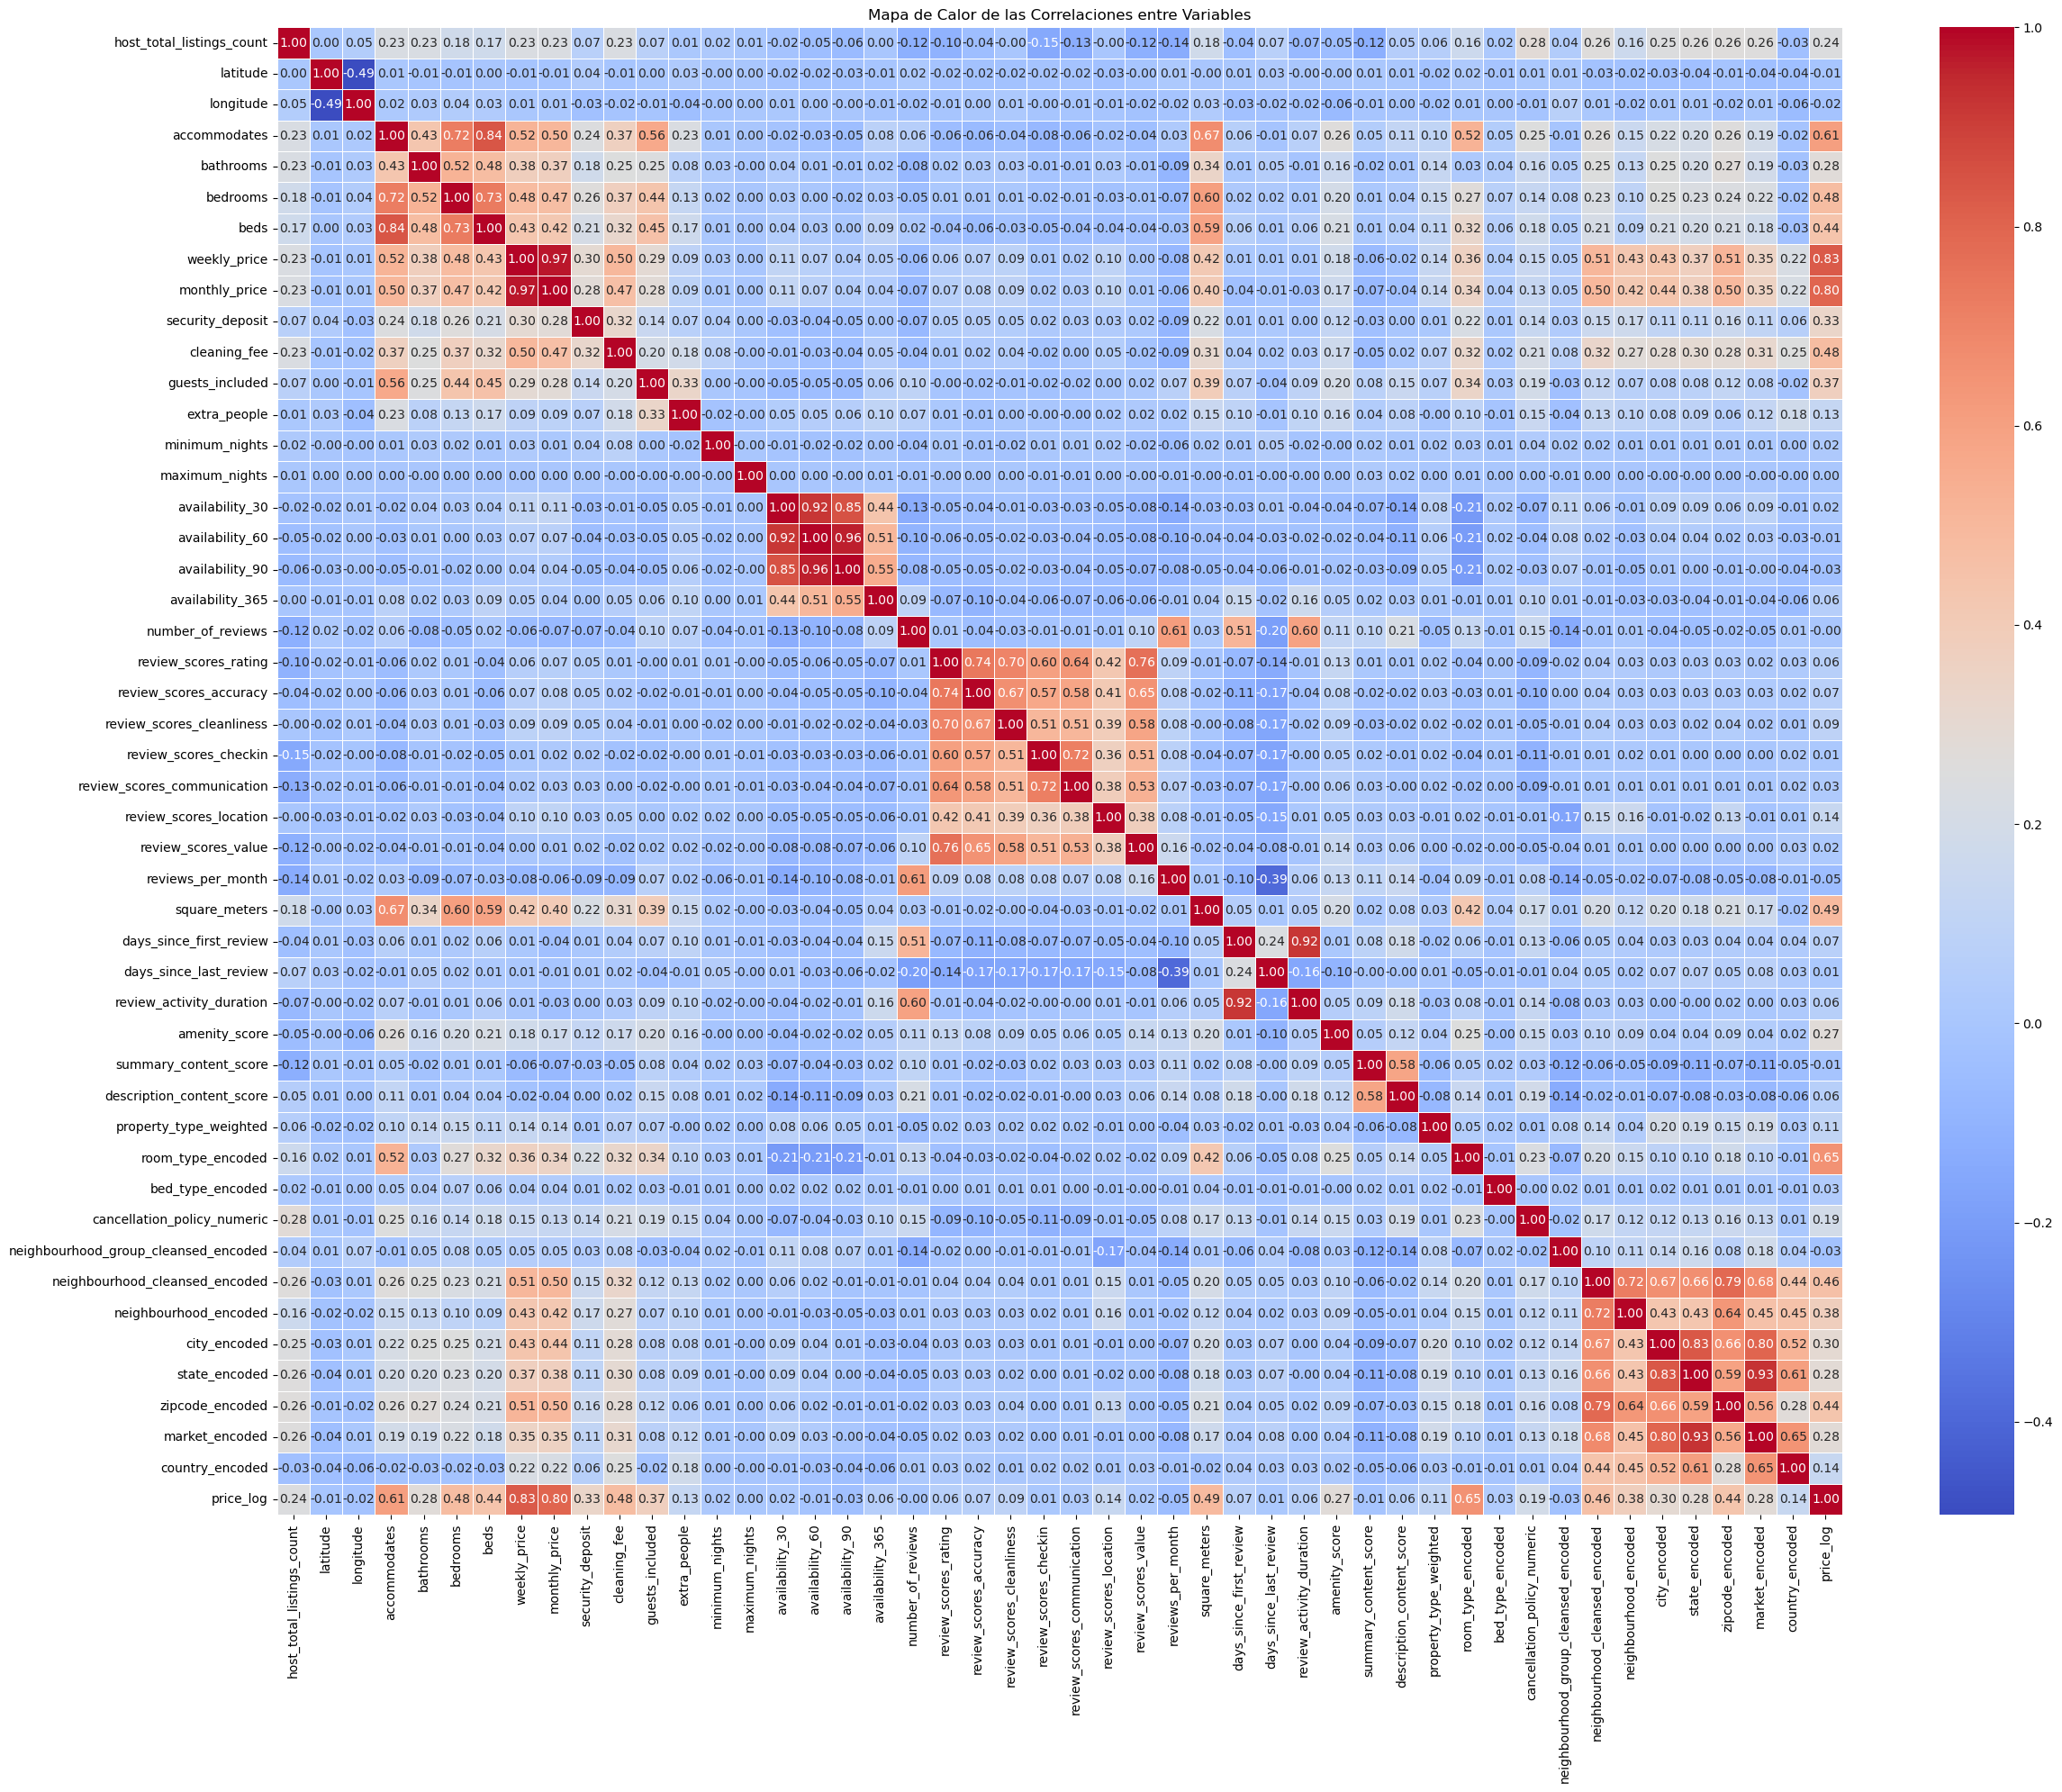

Correlaciones de las variables con 'price_log':
price_log                               1.000000
weekly_price                            0.827165
monthly_price                           0.799663
room_type_encoded                       0.650689
accommodates                            0.607014
square_meters                           0.486647
cleaning_fee                            0.479101
bedrooms                                0.475536
neighbourhood_cleansed_encoded          0.460438
beds                                    0.442218
zipcode_encoded                         0.436939
neighbourhood_encoded                   0.380684
guests_included                         0.371655
security_deposit                        0.329834
city_encoded                            0.298982
state_encoded                           0.283007
market_encoded                          0.278941
bathrooms                               0.276500
amenity_score                           0.271968
host_total_listings_c

In [316]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas numéricas para calcular la correlación
numeric_df_bnb_train = df_bnb_train.select_dtypes(include=[np.number])

# Calcular la matriz de correlación para todas las variables numéricas
correlation_matrix = numeric_df_bnb_train.corr()

# Visualizar el heatmap de las correlaciones
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Mapa de Calor de las Correlaciones entre Variables')
plt.tight_layout()
plt.show()

# Correlación específica con `price`
correlations_with_price_log = correlation_matrix['price_log'].sort_values(ascending=False)
print("Correlaciones de las variables con 'price_log':")
print(correlations_with_price_log)


In [317]:
# Correlación de cada variable con la columna objetivo 'price'
correlations_with_price_log = correlation_matrix['price_log'].sort_values(ascending=False)

# Variables con baja correlación (umbral < 0.05)
low_correlation_features = correlations_with_price_log[abs(correlations_with_price_log) < 0.05].index
print("Variables con baja correlación con 'price_log':", low_correlation_features)


Variables con baja correlación con 'price_log': Index(['bed_type_encoded', 'review_scores_communication', 'minimum_nights',
       'availability_30', 'review_scores_value', 'review_scores_checkin',
       'days_since_last_review', 'maximum_nights', 'number_of_reviews',
       'latitude', 'availability_60', 'summary_content_score', 'longitude',
       'neighbourhood_group_cleansed_encoded', 'availability_90'],
      dtype='object')


In [318]:
import numpy as np

# Calcular la matriz de correlación
corr_matrix = df_bnb_train.corr()

# Seleccionar las correlaciones altas (umbral > 0.9)
threshold = 0.9
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identificar columnas altamente correlacionadas
highly_correlated_features = [
    column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)
]
print("Variables altamente correlacionadas entre sí:", highly_correlated_features)


Variables altamente correlacionadas entre sí: ['monthly_price', 'availability_60', 'availability_90', 'review_activity_duration', 'market_encoded']


**Media de todas las columnas de *reviews**

In [319]:
#Las columnas de reviews son redundantes, se puede calcular la media y eliminarlas

# Calcular la media simple para las columnas de calificaciones
df_bnb_train['review_overall_score'] = df_bnb_train[
    ['review_scores_rating', 'review_scores_cleanliness', 'review_scores_location',
     'review_scores_communication', 'review_scores_value', 'number_of_reviews', 'review_scores_accuracy', 'review_scores_checkin',
       'reviews_per_month']
].mean(axis=1)

# Eliminar las columnas originales después de calcular la media
df_bnb_train.drop(columns=[
    'review_scores_rating', 'review_scores_cleanliness', 'review_scores_location',
    'review_scores_communication', 'review_scores_value', 'number_of_reviews', 'review_scores_accuracy', 'review_scores_checkin',
       'reviews_per_month'
], inplace=True)

# Verificar el resultado
print("Columnas después de procesar las reseñas en train:")
print(df_bnb_train.columns)


Columnas después de procesar las reseñas en train:
Index(['host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'square_meters', 'days_since_first_review', 'days_since_last_review',
       'review_activity_duration', 'amenity_score', 'summary_content_score',
       'description_content_score', 'property_type_weighted',
       'room_type_encoded', 'bed_type_encoded', 'cancellation_policy_numeric',
       'neighbourhood_group_cleansed_encoded',
       'neighbourhood_cleansed_encoded', 'neighbourhood_encoded',
       'city_encoded', 'state_encoded', 'zipcode_encoded', 'market_encoded',
       'country_encoded', 'price_log', 'review_overall_score'],
      dtype='object')


In [320]:
# eliminar variables con baja correlacion
df_bnb_train.drop(columns=['availability_30',
       'availability_60', 'availability_90', 'minimum_nights', 'maximum_nights', 'days_since_first_review', 'days_since_last_review'], inplace=True)

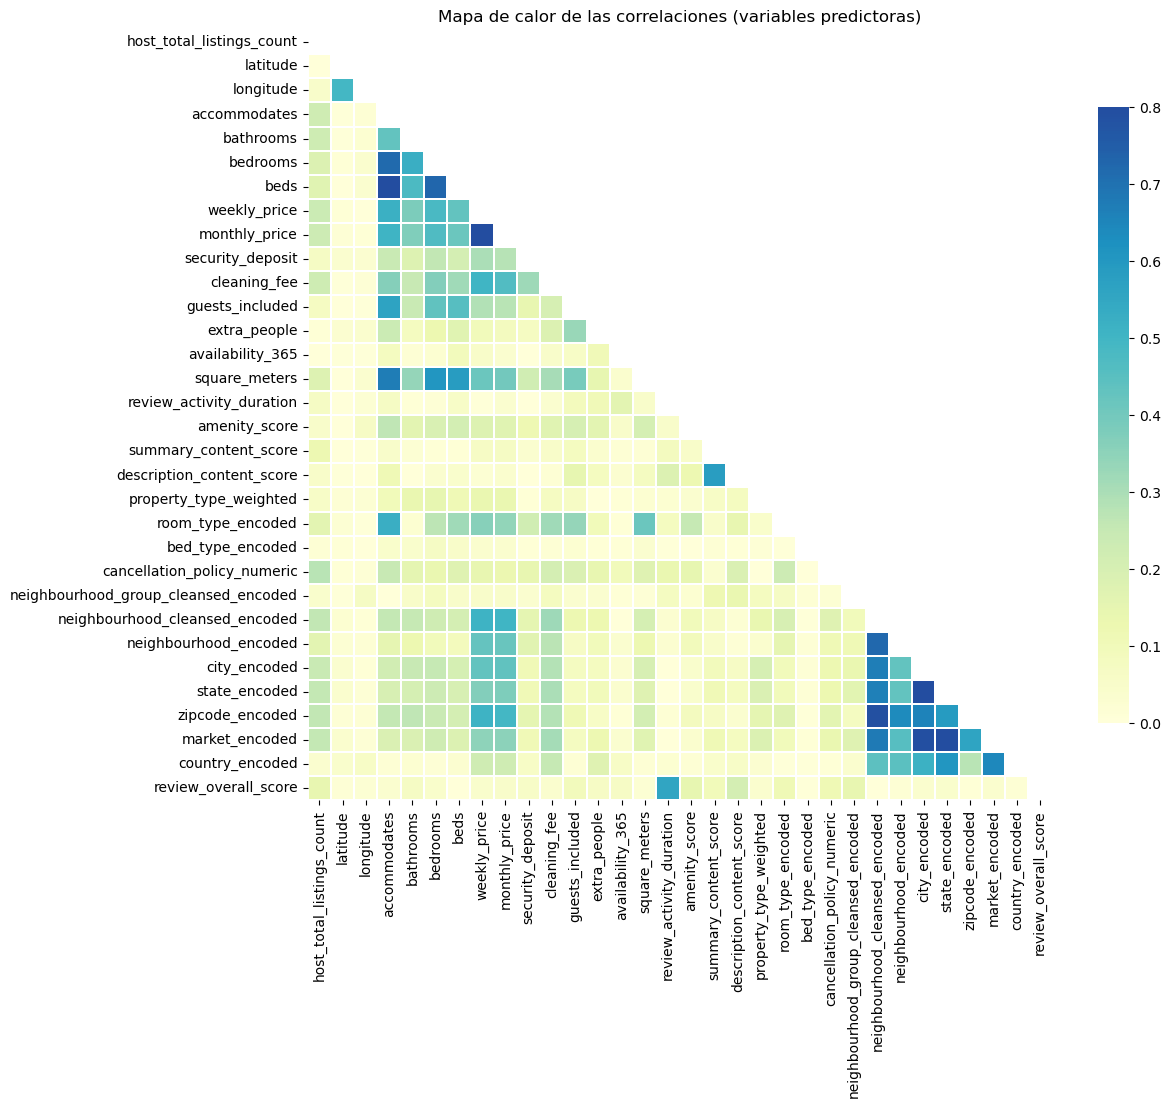

In [321]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación (usando valores absolutos)
correlacion = np.abs(df_bnb_train.drop(['price_log'], axis=1).corr())

# Generar una máscara para el triángulo superior (evitar duplicados)
mascara = np.zeros_like(correlacion, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de Matplotlib
figura, eje = plt.subplots(figsize=(12, 10))

# Dibujar el mapa de calor con la máscara y la relación de aspecto correcta
sns.heatmap(correlacion, mask=mascara, vmin=0.0, vmax=0.8, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": 0.8})

plt.title("Mapa de calor de las correlaciones (variables predictoras)")
plt.show()


**weekly_price y monthly_price**

Son muy similares con price_log

In [322]:
# Eliminar la columna redundante 'monthly_price'
df_bnb_train.drop(columns=['monthly_price', 'weekly_price'], inplace=True)

# Confirmar que las columnas fueron eliminadas
print("Columnas después de eliminar 'monthly_price', 'weekly_price':")
print(df_bnb_train.columns)

Columnas después de eliminar 'monthly_price', 'weekly_price':
Index(['host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'availability_365', 'square_meters',
       'review_activity_duration', 'amenity_score', 'summary_content_score',
       'description_content_score', 'property_type_weighted',
       'room_type_encoded', 'bed_type_encoded', 'cancellation_policy_numeric',
       'neighbourhood_group_cleansed_encoded',
       'neighbourhood_cleansed_encoded', 'neighbourhood_encoded',
       'city_encoded', 'state_encoded', 'zipcode_encoded', 'market_encoded',
       'country_encoded', 'price_log', 'review_overall_score'],
      dtype='object')


**Outliers**

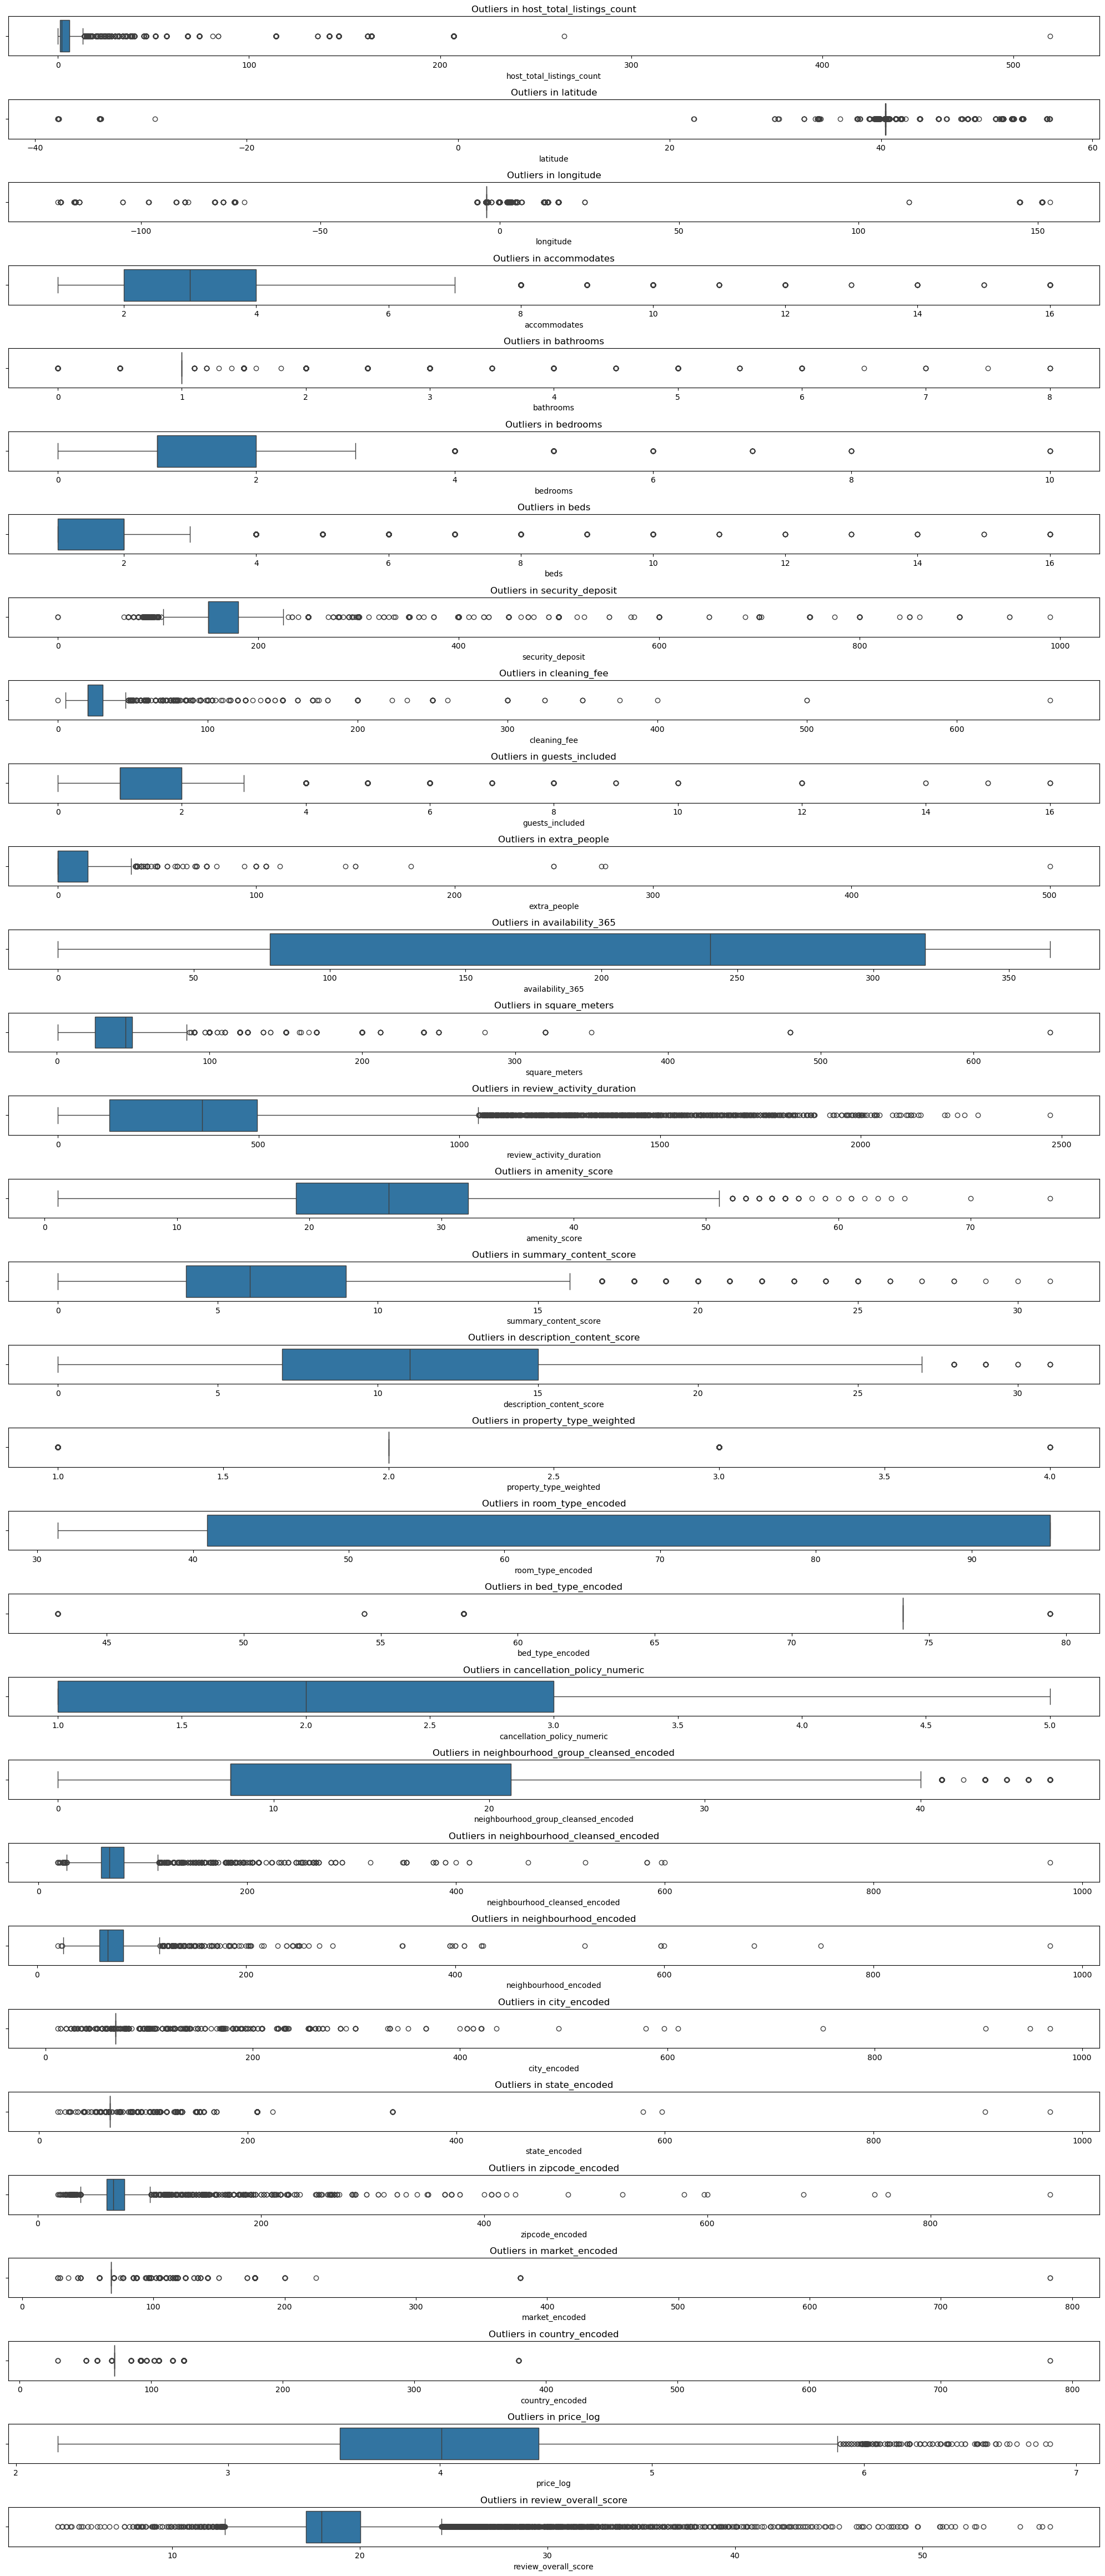

In [323]:

# Seleccionar solo las columnas numéricas
numeric_columns = df_bnb_train.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Configurar el tamaño del gráfico
plt.figure(figsize=(20, len(numeric_columns) * 1.5))

# Crear un gráfico de caja para cada columna en un grid de subplots
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=df_bnb_train[column])
    plt.title(f'Outliers in {column}')
plt.tight_layout()
plt.show()


In [324]:
import numpy as np

# Calcular cuartiles y rango intercuartílico (IQR)
Q1 = df_bnb_train['extra_people'].quantile(0.25)
Q3 = df_bnb_train['extra_people'].quantile(0.75)
IQR = Q3 - Q1

# Límites para detectar outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df_bnb_train[(df_bnb_train['extra_people'] < lower_limit) | 
                        (df_bnb_train['extra_people'] > upper_limit)]

# Ordenar los outliers de mayor a menor
outliers_sorted = outliers.sort_values(by='extra_people', ascending=False)

print(f"Número de outliers detectados: {len(outliers_sorted)}")
print("Outliers ordenados de mayor a menor:")
print(outliers_sorted[['extra_people']])



Número de outliers detectados: 186
Outliers ordenados de mayor a menor:
       extra_people
321             500
2360            276
6998            274
4281            250
5346            250
9517            178
3229            150
11514           150
8576            145
1112            112
10973           105
8466            105
9065            105
5526            105
4211            105
805             100
3009            100
11053           100
3850            100
10343           100
8650            100
3628             94
10313            80
166              75
8293             75
2308             75
4085             75
9071             75
386              75
11408            75
6848             70
7007             70
5523             70
7233             70
2189             69
7852             69
11024            65
7033             63
1702             60
8239             60
4709             60
965              59
6446             55
2985             55
6700             55
110     

In [325]:
#eliminare la columna extra_people pues tiene outliers muy grandes y numeros que no concuerdan con la cantidad de habitaciones, camas y personas en el inmueble, por ejemplo 500 personas?
df_bnb_train.drop(columns=[
    'extra_people'
], inplace=True)

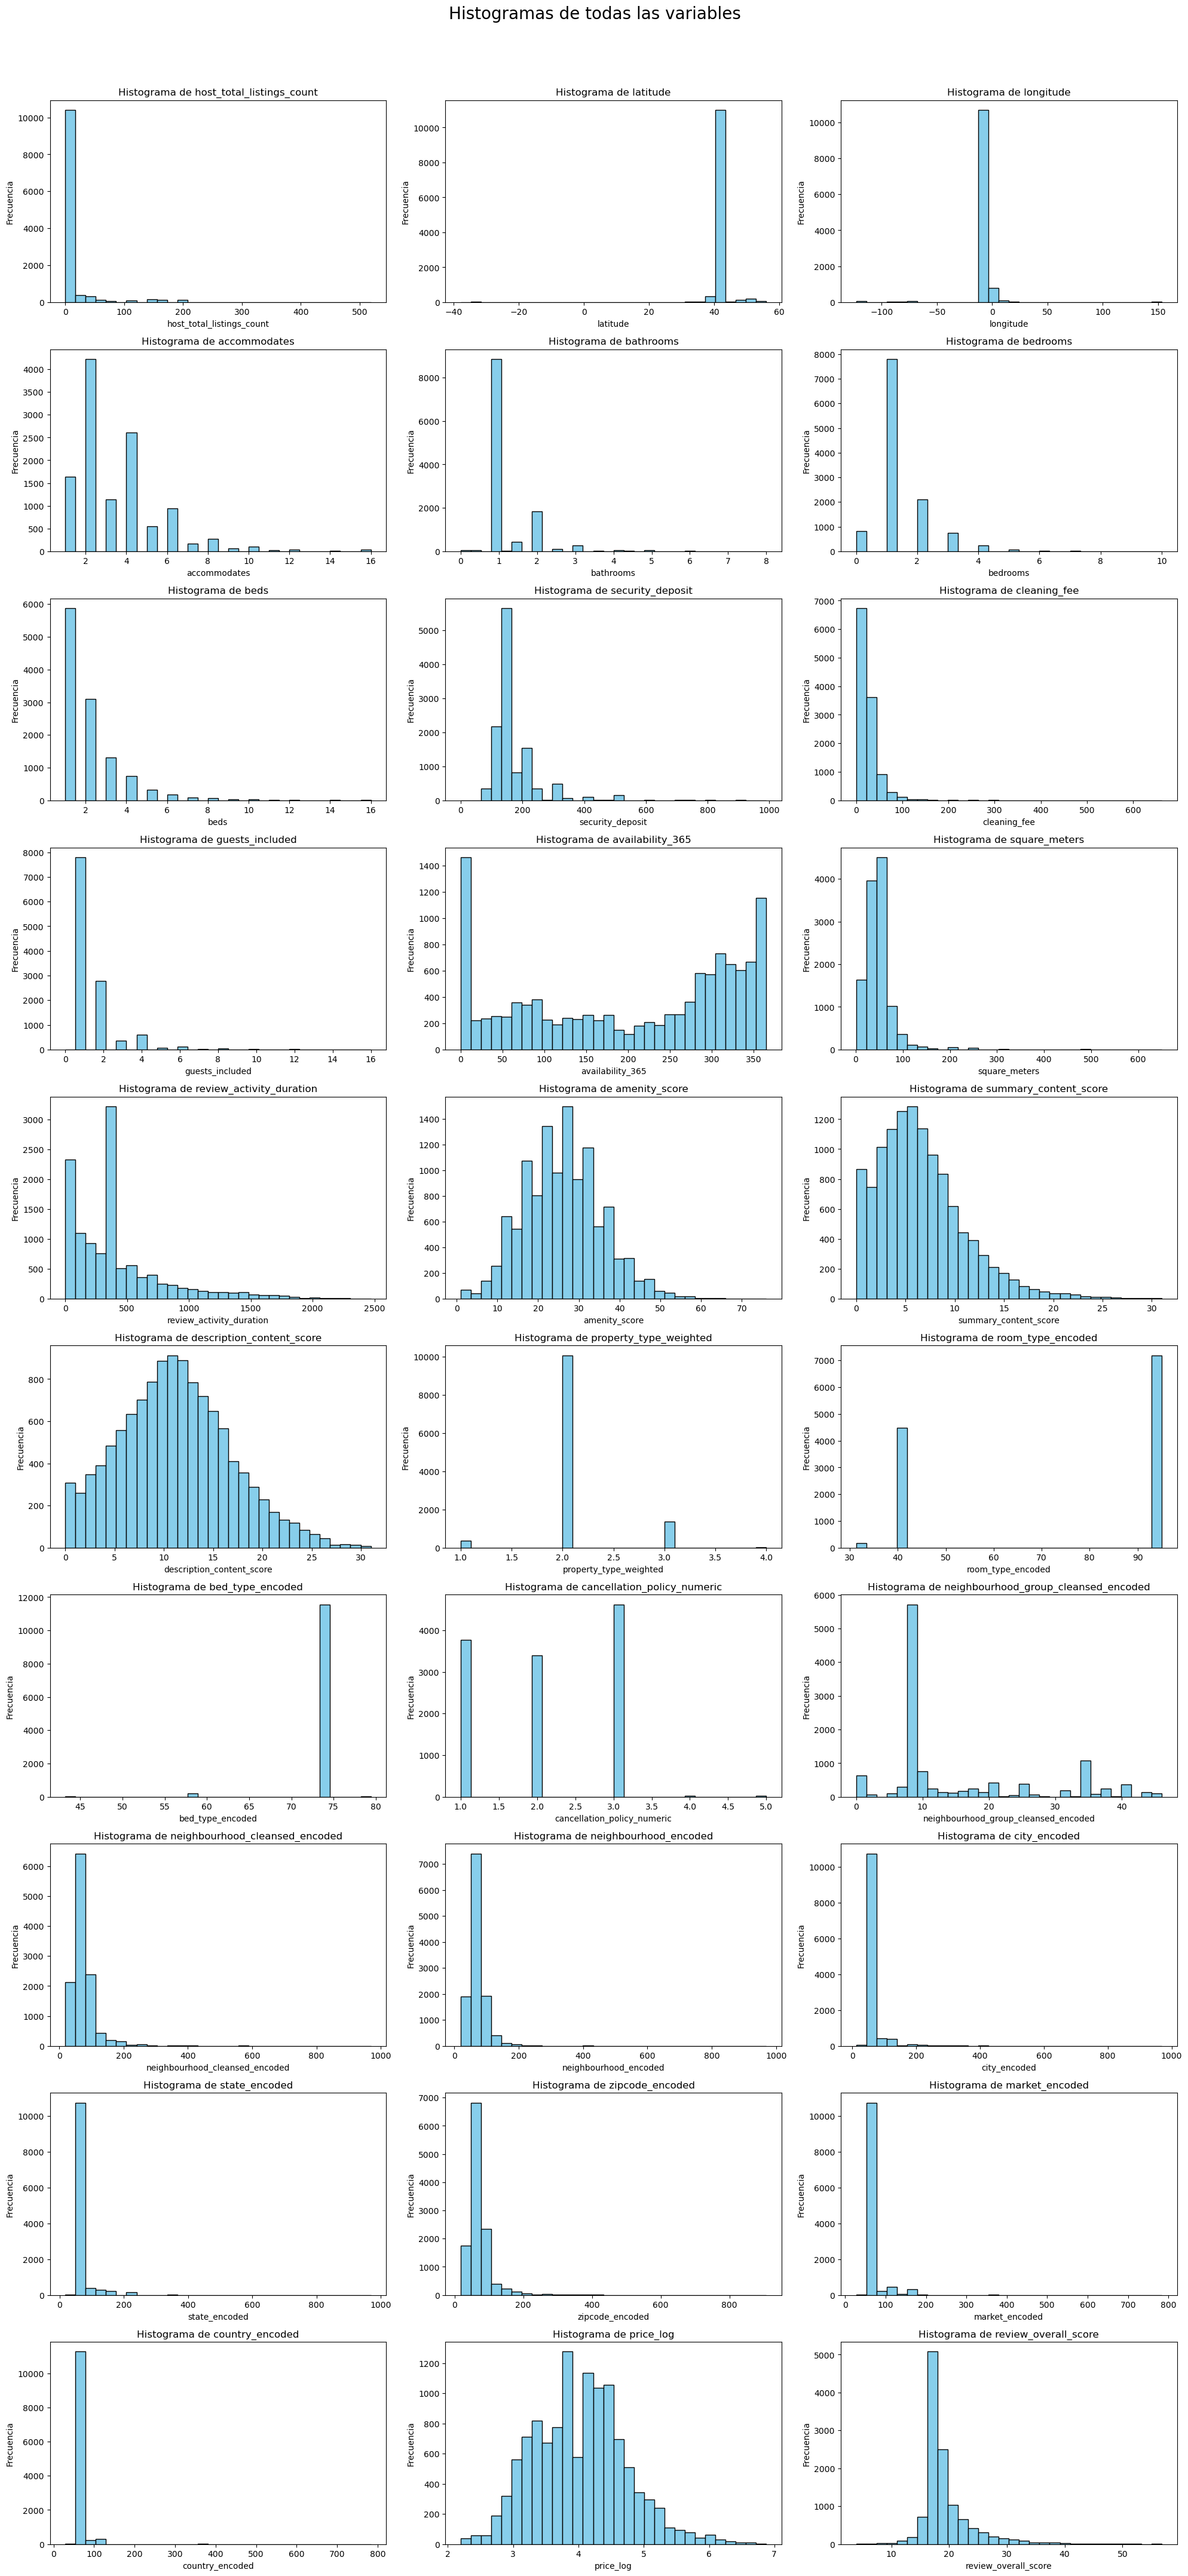

In [326]:

# Configuración del histograma
fig, axes = plt.subplots(nrows=18, ncols=3, figsize=(20, 80)) 
fig.suptitle('Histogramas de todas las variables', fontsize=20)
plt.subplots_adjust(hspace=0.5)

# Generar histogramas para cada columna numérica
for i, column in enumerate(df_bnb_train.select_dtypes(include=['float64', 'int64', 'int64']).columns):
    row, col = divmod(i, 3)
    axes[row, col].hist(df_bnb_train[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'Histograma de {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frecuencia')

# Eliminar cualquier subgráfico vacío
for j in range(i + 1, 18 * 3):
    fig.delaxes(axes.flat[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.97])  
plt.show()


**Outliers en price**

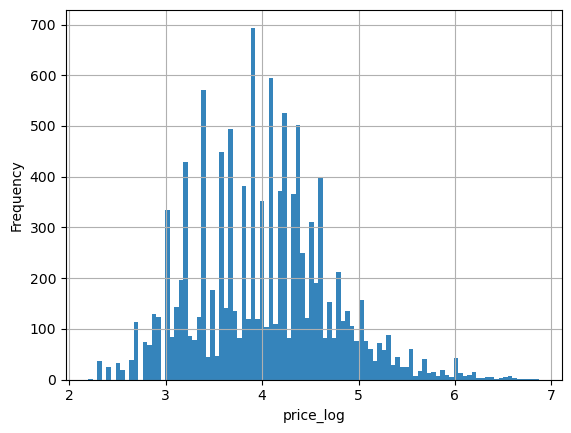

In [327]:
df_bnb_train['price_log'].plot.hist(alpha=0.9, bins=100, grid = True)
plt.xlabel('price_log')

plt.show()

In [328]:
df_bnb_train.shape

(11824, 30)

In [329]:
df_bnb_train.describe().T

count        mean         std  \
host_total_listings_count             11824.0   12.751691   34.574932   
latitude                              11824.0   40.491628    4.701030   
longitude                             11824.0   -3.776863   14.014695   
accommodates                          11824.0    3.277486    2.093973   
bathrooms                             11824.0    1.285107    0.663650   
bedrooms                              11824.0    1.344976    0.905398   
beds                                  11824.0    2.048630    1.622941   
security_deposit                      11824.0  169.713506   81.916266   
cleaning_fee                          11824.0   28.275668   25.643633   
guests_included                       11824.0    1.581614    1.160518   
availability_365                      11824.0  202.217185  128.006830   
square_meters                         11824.0   44.767759   32.264828   
review_activity_duration              11824.0  399.057426  379.003909   
amenity_score                         11824.0   25.763870    9.452753   
summary_content_score                 11824.0    6.818589    4.224199   
description_content_score             11824.0   11.306411    5.458794   
property_type_weighted                11824.0    2.087618    0.380221   
room_type_encoded                     11824.0   73.688853   26.610500   
bed_type_encoded                      11824.0   73.688853    2.708106   
cancellation_policy_numeric           11824.0    2.080937    0.852654   
neighbourhood_group_cleansed_encoded  11824.0   15.006512   11.879553   
neighbourhood_cleansed_encoded        11824.0   73.688853   36.261155   
neighbourhood_encoded                 11824.0   73.688853   30.391431   
city_encoded                          11824.0   73.688853   30.908734   
state_encoded                         11824.0   73.688853   26.299392   
zipcode_encoded                       11824.0   73.714636   36.576549   
market_encoded                        11824.0   73.688853   24.746587   
country_encoded                       11824.0   73.688853   16.002519   
price_log                             11824.0    4.024276    0.709102   
review_overall_score                  11824.0   19.319130    4.540912   

                                             min         25%         50%  \
host_total_listings_count               0.000000    1.000000    2.000000   
latitude                              -37.851182   40.409758   40.419331   
longitude                            -123.124429   -3.707538   -3.700763   
accommodates                            1.000000    2.000000    3.000000   
bathrooms                               0.000000    1.000000    1.000000   
bedrooms                                0.000000    1.000000    1.000000   
beds                                    1.000000    1.000000    2.000000   
security_deposit                        0.000000  150.000000  150.000000   
cleaning_fee                            0.000000   20.000000   20.000000   
guests_included                         0.000000    1.000000    1.000000   
availability_365                        0.000000   78.000000  240.000000   
square_meters                           0.743224   24.990907   44.965052   
review_activity_duration                0.000000  129.000000  359.000000   
amenity_score                           1.000000   19.000000   26.000000   
summary_content_score                   0.000000    4.000000    6.000000   
description_content_score               0.000000    7.000000   11.000000   
property_type_weighted                  1.000000    2.000000    2.000000   
room_type_encoded                      31.320988   40.901141   95.029064   
bed_type_encoded                       43.222222   74.055858   74.055858   
cancellation_policy_numeric             1.000000    1.000000    2.000000   
neighbourhood_group_cleansed_encoded    0.000000    8.000000    8.000000   
neighbourhood_cleansed_encoded         18.500000   59.956140   67.774528   
neighbourhood_encoded       

In [330]:
# guardar df
df_bnb_train.to_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_train_processed6.csv", index=False)

In [106]:
# Ruta completa del archivo
file_path = r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_train_processed6.csv"

# Cargar el DataFrame desde el archivo CSV
df_bnb_train = pd.read_csv(file_path)

# Verificar las primeras filas
print(df_bnb_train.head())

   host_total_listings_count   latitude  longitude  accommodates  bathrooms  \
0                        2.0  40.407732  -3.684819             4        1.0   
1                        1.0  40.415802  -3.705340             4        1.0   
2                       16.0  40.389048  -3.740374             1        1.5   
3                      114.0  40.412814  -3.703052             2        3.0   
4                        2.0  40.438631  -3.713716             2        1.0   

   bedrooms  beds  security_deposit  cleaning_fee  guests_included  ...  \
0         1     2             150.0          25.0                1  ...   
1         1     2             150.0          15.0                1  ...   
2         1     8             150.0           5.0                1  ...   
3         1     1             150.0          20.0                1  ...   
4         1     1             150.0          20.0                1  ...   

   neighbourhood_group_cleansed_encoded  neighbourhood_cleansed_encoded  \

**'neighbourhood_group_cleansed_encoded','neighbourhood_cleansed_encoded', 'neighbourhood_encoded'**

In [107]:
# Añadir la columna 'price' para analizar su correlación con las variables seleccionadas
columns_to_analyze_with_price_log = ['neighbourhood_group_cleansed_encoded', 
                                 'neighbourhood_cleansed_encoded', 
                                 'neighbourhood_encoded', 
                                 'price_log']

# Calcular la matriz de correlación
correlation_with_price_log = df_bnb_train[columns_to_analyze_with_price_log].corr()

# Filtrar solo las correlaciones con 'price'
correlation_with_price_log = correlation_with_price_log['price_log'].sort_values(ascending=False)

# Mostrar las correlaciones con 'price'
print("Correlación de las columnas seleccionadas con 'price_log':")
print(correlation_with_price_log)


Correlación de las columnas seleccionadas con 'price_log':
price_log                               1.000000
neighbourhood_cleansed_encoded          0.460438
neighbourhood_encoded                   0.380684
neighbourhood_group_cleansed_encoded   -0.026206
Name: price_log, dtype: float64


In [108]:
# Ver el contenido de las columnas seleccionadas
columns_to_view = ['neighbourhood_group_cleansed_encoded', 
                   'neighbourhood_cleansed_encoded', 
                   'neighbourhood_encoded']

# Mostrar las primeras filas de estas columnas
print(df_bnb_train[columns_to_view].head())


   neighbourhood_group_cleansed_encoded  neighbourhood_cleansed_encoded  \
0                                    34                      104.600000   
1                                     8                       85.710220   
2                                     7                       37.074074   
3                                     8                       60.703779   
4                                    10                       56.000000   

   neighbourhood_encoded  
0             104.121212  
1              84.620205  
2              39.979522  
3              59.554729  
4              61.982301  


In [109]:
# Eliminar la columna 'neighbourhood_group_cleansed_encoded' y neighbourhood_cleansed_encoded para evitar redundancias
df_bnb_train.drop(columns=['neighbourhood_group_cleansed_encoded', 'neighbourhood_cleansed_encoded'], inplace=True)

# Confirmar que la columna fue eliminada
print("Columnas después de eliminar 'neighbourhood_group_cleansed_encoded'y 'neighbourhood_cleansed_encoded':")
print(df_bnb_train.columns)


Columnas después de eliminar 'neighbourhood_group_cleansed_encoded'y 'neighbourhood_cleansed_encoded':
Index(['host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee',
       'guests_included', 'availability_365', 'square_meters',
       'review_activity_duration', 'amenity_score', 'summary_content_score',
       'description_content_score', 'property_type_weighted',
       'room_type_encoded', 'bed_type_encoded', 'cancellation_policy_numeric',
       'neighbourhood_encoded', 'city_encoded', 'state_encoded',
       'zipcode_encoded', 'market_encoded', 'country_encoded', 'price_log',
       'review_overall_score'],
      dtype='object')


In [110]:
# Seleccionar las columnas específicas junto con 'price' para analizar la correlación
columns_to_analyze_with_price_log = ['city_encoded', 'state_encoded', 
                                 'zipcode_encoded', 'market_encoded', 
                                 'country_encoded', 'price_log', 
                                 'latitude', 'longitude']

# Calcular la matriz de correlación
correlation_with_price_log = df_bnb_train[columns_to_analyze_with_price_log].corr()

# Filtrar solo las correlaciones con 'price'
correlation_with_price_log = correlation_with_price_log['price_log'].sort_values(ascending=False)

# Mostrar las correlaciones con 'price'
print("Correlación de las columnas seleccionadas con 'price_log':")
print(correlation_with_price_log)


Correlación de las columnas seleccionadas con 'price_log':
price_log          1.000000
zipcode_encoded    0.436939
city_encoded       0.298982
state_encoded      0.283007
market_encoded     0.278941
country_encoded    0.140917
latitude          -0.008378
longitude         -0.015694
Name: price_log, dtype: float64


In [111]:
# Seleccionar las columnas específicas para analizar la correlación entre ellas
columns_to_analyze = ['city_encoded', 'state_encoded', 
                      'zipcode_encoded', 'market_encoded', 
                      'country_encoded', 'latitude', 'longitude']

# Calcular la matriz de correlación
correlation_matrix = df_bnb_train[columns_to_analyze].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación entre las columnas seleccionadas:")
print(correlation_matrix)


Matriz de correlación entre las columnas seleccionadas:
                 city_encoded  state_encoded  zipcode_encoded  market_encoded  \
city_encoded         1.000000       0.834548         0.658423        0.796796   
state_encoded        0.834548       1.000000         0.592056        0.925752   
zipcode_encoded      0.658423       0.592056         1.000000        0.559691   
market_encoded       0.796796       0.925752         0.559691        1.000000   
country_encoded      0.517831       0.608475         0.275143        0.646257   
latitude            -0.032247      -0.038462        -0.013870       -0.040440   
longitude            0.010915       0.012669        -0.019531        0.013886   

                 country_encoded  latitude  longitude  
city_encoded            0.517831 -0.032247   0.010915  
state_encoded           0.608475 -0.038462   0.012669  
zipcode_encoded         0.275143 -0.013870  -0.019531  
market_encoded          0.646257 -0.040440   0.013886  
country_encoded

In [112]:
# Eliminar las columnas seleccionadas
columns_to_drop = ['state_encoded', 'market_encoded', 'country_encoded', 'latitude', 'longitude']
df_bnb_train.drop(columns=columns_to_drop, inplace=True)

# Verificar las columnas restantes
print("Columnas después de eliminar:")
print(df_bnb_train.columns)


Columnas después de eliminar:
Index(['host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'security_deposit', 'cleaning_fee', 'guests_included',
       'availability_365', 'square_meters', 'review_activity_duration',
       'amenity_score', 'summary_content_score', 'description_content_score',
       'property_type_weighted', 'room_type_encoded', 'bed_type_encoded',
       'cancellation_policy_numeric', 'neighbourhood_encoded', 'city_encoded',
       'zipcode_encoded', 'price_log', 'review_overall_score'],
      dtype='object')


In [113]:
# Seleccionar las columnas específicas para analizar la correlación entre ellas
columns_to_analyze = [
                      'neighbourhood_encoded', 
                      'city_encoded', 
                      'zipcode_encoded']

# Calcular la matriz de correlación
correlation_matrix = df_bnb_train[columns_to_analyze].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación entre las columnas seleccionadas:")
print(correlation_matrix)


Matriz de correlación entre las columnas seleccionadas:
                       neighbourhood_encoded  city_encoded  zipcode_encoded
neighbourhood_encoded               1.000000      0.429719         0.637039
city_encoded                        0.429719      1.000000         0.658423
zipcode_encoded                     0.637039      0.658423         1.000000


In [114]:
# Seleccionar las columnas específicas junto con 'price' para analizar la correlación
columns_to_analyze_with_price_log = [ 
                                 'neighbourhood_encoded', 
                                 'city_encoded', 
                                 'zipcode_encoded', 
                                 'price_log']

# Calcular la matriz de correlación
correlation_with_price_log = df_bnb_train[columns_to_analyze_with_price_log].corr()

# Filtrar solo las correlaciones con 'price'
correlation_with_price_log = correlation_with_price_log['price_log'].sort_values(ascending=False)

# Mostrar las correlaciones con 'price'
print("Correlación de las columnas seleccionadas con 'price_log':")
print(correlation_with_price_log)


Correlación de las columnas seleccionadas con 'price_log':
price_log                1.000000
zipcode_encoded          0.436939
neighbourhood_encoded    0.380684
city_encoded             0.298982
Name: price_log, dtype: float64


In [115]:
# Eliminar la columna 'host_total_listings_count'
df_bnb_train.drop(columns=['host_total_listings_count'], inplace=True)

In [116]:
df_bnb_train.describe()

accommodates     bathrooms      bedrooms          beds  \
count  11824.000000  11824.000000  11824.000000  11824.000000   
mean       3.277486      1.285107      1.344976      2.048630   
std        2.093973      0.663650      0.905398      1.622941   
min        1.000000      0.000000      0.000000      1.000000   
25%        2.000000      1.000000      1.000000      1.000000   
50%        3.000000      1.000000      1.000000      2.000000   
75%        4.000000      1.000000      2.000000      2.000000   
max       16.000000      8.000000     10.000000     16.000000   

       security_deposit  cleaning_fee  guests_included  availability_365  \
count      11824.000000  11824.000000     11824.000000      11824.000000   
mean         169.713506     28.275668         1.581614        202.217185   
std           81.916266     25.643633         1.160518        128.006830   
min            0.000000      0.000000         0.000000          0.000000   
25%          150.000000     20.000000         1.000000         78.000000   
50%          150.000000     20.000000         1.000000        240.000000   
75%          180.000000     30.000000         2.000000        319.000000   
max          990.000000    662.000000        16.000000        365.000000   

       square_meters  review_activity_duration  ...  \
count   11824.000000              11824.000000  ...   
mean       44.767759                399.057426  ...   
std        32.264828                379.003909  ...   
min         0.743224                  0.000000  ...   
25%        24.990907                129.000000  ...   
50%        44.965052                359.000000  ...   
75%        49.470847                496.250000  ...   
max       650.042291               2471.000000  ...   

       description_content_score  property_type_weighted  room_type_encoded  \
count               11824.000000            11824.000000       11824.000000   
mean                   11.306411                2.087618          73.688853   
std                     5.458794                0.380221          26.610500   
min                     0.000000                1.000000          31.320988   
25%                     7.000000                2.000000          40.901141   
50%                    11.000000                2.000000          95.029064   
75%                    15.000000                2.000000          95.029064   
max                    31.000000                4.000000          95.029064   

       bed_type_encoded  cancellation_policy_numeric  neighbourhood_encoded  \
count      11824.000000                 11824.000000           11824.000000   
mean          73.688853                     2.080937              73.688853   
std            2.708106                     0.852654              30.391431   
min           43.222222                     1.000000              20.000000   
25%           74.055858                     1.000000              59.554729   
50%           74.055858                     2.000000              67.910663   
75%           74.055858                     3.000000              82.595993   
max           79.411765                     5.000000             969.000000   

       city_encoded  zipcode_encoded     price_log  review_overall_score  
count  11824.000000     11824.000000  11824.000000          11824.000000  
mean      73.688853        73.714636      4.024276             19.319130  
std       30.908734        36.576549      0.709102              4.540912  
min       12.000000        18.000000      2.197225              3.901111  
25%       67.821066        61.730689      3.526361             17.134444  
50%       67.821066        67.767513      4.007333             17.942222  
75%       67.821066        77.422078      4.465908             20.021667  
max      969.000000       907.000000      6.876265             56.785556  

[8 rows x 22 columns]

**Analizar distribuciones de variables clave**

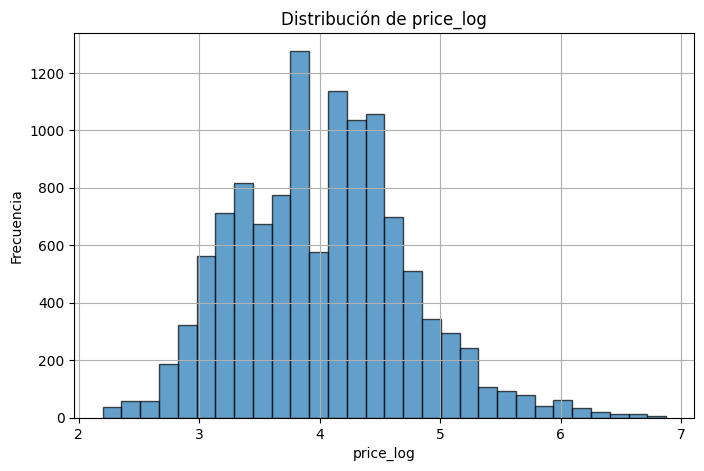

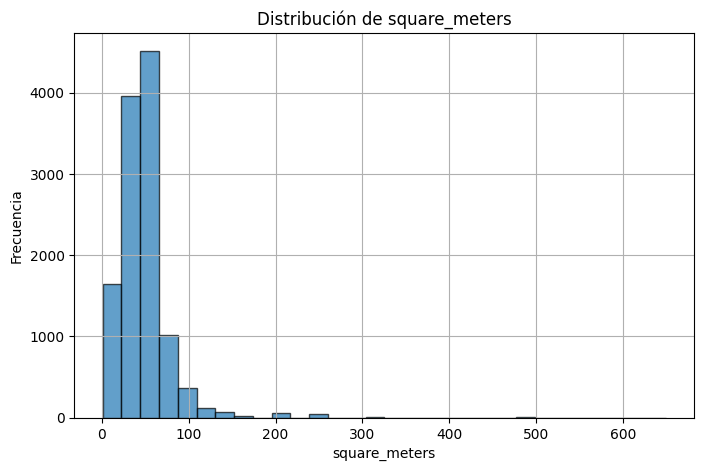

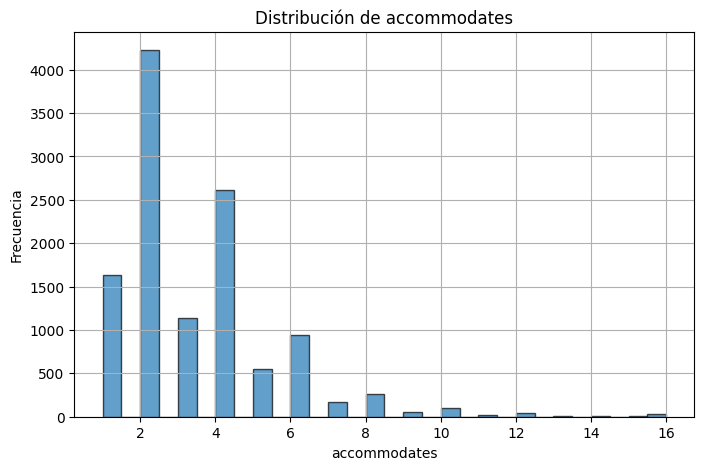

In [117]:
import pandas as pd
import matplotlib.pyplot as plt



# Variables clave para analizar
variables = ["price_log", "square_meters", "accommodates"]

# Generar histogramas para inspeccionar
for var in variables:
    plt.figure(figsize=(8, 5))
    plt.hist(df_bnb_train[var], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()


**Identificar valores extremos**

In [118]:
# Función para calcular los límites basados en IQR
def calculate_outlier_limits(data, variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return lower_limit, upper_limit

# Calcular límites para cada variable
outlier_limits = {}
for var in variables:
    lower, upper = calculate_outlier_limits(df_bnb_train, var)
    outlier_limits[var] = (lower, upper)
    print(f"Límites para {var}: Inferior={lower}, Superior={upper}")


Límites para price_log: Inferior=2.1170391335585284, Superior=5.8752295097122165
Límites para square_meters: Inferior=-11.729003749999997, Superior=86.19075824999999
Límites para accommodates: Inferior=-1.0, Superior=7.0


In [119]:
import joblib

# Guardar los límites de outliers en un archivo
outlier_limits_path = r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\joblib\outlier_limits.pkl"
joblib.dump(outlier_limits, outlier_limits_path)
print(f"Límites de outliers guardados en: {outlier_limits_path}")


Límites de outliers guardados en: D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\joblib\outlier_limits.pkl


In [120]:
# Eliminar valores fuera de los límites
for var, (lower, upper) in outlier_limits.items():
    df_bnb_train = df_bnb_train[(df_bnb_train[var] >= lower) & (df_bnb_train[var] <= upper)]

**Escalado**

In [121]:
from sklearn.preprocessing import MinMaxScaler

# Definir las columnas categóricas a escalar
categorical_columns = ["room_type_encoded", "bed_type_encoded", "property_type_weighted"]


# Guardar las columnas categóricas
categorical_columns_path = r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\joblib\categorical_columns.pkl"
joblib.dump(categorical_columns, categorical_columns_path)


# Escalar columnas categóricas en train
scaler = MinMaxScaler()
df_bnb_train[categorical_columns] = scaler.fit_transform(df_bnb_train[categorical_columns])

# Guardar el escalador
scaler_path = r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\joblib\scaler.pkl"
joblib.dump(scaler, scaler_path)


['D:\\AI Bootcamp Github\\bnb_forecaster_ML\\notebooks\\data\\joblib\\scaler.pkl']

In [122]:
df_bnb_train.shape


(10761, 22)

**Feature Engineering**

In [123]:
import pandas as pd
import numpy as np

# Crear nuevas características (ejemplo)
df_bnb_train['price_per_guest'] = df_bnb_train['price_log'] / (df_bnb_train['accommodates'] + 1)  # Precio por huésped
df_bnb_train['total_beds'] = df_bnb_train['beds'] * df_bnb_train['bedrooms']  # Total de camas



**Variables redundantes**

In [124]:
# Comparar las correlaciones
corr_neighbourhood = df_bnb_train['neighbourhood_encoded'].corr(df_bnb_train['price_log'])
corr_zipcode = df_bnb_train['zipcode_encoded'].corr(df_bnb_train['price_log'])

print(f"Correlación de neighbourhood_encoded: {corr_neighbourhood}")
print(f"Correlación de zipcode_encoded: {corr_zipcode}")

# Eliminar la columna con menor correlación
if corr_neighbourhood < corr_zipcode:
    df_bnb_train.drop(columns=['neighbourhood_encoded'], inplace=True)
    print("Se eliminó 'neighbourhood_encoded'")
else:
    df_bnb_train.drop(columns=['zipcode_encoded'], inplace=True)
    print("Se eliminó 'zipcode_encoded'")


Correlación de neighbourhood_encoded: 0.3858257253947289
Correlación de zipcode_encoded: 0.40975075877714484
Se eliminó 'neighbourhood_encoded'


**Price_log optimización**

In [125]:
from sklearn.preprocessing import MinMaxScaler

# Escalar price_log
scaler = MinMaxScaler()
df_bnb_train['price_log'] = scaler.fit_transform(df_bnb_train[['price_log']])

# Guardar el escalador para usarlo en test
joblib.dump(scaler, r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\models\minmax_pricescaler.pkl")



['D:\\AI Bootcamp Github\\bnb_forecaster_ML\\notebooks\\models\\minmax_pricescaler.pkl']

In [126]:
# guardar df_bnb_train_finalpreprocess
df_bnb_train.to_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_train_finalpreprocess.csv", index=False)

In [127]:
# Ruta completa del archivo
file_path = r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_train_finalpreprocess.csv"

# Cargar el DataFrame desde el archivo CSV
df_bnb_train = pd.read_csv(file_path)


df_bnb_train.shape


(10761, 23)

In [129]:
for column in sorted(df_bnb_train.columns):
    print(column)

accommodates
amenity_score
availability_365
bathrooms
bed_type_encoded
bedrooms
beds
cancellation_policy_numeric
city_encoded
cleaning_fee
description_content_score
guests_included
price_log
price_per_guest
property_type_weighted
review_activity_duration
review_overall_score
room_type_encoded
security_deposit
square_meters
summary_content_score
total_beds
zipcode_encoded


# **Modelado, cross-validation y estudio de resultados en train y test**

# **Construcción y validación del modelo**

Utilizaré k-fold cross  de 5 iteraciones para una evaluacion previa al test mas robusta.

In [130]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np

# Cargar datasets
df_train = pd.read_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_train_finalpreprocess.csv")
df_test = pd.read_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_test_finalpreprocess.csv")

# Definir X (features) e y (target)
X = df_train.drop(columns=['price_log'])  # columna objetivo
y = df_train['price_log']

# Configurar K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar el modelo
model = RandomForestRegressor(random_state=42)

# Almacenar métricas
mae_scores = []
rmse_scores = []
mae_original_scores = []
rmse_original_scores = []

# Realizar K-Fold
for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Predecir en validación
    y_pred_log = model.predict(X_val)

    # Calcular métricas en escala logarítmica
    mae_log = mean_absolute_error(y_val, y_pred_log)
    rmse_log = sqrt(mean_squared_error(y_val, y_pred_log))
    mae_scores.append(mae_log)
    rmse_scores.append(rmse_log)

    # Revertir logaritmo para obtener predicciones y valores reales
    y_val_original = np.expm1(y_val)
    y_pred_original = np.expm1(y_pred_log)

    # Calcular métricas en escala original
    mae_original = mean_absolute_error(y_val_original, y_pred_original)
    rmse_original = sqrt(mean_squared_error(y_val_original, y_pred_original))
    mae_original_scores.append(mae_original)
    rmse_original_scores.append(rmse_original)

    print(f"  MAE (Log): {mae_log:.2f}")
    print(f"  RMSE (Log): {rmse_log:.2f}")
    print(f"  MAE (Original): {mae_original:.2f}")
    print(f"  RMSE (Original): {rmse_original:.2f}")

# Promedio de métricas
print("\nResultados promedio:")
print(f"MAE promedio (Log): {sum(mae_scores) / len(mae_scores):.2f}")
print(f"RMSE promedio (Log): {sum(rmse_scores) / len(rmse_scores):.2f}")
print(f"MAE promedio (Original): {sum(mae_original_scores) / len(mae_original_scores):.2f}")
print(f"RMSE promedio (Original): {sum(rmse_original_scores) / len(rmse_original_scores):.2f}")


Fold 1:
  MAE (Log): 0.01
  RMSE (Log): 0.03
  MAE (Original): 0.01
  RMSE (Original): 0.05
Fold 2:
  MAE (Log): 0.01
  RMSE (Log): 0.02
  MAE (Original): 0.01
  RMSE (Original): 0.05
Fold 3:
  MAE (Log): 0.01
  RMSE (Log): 0.03
  MAE (Original): 0.01
  RMSE (Original): 0.05
Fold 4:
  MAE (Log): 0.01
  RMSE (Log): 0.02
  MAE (Original): 0.01
  RMSE (Original): 0.04
Fold 5:
  MAE (Log): 0.01
  RMSE (Log): 0.03
  MAE (Original): 0.01
  RMSE (Original): 0.05

Resultados promedio:
MAE promedio (Log): 0.01
RMSE promedio (Log): 0.03
MAE promedio (Original): 0.01
RMSE promedio (Original): 0.05


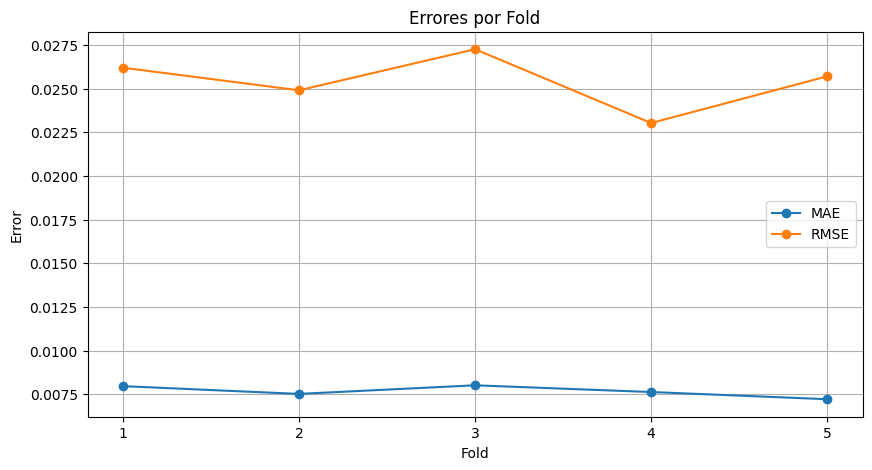

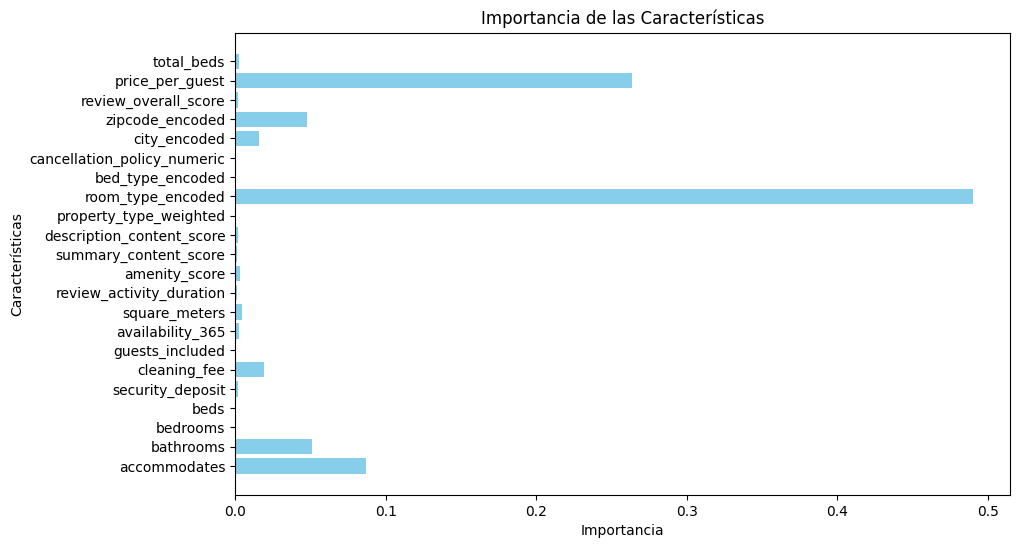

In [131]:
import matplotlib.pyplot as plt
import numpy as np

# Gráfica de errores por fold
folds = np.arange(1, len(mae_scores) + 1)

plt.figure(figsize=(10, 5))
plt.plot(folds, mae_scores, marker='o', label='MAE')
plt.plot(folds, rmse_scores, marker='o', label='RMSE')
plt.title('Errores por Fold')
plt.xlabel('Fold')
plt.ylabel('Error')
plt.xticks(folds)
plt.legend()
plt.grid()
plt.show()

# Importancia de las características
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


**El modelo es estable y consistente a lo largo de los 5 folds:**

El MAE es 0.25, en promedio el modelo predice con un error de 0.25 (en la escala del price_log).

El RMSE es 0.35, los errores son de 0.35, pero los errores más grandes afectan más este valor.

# **Entrenar modelo y evaluar en test** 

In [132]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import joblib

# Cargar los datasets
df_train = pd.read_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_train_finalpreprocess.csv")
df_test = pd.read_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_test_finalpreprocess.csv")

# Definir X (features) e y (target)
X_train = df_train.drop(columns=['price_log'])
y_train = df_train['price_log']

X_test = df_test.drop(columns=['price_log'])
y_test = df_test['price_log']

# Inicializar el modelo
model = RandomForestRegressor(random_state=42, n_estimators=100)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_test_pred_log = model.predict(X_test)

# Calcular métricas en escala logarítmica
mae_log = mean_absolute_error(y_test, y_test_pred_log)
rmse_log = sqrt(mean_squared_error(y_test, y_test_pred_log))

print("Resultados en el conjunto de prueba (escala logarítmica):")
print(f"MAE (Error Absoluto Medio): {mae_log:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse_log:.2f}")

# Revertir el logaritmo a la escala original
y_test_actual = np.expm1(y_test)  # Revertir log(1 + price)
y_test_pred = np.expm1(y_test_pred_log)

# Calcular métricas en escala original
mae = mean_absolute_error(y_test_actual, y_test_pred)
rmse = sqrt(mean_squared_error(y_test_actual, y_test_pred))

print("\nResultados en el conjunto de prueba (escala original):")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")

# Guardar el modelo entrenado
model_path = r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\models\random_forest_model.pkl"
joblib.dump(model, model_path)
print(f"\nModelo guardado exitosamente en {model_path}.")




Resultados en el conjunto de prueba (escala logarítmica):
MAE (Error Absoluto Medio): 0.01
RMSE (Raíz del Error Cuadrático Medio): 0.03

Resultados en el conjunto de prueba (escala original):
MAE (Error Absoluto Medio): 0.01
RMSE (Raíz del Error Cuadrático Medio): 0.05

Modelo guardado exitosamente en D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\models\random_forest_model.pkl.



Métricas adicionales:
R² (Log): 0.98
R² (Original): 0.97
MAPE (Log): 12398187734722.99%
MAPE (Original): 12874542738457.24%


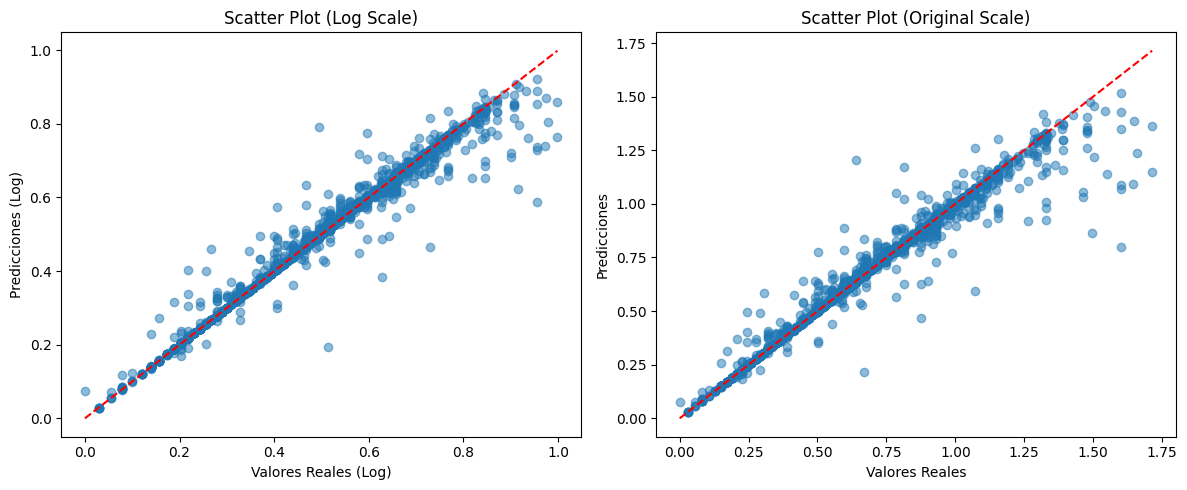

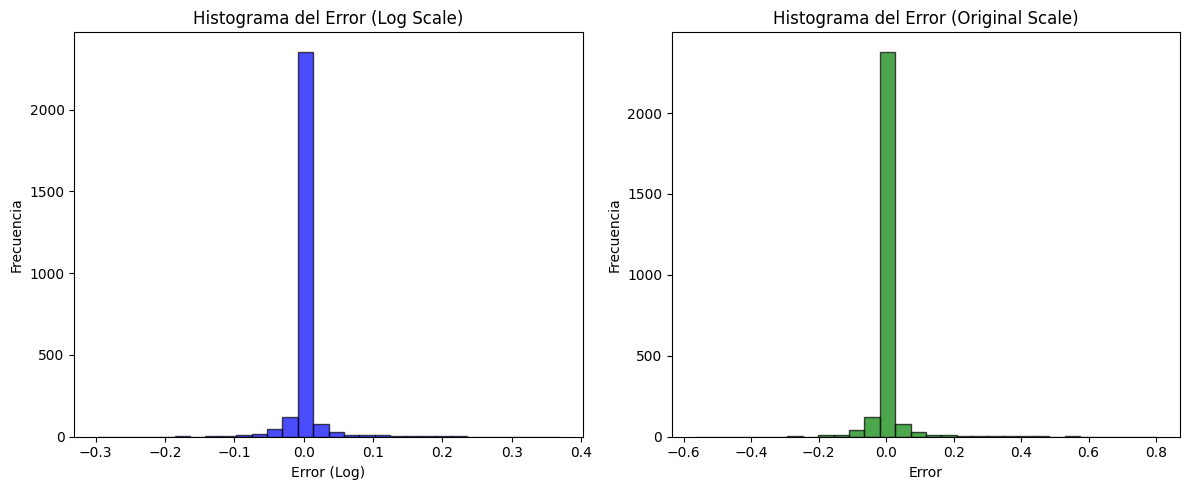

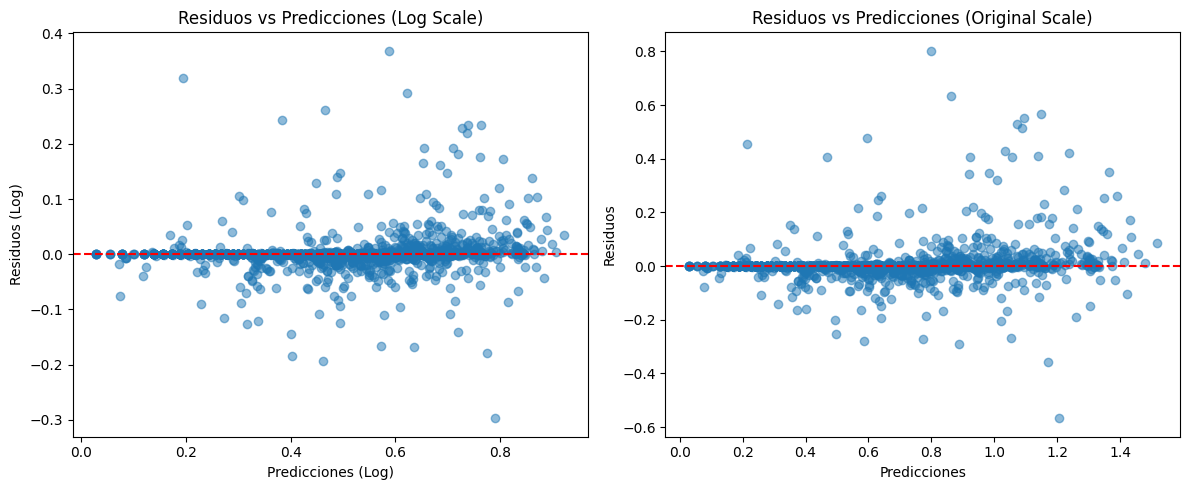

In [133]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import numpy as np

# Cálculo de métricas adicionales
r2_log = r2_score(y_test, y_test_pred_log)
r2_original = r2_score(y_test_actual, y_test_pred)
mape_log = mean_absolute_percentage_error(y_test, y_test_pred_log)
mape_original = mean_absolute_percentage_error(y_test_actual, y_test_pred)

print(f"\nMétricas adicionales:")
print(f"R² (Log): {r2_log:.2f}")
print(f"R² (Original): {r2_original:.2f}")
print(f"MAPE (Log): {mape_log:.2%}")
print(f"MAPE (Original): {mape_original:.2%}")

# Scatter Plot: Predicciones vs Valores Reales
plt.figure(figsize=(12, 5))

# Escala Logarítmica
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_log, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Scatter Plot (Log Scale)')
plt.xlabel('Valores Reales (Log)')
plt.ylabel('Predicciones (Log)')

# Escala Original
plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_test_pred, alpha=0.5)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.title('Scatter Plot (Original Scale)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

plt.tight_layout()
plt.show()

# Histograma del Error
plt.figure(figsize=(12, 5))

# Escala Logarítmica
plt.subplot(1, 2, 1)
errors_log = y_test - y_test_pred_log
plt.hist(errors_log, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histograma del Error (Log Scale)')
plt.xlabel('Error (Log)')
plt.ylabel('Frecuencia')

# Escala Original
plt.subplot(1, 2, 2)
errors_original = y_test_actual - y_test_pred
plt.hist(errors_original, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title('Histograma del Error (Original Scale)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Gráfica de Residuos
plt.figure(figsize=(12, 5))

# Escala Logarítmica
plt.subplot(1, 2, 1)
plt.scatter(y_test_pred_log, errors_log, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos vs Predicciones (Log Scale)')
plt.xlabel('Predicciones (Log)')
plt.ylabel('Residuos (Log)')

# Escala Original
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, errors_original, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos vs Predicciones (Original Scale)')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')

plt.tight_layout()
plt.show()


1. Escala Logarítmica:
MAE (0.01):
Esto significa que, en promedio, las predicciones están a una distancia de 0.01 unidades del valor real, lo que indica que el modelo es preciso al trabajar en la escala logarítmica.

RMSE (0.03):
El error cuadrático medio es también muy bajo. Esto refuerza que el modelo comete muy pocos errores significativos en esta escala.

2. Escala Original:
MAE (0.01):
En la escala de precios reales, el modelo tiene un error promedio muy bajo (0.01). Esto indica que las predicciones del precio son prácticamente iguales al valor real en la mayoría de los casos.

RMSE (0.05):
Penaliza los errores más grandes, pero aquí también es muy bajo. Esto significa que el modelo es robusto y no comete errores graves.

**Evaluaré la capacidad de generalización del modelo con diferentes particiones, ahora con 10 y minimizar sesgos**

In [134]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Cargar el dataset
df_train = pd.read_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_train_finalpreprocess.csv")

# Definir X (features) e y (target)
X = df_train.drop(columns=['price_log'])
y = df_train['price_log']

# Configurar 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Inicializar el modelo
model = RandomForestRegressor(random_state=42)

# Almacenar métricas
mae_scores_log = []
rmse_scores_log = []
mae_scores_original = []
rmse_scores_original = []

# Realizar Validación Cruzada
for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Predicciones en escala logarítmica
    y_pred_log = model.predict(X_val)

    # Calcular métricas en escala logarítmica
    mae_log = mean_absolute_error(y_val, y_pred_log)
    rmse_log = sqrt(mean_squared_error(y_val, y_pred_log))
    mae_scores_log.append(mae_log)
    rmse_scores_log.append(rmse_log)

    # Revertir logaritmo para escala original
    y_val_original = np.expm1(y_val)
    y_pred_original = np.expm1(y_pred_log)

    # Calcular métricas en escala original
    mae_original = mean_absolute_error(y_val_original, y_pred_original)
    rmse_original = sqrt(mean_squared_error(y_val_original, y_pred_original))
    mae_scores_original.append(mae_original)
    rmse_scores_original.append(rmse_original)

    print(f"  MAE (Log): {mae_log:.2f}")
    print(f"  RMSE (Log): {rmse_log:.2f}")
    print(f"  MAE (Original): {mae_original:.2f}")
    print(f"  RMSE (Original): {rmse_original:.2f}")

# Promedio de métricas
print("\nResultados Promedio:")
print(f"MAE Promedio (Log): {np.mean(mae_scores_log):.2f}")
print(f"RMSE Promedio (Log): {np.mean(rmse_scores_log):.2f}")
print(f"MAE Promedio (Original): {np.mean(mae_scores_original):.2f}")
print(f"RMSE Promedio (Original): {np.mean(rmse_scores_original):.2f}")


Fold 1:
  MAE (Log): 0.01
  RMSE (Log): 0.03
  MAE (Original): 0.01
  RMSE (Original): 0.05
Fold 2:
  MAE (Log): 0.01
  RMSE (Log): 0.02
  MAE (Original): 0.01
  RMSE (Original): 0.04
Fold 3:
  MAE (Log): 0.01
  RMSE (Log): 0.02
  MAE (Original): 0.01
  RMSE (Original): 0.05
Fold 4:
  MAE (Log): 0.01
  RMSE (Log): 0.02
  MAE (Original): 0.01
  RMSE (Original): 0.04
Fold 5:
  MAE (Log): 0.01
  RMSE (Log): 0.02
  MAE (Original): 0.01
  RMSE (Original): 0.04
Fold 6:
  MAE (Log): 0.01
  RMSE (Log): 0.03
  MAE (Original): 0.02
  RMSE (Original): 0.05
Fold 7:
  MAE (Log): 0.01
  RMSE (Log): 0.02
  MAE (Original): 0.01
  RMSE (Original): 0.04
Fold 8:
  MAE (Log): 0.01
  RMSE (Log): 0.02
  MAE (Original): 0.01
  RMSE (Original): 0.04
Fold 9:
  MAE (Log): 0.01
  RMSE (Log): 0.03
  MAE (Original): 0.01
  RMSE (Original): 0.05
Fold 10:
  MAE (Log): 0.01
  RMSE (Log): 0.03
  MAE (Original): 0.01
  RMSE (Original): 0.05

Resultados Promedio:
MAE Promedio (Log): 0.01
RMSE Promedio (Log): 0.02
MAE Pr

**Consistencia:**

Los resultados son muy consistentes a lo largo de los 10 folds. Esto demuestra que el modelo no está sobreajustado ni subajustado, y tiene un excelente rendimiento en todas las particiones de los datos.

**Modelo con Xboost con log price revertido**

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost.sklearn import XGBRegressor
import joblib

# Cargar los datasets preprocesados
train_path = r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_train_finalpreprocess.csv"
test_path = r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_test_finalpreprocess.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Dividir X (predictoras) e y (objetivo)
X_train = df_train.drop(columns=["price_log"])
y_train = df_train["price_log"]

X_test = df_test.drop(columns=["price_log"])
y_test = df_test["price_log"]

# Configuración del modelo de XGBoost
xgb = XGBRegressor(random_state=42, objective='reg:squarederror', eval_metric='mae')

# Configuración de GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',  
    verbose=2,
    n_jobs=-1
)

# Entrenar con GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

# Entrenar el modelo optimizado con los mejores hiperparámetros
best_model = XGBRegressor(**best_params, random_state=42, objective='reg:squarederror', eval_metric='mae')
best_model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba (escala logarítmica)
y_test_pred_log = best_model.predict(X_test)

mae_log = mean_absolute_error(y_test, y_test_pred_log)
rmse_log = np.sqrt(mean_squared_error(y_test, y_test_pred_log))

print("\nResultados en el conjunto de prueba con el mejor modelo de XGBoost (escala logarítmica):")
print(f"MAE (Error Absoluto Medio): {mae_log:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse_log:.2f}")

# Revertir logaritmo para obtener las predicciones en escala original
y_test_pred = np.expm1(y_test_pred_log)
y_test_actual = np.expm1(y_test)

# Calcular métricas en escala original
mae = mean_absolute_error(y_test_actual, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_test_pred))

print("\nResultados en el conjunto de prueba con el mejor modelo de XGBoost (escala original):")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")

# Guardar el modelo optimizado
model_path = r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\models\xgboost_model.pkl"
joblib.dump(best_model, model_path)
print(f"Modelo optimizado guardado exitosamente en {model_path}.")


# Guardar las variables importantes
variables_path = r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\models\xgboost\variables.pkl"
variables = {
    "best_params": best_params,
    "y_test_pred_log": y_test_pred_log,
    "y_test_pred": y_test_pred,
    "y_test_actual": y_test_actual,
    "mae_log": mae_log,
    "rmse_log": rmse_log,
    "mae": mae,
    "rmse": rmse
}
joblib.dump(variables, variables_path)

# Guardar los datasets procesados
X_train_path = r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\X_train.pkl"
y_train_path = r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\y_train.pkl"
X_test_path = r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\X_test.pkl"
y_test_path = r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\y_test.pkl"

joblib.dump(X_train, X_train_path)
joblib.dump(y_train, y_train_path)
joblib.dump(X_test, X_test_path)
joblib.dump(y_test, y_test_path)

print("Modelo, variables y datasets guardados exitosamente.")



Fitting 3 folds for each of 108 candidates, totalling 324 fits
Mejores parámetros: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}

Resultados en el conjunto de prueba con el mejor modelo de XGBoost (escala logarítmica):
MAE (Error Absoluto Medio): 0.01
RMSE (Raíz del Error Cuadrático Medio): 0.01

Resultados en el conjunto de prueba con el mejor modelo de XGBoost (escala original):
MAE (Error Absoluto Medio): 0.01
RMSE (Raíz del Error Cuadrático Medio): 0.02
Modelo optimizado guardado exitosamente en D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\models\xgboost_model.pkl.
Modelo, variables y datasets guardados exitosamente.


Confirmaré la consistencia de los resultados con validacion cruzada extendida 10-fold

In [6]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
import numpy as np

# Configurar el modelo con los mejores parámetros
best_model = XGBRegressor(
    random_state=42, 
    objective='reg:squarederror', 
    eval_metric='mae',
    **best_params
)

# Configuración de 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Definir función para RMSE (ya que sklearn no tiene RMSE directo)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Definir los scores
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Calcular métricas
mae_scores = cross_val_score(best_model, X_train, y_train, cv=kf, scoring=mae_scorer, n_jobs=-1)
rmse_scores = cross_val_score(best_model, X_train, y_train, cv=kf, scoring=rmse_scorer, n_jobs=-1)

# Mostrar resultados promedio
print("Validación Cruzada Extendida (10-fold):")
print(f"MAE Promedio (Log): {abs(mae_scores.mean()):.4f}")
print(f"RMSE Promedio (Log): {abs(rmse_scores.mean()):.4f}")


Validación Cruzada Extendida (10-fold):
MAE Promedio (Log): 0.0056
RMSE Promedio (Log): 0.0117


Consistencia: La validación cruzada con 10 folds confirma que el modelo mantiene su rendimiento de manera consistente en diferentes subconjuntos de datos.

Bajo Error: El error es significativamente bajo, lo que sugiere que el modelo está ajustando correctamente los datos y no muestra indicios de sobreajuste ni subajuste.

## **Interpretación del modelo con SHAP Values**

 99%|===================| 10696/10761 [01:03<00:00]        

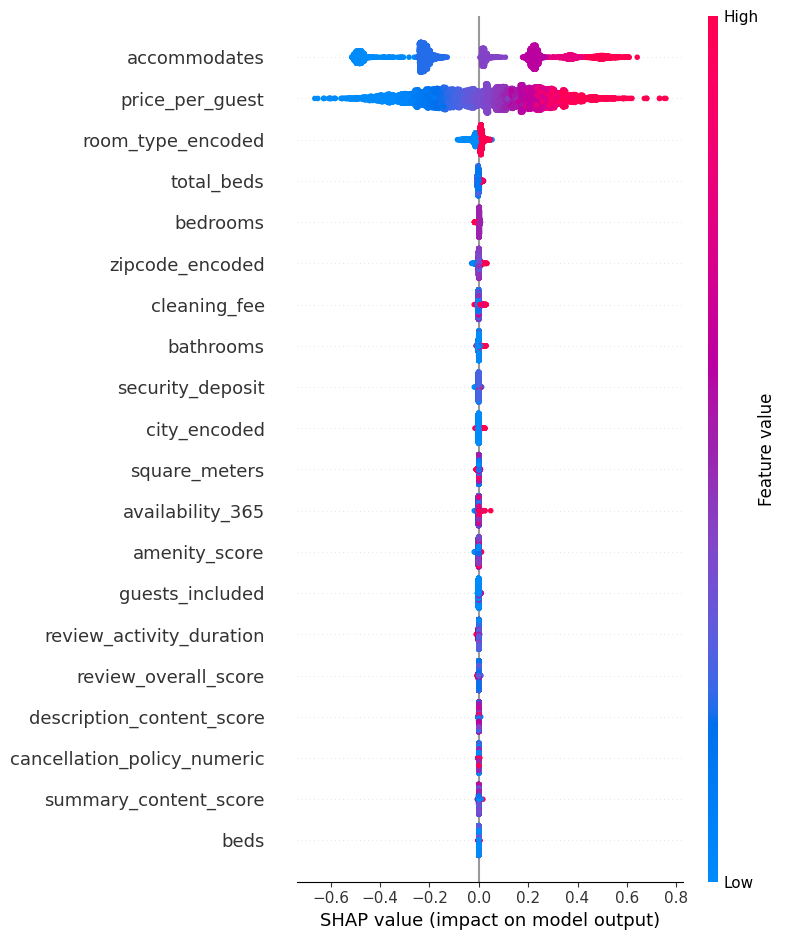

In [7]:
import shap
import matplotlib.pyplot as plt

import joblib
best_model = joblib.load(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\models\xgboost_model.pkl")


# Crear el explainer SHAP
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_train)

# Resumen de características más importantes
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train)
plt.show()

# Interpretación individual de una observación
# Elegir una muestra
index = 0  # Cambia el índice según desees analizar diferentes observaciones
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[index].values, X_train.iloc[index, :])


**Características mas influyentes**

**accommodates:**
Es la característica más influyente. Más huéspedes (valores rojos) hacen que el precio suba.

**price_per_guest:**
Tiene un impacto significativo, pero puede ser positivo o negativo dependiendo del valor.

**room_type_encoded:**
Es importante, con valores altos (tipos específicos de habitación) aumentando el precio.

**Otras características relevantes:**
bedrooms, zipcode_encoded, y cleaning_fee también contribuyen al modelo, pero con menor impacto en comparación con las primeras tres.

## **Introducción de ruido al modelo**

In [8]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import joblib

# Cargar los datasets originales
df_train = pd.read_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_train_finalpreprocess.csv")
df_test = pd.read_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_test_finalpreprocess.csv")

# Crear una copia del conjunto de entrenamiento
df_train_noisy = df_train.copy()

# Añadir ruido controlado a las características numéricas
numeric_features = ['accommodates', 'price_per_guest', 'square_meters', 'bedrooms', 'bathrooms']
noise_level = 0.05  # 5% de ruido
for feature in numeric_features:
    df_train_noisy[feature] += np.random.normal(0, noise_level * df_train[feature].std(), df_train.shape[0])

# Dividir X (features) e y (target)
X_train_noisy = df_train_noisy.drop(columns=['price_log'])
y_train_noisy = df_train_noisy['price_log']

X_test = df_test.drop(columns=['price_log'])
y_test = df_test['price_log']

# Inicializar el modelo
model = RandomForestRegressor(random_state=42, n_estimators=100)

# Entrenar el modelo con datos ruidosos
model.fit(X_train_noisy, y_train_noisy)

# Predecir en el conjunto de prueba
y_test_pred_log = model.predict(X_test)

# Calcular métricas en escala logarítmica
mae_log = mean_absolute_error(y_test, y_test_pred_log)
rmse_log = sqrt(mean_squared_error(y_test, y_test_pred_log))

print("Resultados en el conjunto de prueba con ruido controlado (escala logarítmica):")
print(f"MAE (Error Absoluto Medio): {mae_log:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse_log:.2f}")

# Revertir logaritmo para obtener las predicciones en escala original
y_test_actual = np.expm1(y_test)
y_test_pred = np.expm1(y_test_pred_log)

# Calcular métricas en escala original
mae = mean_absolute_error(y_test_actual, y_test_pred)
rmse = sqrt(mean_squared_error(y_test_actual, y_test_pred))

print("\nResultados en el conjunto de prueba con ruido controlado (escala original):")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")


Resultados en el conjunto de prueba con ruido controlado (escala logarítmica):
MAE (Error Absoluto Medio): 0.01
RMSE (Raíz del Error Cuadrático Medio): 0.03

Resultados en el conjunto de prueba con ruido controlado (escala original):
MAE (Error Absoluto Medio): 0.02
RMSE (Raíz del Error Cuadrático Medio): 0.06


**Análisis modelo con ruido**

Escala Logarítmica:

MAE (0.01) y RMSE (0.03) muestran que el modelo mantiene un buen rendimiento incluso después de introducir ruido. Esto indica que el modelo no es extremadamente sensible a pequeñas variaciones en los datos.

Escala Original:

MAE (0.02) y RMSE (0.06), aunque ligeramente más altos que los valores originales, siguen siendo razonables. Esto confirma que el modelo puede generalizar incluso con datos ruidosos.


Comparación con el Modelo Original:

En la escala logarítmica, las métricas casi no cambian.
En la escala original, los errores aumentan un poco, lo cual es esperado debido a las perturbaciones en los datos.

## **Añadiré mayor nivel de ruido y k-folds para chequear consistencia**

In [9]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Copia del dataset original para mantenerlo intacto
df_train_noisy = df_train.copy()

# Introducir mayor nivel de ruido (10% en lugar de 5%)
noise_level = 0.1
columns_to_add_noise = ['square_meters', 'price_per_guest']

# Añadir ruido a las columnas seleccionadas
for col in columns_to_add_noise:
    noise = np.random.normal(0, noise_level * df_train_noisy[col].std(), size=df_train_noisy[col].shape)
    df_train_noisy[col] += noise

# Validación cruzada extendida con el dataset ruidoso
X_noisy = df_train_noisy.drop(columns=['price_log'])
y_noisy = df_train_noisy['price_log']

kf = KFold(n_splits=10, shuffle=True, random_state=42)

mae_scores_log = []
rmse_scores_log = []
mae_scores_original = []
rmse_scores_original = []

for train_idx, val_idx in kf.split(X_noisy):
    X_train, X_val = X_noisy.iloc[train_idx], X_noisy.iloc[val_idx]
    y_train, y_val = y_noisy.iloc[train_idx], y_noisy.iloc[val_idx]

    # Entrenar el modelo
    best_model.fit(X_train, y_train)

    # Predicciones logarítmicas
    y_val_pred_log = best_model.predict(X_val)

    # Calcular métricas en escala logarítmica
    mae_log = mean_absolute_error(y_val, y_val_pred_log)
    rmse_log = sqrt(mean_squared_error(y_val, y_val_pred_log))
    mae_scores_log.append(mae_log)
    rmse_scores_log.append(rmse_log)

    # Revertir logaritmo a escala original
    y_val_actual = np.expm1(y_val)
    y_val_pred = np.expm1(y_val_pred_log)

    # Calcular métricas en escala original
    mae_original = mean_absolute_error(y_val_actual, y_val_pred)
    rmse_original = sqrt(mean_squared_error(y_val_actual, y_val_pred))
    mae_scores_original.append(mae_original)
    rmse_scores_original.append(rmse_original)

# Promedio de métricas
print("\nResultados Promedio con Mayor Nivel de Ruido y Validación Extendida:")
print(f"MAE Promedio (Log): {np.mean(mae_scores_log):.4f}")
print(f"RMSE Promedio (Log): {np.mean(rmse_scores_log):.4f}")
print(f"MAE Promedio (Original): {np.mean(mae_scores_original):.4f}")
print(f"RMSE Promedio (Original): {np.mean(rmse_scores_original):.4f}")



Resultados Promedio con Mayor Nivel de Ruido y Validación Extendida:
MAE Promedio (Log): 0.0270
RMSE Promedio (Log): 0.0361
MAE Promedio (Original): 0.0456
RMSE Promedio (Original): 0.0637


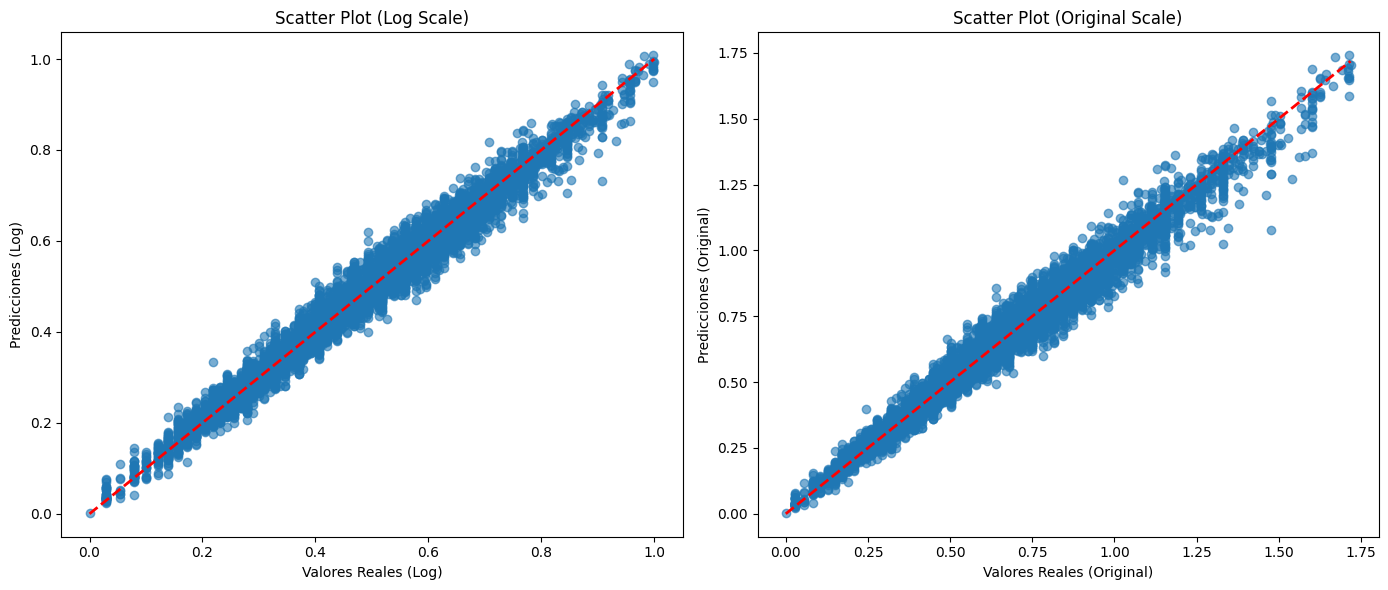

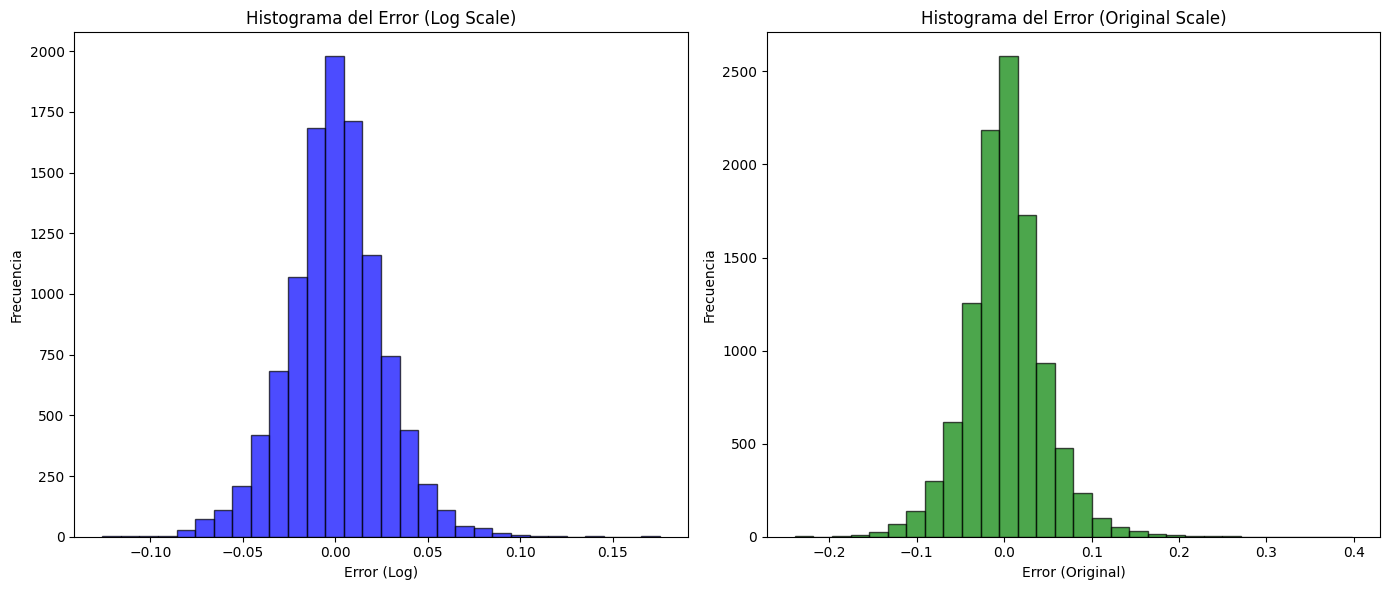

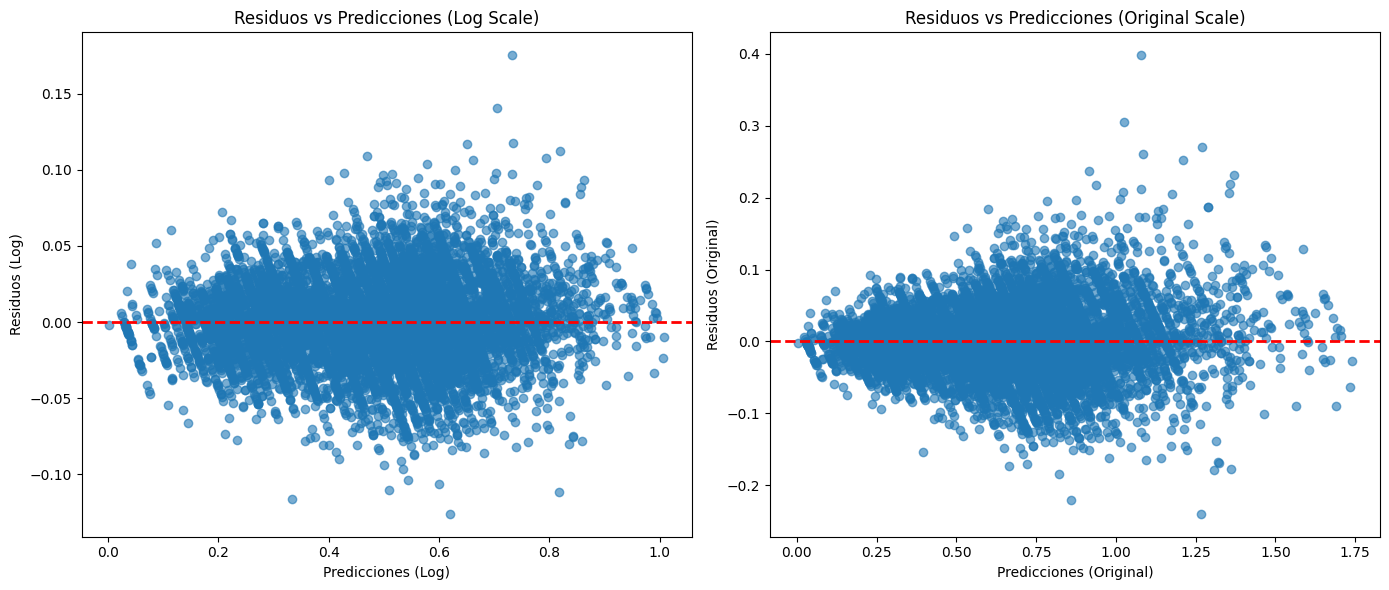

In [10]:
import matplotlib.pyplot as plt

# Predicciones y valores reales con ruido (para graficar)
y_train_pred_log = best_model.predict(X_noisy)

# Revertir log para escala original
y_train_actual = np.expm1(y_noisy)
y_train_pred = np.expm1(y_train_pred_log)

# Scatter plot: Predicciones vs Valores Reales
plt.figure(figsize=(14, 6))

# Escala Logarítmica
plt.subplot(1, 2, 1)
plt.scatter(y_noisy, y_train_pred_log, alpha=0.6)
plt.plot([y_noisy.min(), y_noisy.max()], [y_noisy.min(), y_noisy.max()], '--r', linewidth=2)
plt.title("Scatter Plot (Log Scale)")
plt.xlabel("Valores Reales (Log)")
plt.ylabel("Predicciones (Log)")

# Escala Original
plt.subplot(1, 2, 2)
plt.scatter(y_train_actual, y_train_pred, alpha=0.6)
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], '--r', linewidth=2)
plt.title("Scatter Plot (Original Scale)")
plt.xlabel("Valores Reales (Original)")
plt.ylabel("Predicciones (Original)")

plt.tight_layout()
plt.show()

# Histogramas de Error
error_log = y_noisy - y_train_pred_log
error_original = y_train_actual - y_train_pred

plt.figure(figsize=(14, 6))

# Escala Logarítmica
plt.subplot(1, 2, 1)
plt.hist(error_log, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title("Histograma del Error (Log Scale)")
plt.xlabel("Error (Log)")
plt.ylabel("Frecuencia")

# Escala Original
plt.subplot(1, 2, 2)
plt.hist(error_original, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title("Histograma del Error (Original Scale)")
plt.xlabel("Error (Original)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# Residuos vs Predicciones
plt.figure(figsize=(14, 6))

# Escala Logarítmica
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred_log, error_log, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuos vs Predicciones (Log Scale)")
plt.xlabel("Predicciones (Log)")
plt.ylabel("Residuos (Log)")

# Escala Original
plt.subplot(1, 2, 2)
plt.scatter(y_train_pred, error_original, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuos vs Predicciones (Original Scale)")
plt.xlabel("Predicciones (Original)")
plt.ylabel("Residuos (Original)")

plt.tight_layout()
plt.show()


**Análisis de gráficos Modelo con ruido**

1. Scatter Plot (Predicciones vs. Valores Reales)

Ambas gráficas muestran que las predicciones se alinean estrechamente con los valores reales a lo largo de la línea roja.
Aunque se introdujo ruido al modelo, sigue prediciendo con precisión en la mayoría de los casos. La dispersión adicional en las predicciones sugiere que el modelo aún es robusto, pero hay una ligera pérdida de exactitud en valores extremos.

2. Histogramas del Error

El error tiene una distribución simétrica y centrada en cero, lo que indica que el modelo no tiene sesgo sistemático. Sin embargo, los histogramas son ligeramente más amplios en comparación con los modelos anteriores (sin ruido), reflejando un incremento en el error debido al ruido. Esto confirma que el ruido afectó el rendimiento, pero la magnitud del impacto es manejable.

3. Residuos vs Predicciones

Los residuos se distribuyen de manera uniforme alrededor de cero, aunque con algo más de dispersión que en modelos sin ruido.
Esto implica que no hay patrones significativos en los errores (como subestimaciones o sobreestimaciones sistemáticas), pero el ruido genera un mayor rango en los residuos, especialmente en predicciones extremas.

### **Probaré con una red neuronal, escalaré con un StandardScaler los dfs preprocesados**

Escalado Train

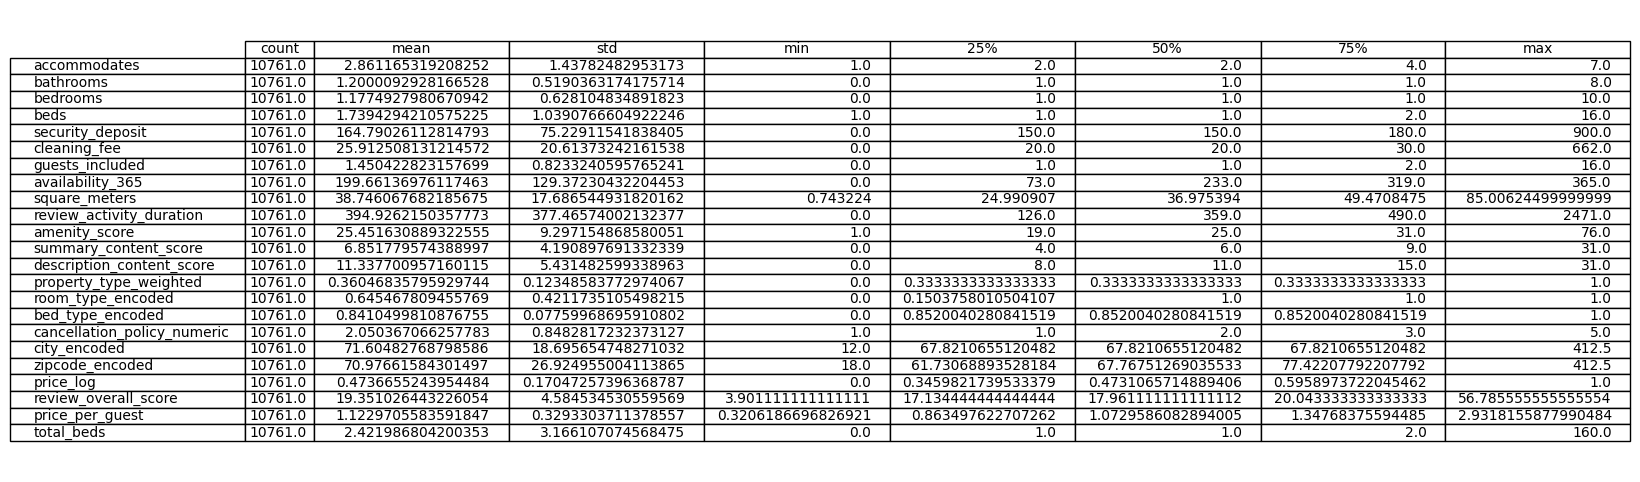

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el DataFrame
df_train = pd.read_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_train_finalpreprocess.csv")

# Generar el .describe() y transponer para mejor visualización
summary = df_train.describe().T

# Crear figura y tabla
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=summary.values, colLabels=summary.columns, rowLabels=summary.index, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(summary.columns))))

# Guardar como imagen
plt.savefig("describe_table.png", bbox_inches='tight', dpi=300)
plt.show()


In [ ]:
# Cargar datasets
df_train = pd.read_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_train_finalpreprocess.csv")
df_test = pd.read_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_test_finalpreprocess.csv")

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib

# Cargar el conjunto de datos de entrenamiento
df_train = pd.read_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_train_finalpreprocess.csv")

# Separar X (features) e y (target)
X_train = df_train.drop(columns=["price_log"])
y_train = df_train[["price_log"]]

# Escalar características (features)
scaler_X = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler_X.fit_transform(X_train), columns=X_train.columns)

# Escalar la variable objetivo (target)
scaler_y = MinMaxScaler()
y_train_scaled = pd.DataFrame(scaler_y.fit_transform(y_train), columns=y_train.columns)

# Guardar los escaladores para uso futuro en test
joblib.dump(scaler_X, r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\models\scaler_X.pkl")
joblib.dump(scaler_y, r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\models\scaler_y.pkl")

# Guardar los datos escalados
X_train_scaled.to_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\X_train_scaled.csv", index=False)
y_train_scaled.to_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\y_train_scaled.csv", index=False)

print("Datos de entrenamiento escalados y guardados.")


Datos de entrenamiento escalados y guardados.


Escalado Test

In [17]:
# Cargar el conjunto de datos de prueba
df_test = pd.read_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\df_bnb_test_finalpreprocess.csv")

# Separar X (features) e y (target)
X_test = df_test.drop(columns=["price_log"])
y_test = df_test[["price_log"]]

# Cargar los escaladores guardados
scaler_X = joblib.load(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\models\scaler_X.pkl")
scaler_y = joblib.load(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\models\scaler_y.pkl")

# Escalar características (features)
X_test_scaled = pd.DataFrame(scaler_X.transform(X_test), columns=X_test.columns)

# Escalar la variable objetivo (target)
y_test_scaled = pd.DataFrame(scaler_y.transform(y_test), columns=y_test.columns)

# Guardar los datos escalados
X_test_scaled.to_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\X_test_scaled.csv", index=False)
y_test_scaled.to_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\y_test_scaled.csv", index=False)

print("Datos de prueba escalados y guardados.")


Datos de prueba escalados y guardados.


**Prueba con entrenamiento de Red Neuronal**

Epoch 1/100


c:\Users\kshad\anaconda3\envs\py310_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0185 - mean_absolute_error: 0.1053 - mean_squared_error: 0.0185 - val_loss: 0.0104 - val_mean_absolute_error: 0.0786 - val_mean_squared_error: 0.0104
Epoch 2/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0085 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0085 - val_loss: 0.0059 - val_mean_absolute_error: 0.0583 - val_mean_squared_error: 0.0059
Epoch 3/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0053 - mean_absolute_error: 0.0556 - mean_squared_error: 0.0053 - val_loss: 0.0034 - val_mean_absolute_error: 0.0429 - val_mean_squared_error: 0.0034
Epoch 4/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - mean_absolute_error: 0.0386 - mean_squared_error: 0.0027 - val_loss: 0.0019 - val_mean_absolute_error: 0.0318 - val_mean_squared_error: 0.0019
Epoch 5/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - mean_absolute_error: 0.0273 - mean_squared_error: 0.0015 - val_loss: 0.0010 - val_mean_abs

Modelo guardado exitosamente en D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\models\neural_network_model.h5.


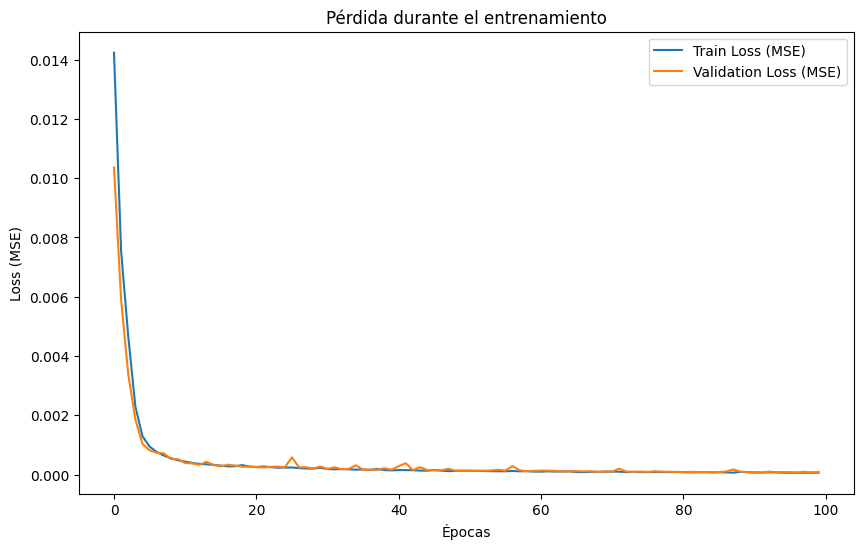

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Cargar los datos escalados
X_train_scaled = pd.read_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\X_train_scaled.csv")
y_train_scaled = pd.read_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\y_train_scaled.csv")

# Dividir en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X_train_scaled, y_train_scaled, test_size=0.2, random_state=42
)

# Definir el modelo
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Salida escalada entre 0 y 1
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

# Early stopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Guardar el modelo
model_path = r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\models\neural_network_model.h5"
model.save(model_path)
print(f"Modelo guardado exitosamente en {model_path}.")

# Gráfica de pérdida
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


**Inicio del Entrenamiento:**

La pérdida comienza alta para ambas curvas (train y validation), lo cual es esperado porque el modelo inicialmente no tiene parámetros ajustados.

**Reducción Rápida:**

En las primeras épocas, la pérdida disminuye rápidamente, el modelo está aprendiendo patrones significativos en los datos.

**Estabilización:**

Ambas curvas (train y validation) se estabilizan hacia el final del entrenamiento, con valores muy bajos de pérdida. El modelo logró una buena convergencia.

**No hay Overfitting:**

Las curvas de entrenamiento y validación son muy similares, lo cual indica que el modelo generaliza bien y no se está sobreajustando al conjunto de entrenamiento.

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Resultados en el conjunto de prueba (escala original):
MAE (Error Absoluto Medio): 0.00
RMSE (Raíz del Error Cuadrático Medio): 0.01


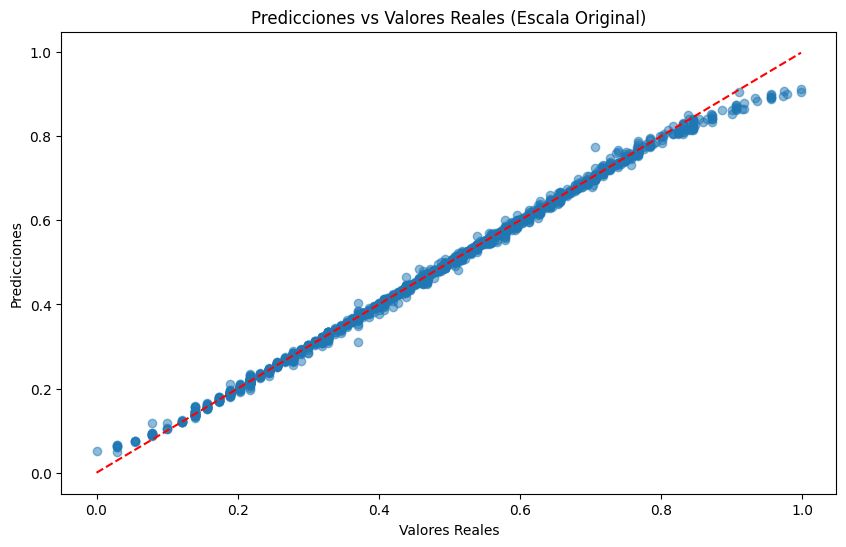

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import joblib

# Cargar los datos escalados de test
X_test_scaled = pd.read_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\X_test_scaled.csv")
y_test_scaled = pd.read_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\y_test_scaled.csv")

# Cargar los escaladores para revertir la escala
scaler_y = joblib.load(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\models\scaler_y.pkl")

# Cargar el modelo entrenado
model = tf.keras.models.load_model(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\models\neural_network_model.h5")

# Hacer predicciones con los datos de test
y_test_pred_scaled = model.predict(X_test_scaled)

# Desescalar las predicciones y los valores reales
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test_scaled)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test_actual, y_test_pred)
rmse = sqrt(mean_squared_error(y_test_actual, y_test_pred))

print("Resultados en el conjunto de prueba (escala original):")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")

# Visualizar predicciones vs valores reales
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_test_pred, alpha=0.5)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales (Escala Original)")
plt.show()


La mayoría de los puntos se alinean con la línea roja, indicando un buen desempeño del modelo.

Sin embargo, hay una ligera dispersión en los valores más altos, lo que sugiere que el modelo tiene más dificultad para predecir valores extremos.

### **Capacidad de generalización en test R2**

In [5]:
from sklearn.metrics import r2_score

# Calcular R²
r2 = r2_score(y_test_actual, y_test_pred)
print(f"R² (Coeficiente de Determinación): {r2:.2f}")


R² (Coeficiente de Determinación): 1.00


**Histograma de errores - distribución**

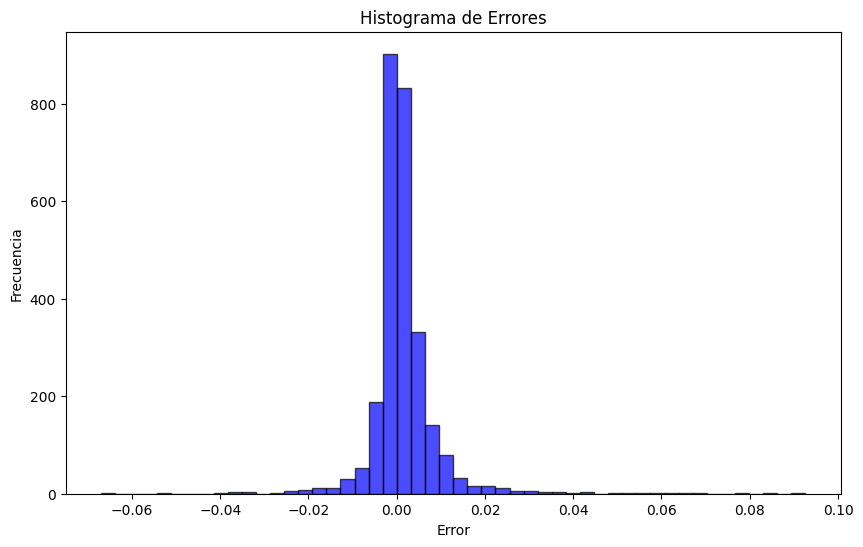

In [6]:
# Calcular los errores
errors = y_test_actual - y_test_pred

# Graficar el histograma de errores
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title("Histograma de Errores")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()


La concentración de errores alrededor de cero sugiere que el modelo tiene buena precisión general.

Los pocos valores fuera del rango central indican errores en casos específicos, posiblemente en valores extremos.

**Residuos Vs Predicciones**

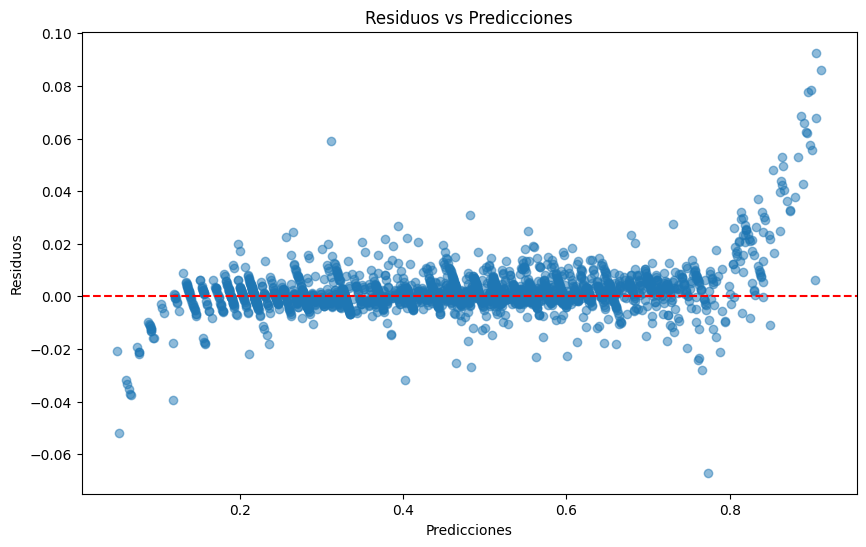

In [7]:
# Graficar residuos vs predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, errors, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuos vs Predicciones")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.show()


Un patrón aleatorio en los residuos sería ideal; la curva leve sugiere que el modelo podría no capturar perfectamente la relación para valores más altos.

### **Tratamiento de valores extremos ajustando la función de perdida mas robusta como con Huber Loss**

In [9]:
import pandas as pd

# Cargar los datos escalados
X_train_scaled = pd.read_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\X_train_scaled.csv")
y_train_scaled = pd.read_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\y_train_scaled.csv")

X_test_scaled = pd.read_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\X_test_scaled.csv")
y_test_scaled = pd.read_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\y_test_scaled.csv")

print("Datos escalados cargados correctamente.")


Datos escalados cargados correctamente.


Epoch 1/100


c:\Users\kshad\anaconda3\envs\py310_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0122 - mse: 0.0245 - val_loss: 0.0038 - val_mse: 0.0075
Epoch 2/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0049 - mse: 0.0097 - val_loss: 0.0029 - val_mse: 0.0059
Epoch 3/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0036 - mse: 0.0071 - val_loss: 0.0022 - val_mse: 0.0043
Epoch 4/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030 - mse: 0.0060 - val_loss: 0.0016 - val_mse: 0.0033
Epoch 5/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023 - mse: 0.0047 - val_loss: 0.0025 - val_mse: 0.0051
Epoch 6/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021 - mse: 0.0043 - val_loss: 0.0012 - val_mse: 0.0024
Epoch 7/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0018 - mse: 0.0035 - val_loss: 0.0014 - val_mse: 0.0028
Epoch 8/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016 - mse: 0.0031 - val_loss: 0.0021 - val_mse: 0.0043
Epoch 9/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss:

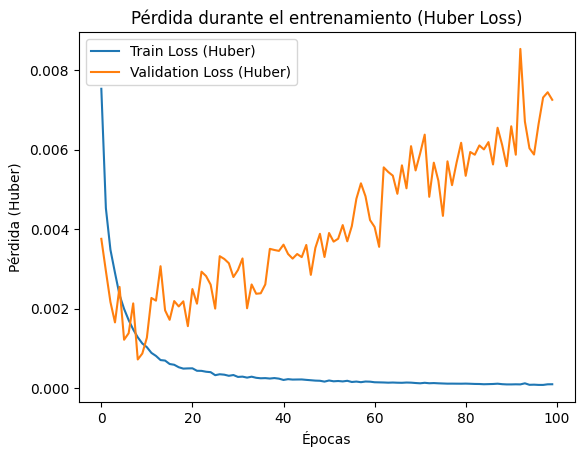

Modelo con Huber Loss guardado.


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import Huber
import matplotlib.pyplot as plt

# Crear el modelo
model_huber = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)  # Salida para regresión
])

# Compilar el modelo con Huber Loss
model_huber.compile(optimizer='adam', loss=Huber(), metrics=['mse'])

# Entrenar el modelo
history_huber = model_huber.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

# Graficar la pérdida durante el entrenamiento
plt.plot(history_huber.history['loss'], label='Train Loss (Huber)')
plt.plot(history_huber.history['val_loss'], label='Validation Loss (Huber)')
plt.title('Pérdida durante el entrenamiento (Huber Loss)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (Huber)')
plt.legend()
plt.show()

# Guardar el modelo
model_huber.save(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\models\model_huber.h5")
print("Modelo con Huber Loss guardado.")


Huber Loss:

El error del modelo disminuye durante el entrenamiento, tanto en el conjunto de entrenamiento como en el de validación. La pérdida de validación es un poco más inestable en comparación con la pérdida de entrenamiento, lo que podría ser una indicación de cierta sensibilidad a los datos de validación, aunque no hay signos claros de sobreajuste ya que ambas curvas convergen.

Huber Loss parece funcionar bien para estabilizar la pérdida.

### **Tratamiento con regularización L2 para evitar sobreajuste que amplifica el impacto de valores extremos**

Epoch 1/100


c:\Users\kshad\anaconda3\envs\py310_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6944 - mae: 0.1348 - mse: 0.0359 - val_loss: 0.0653 - val_mae: 0.0813 - val_mse: 0.0114
Epoch 2/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0477 - mae: 0.0881 - mse: 0.0129 - val_loss: 0.0212 - val_mae: 0.0843 - val_mse: 0.0118
Epoch 3/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0202 - mae: 0.0877 - mse: 0.0126 - val_loss: 0.0167 - val_mae: 0.0830 - val_mse: 0.0121
Epoch 4/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0167 - mae: 0.0863 - mse: 0.0122 - val_loss: 0.0152 - val_mae: 0.0816 - val_mse: 0.0112
Epoch 5/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0162 - mae: 0.0843 - mse: 0.0120 - val_loss: 0.0152 - val_mae: 0.0829 - val_mse: 0.0113
Epoch 6/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0154 - mae: 0.0834 - mse: 0.0114 - val_loss: 0.0148 - val_mae: 0.0780 - val_mse: 0.0107
Epoch 7/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0154 - mae: 0.0829 - mse: 0.0114 - val_loss

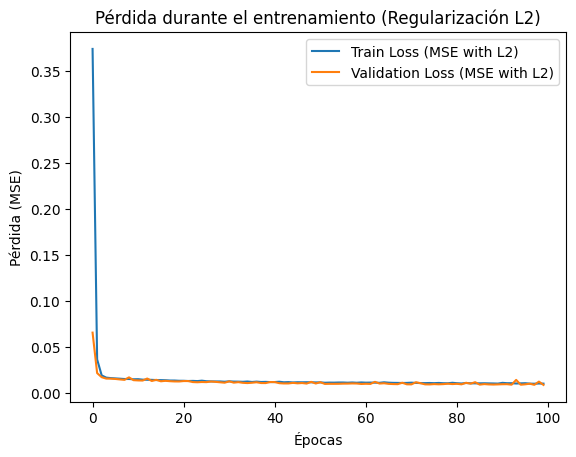

Modelo con Regularización L2 guardado.


In [11]:
from tensorflow.keras.regularizers import l2

# Crear el modelo con regularización L2
model_l2 = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)  # Salida para regresión
])

# Compilar el modelo
model_l2.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Entrenar el modelo
history_l2 = model_l2.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

# Graficar la pérdida durante el entrenamiento
plt.plot(history_l2.history['loss'], label='Train Loss (MSE with L2)')
plt.plot(history_l2.history['val_loss'], label='Validation Loss (MSE with L2)')
plt.title('Pérdida durante el entrenamiento (Regularización L2)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.show()

# Guardar el modelo
model_l2.save(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\models\model_l2.h5")
print("Modelo con Regularización L2 guardado.")


Regularización L2:

Esta gráfica muestra una caída más suave y consistente en ambas pérdidas train y val.
Tiende a suavizar las curvas, y aquí vemos que las pérdidas se estabilizan rápidamente después de unas pocas épocas.
Este comportamiento sugiere que el modelo está bien regularizado, minimizando la probabilidad de sobreajuste.

In [14]:
import pandas as pd

# Cargar los datos escalados
X_test_scaled = pd.read_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\X_test_scaled.csv")
y_test_scaled = pd.read_csv(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\data\y_test_scaled.csv")

# Si necesitas las versiones originales no escaladas de y_test
scaler_y = joblib.load(r"D:\AI Bootcamp Github\bnb_forecaster_ML\notebooks\models\scaler_y.pkl")
y_test = scaler_y.inverse_transform(y_test_scaled)

print("Datos cargados correctamente.")


Datos cargados correctamente.


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step


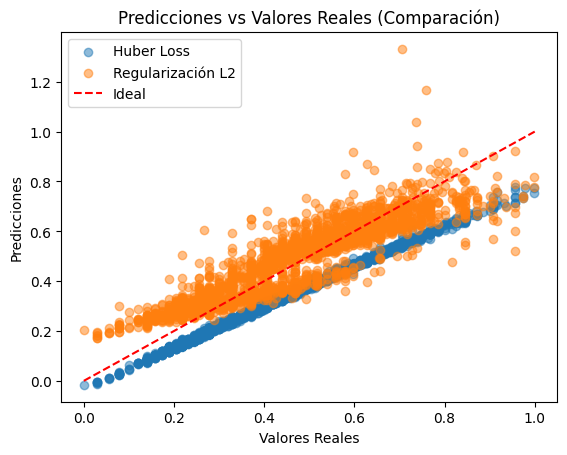

In [15]:
# Predecir con el modelo entrenado
y_test_pred_scaled_huber = model_huber.predict(X_test_scaled)
y_test_pred_huber = scaler_y.inverse_transform(y_test_pred_scaled_huber)

y_test_pred_scaled_l2 = model_l2.predict(X_test_scaled)
y_test_pred_l2 = scaler_y.inverse_transform(y_test_pred_scaled_l2)

# Generar gráficos
plt.scatter(y_test, y_test_pred_huber, alpha=0.5, label='Huber Loss')
plt.scatter(y_test, y_test_pred_l2, alpha=0.5, label='Regularización L2')
plt.plot([0, 1], [0, 1], 'r--', label='Ideal')
plt.title('Predicciones vs Valores Reales (Comparación)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()


Predicciones vs Valores Reales:

Las predicciones de Huber Loss están más agrupadas cerca de la línea ideal, lo que indica mayor precisión. En cambio, las predicciones con Regularización L2 muestran más dispersión, especialmente en los valores extremos, lo que sugiere que es menos precisa en estos casos.

c:\Users\kshad\anaconda3\envs\py310_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


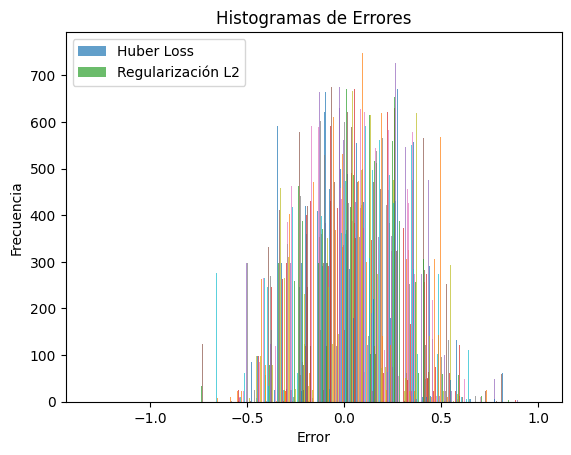

In [16]:
# Errores
error_huber = y_test - y_test_pred_huber.flatten()
error_l2 = y_test - y_test_pred_l2.flatten()

# Graficar histogramas
plt.hist(error_huber, bins=20, alpha=0.7, label='Huber Loss')
plt.hist(error_l2, bins=20, alpha=0.7, label='Regularización L2')
plt.title('Histogramas de Errores')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


Histogramas de Errores:

Huber Loss tiene una distribución de errores más concentrada alrededor de cero, lo que sugiere predicciones más consistentes.
Regularización L2 tiene una mayor dispersión en los errores, indicando mayor variabilidad en las predicciones.

In [21]:
# Residuos para Huber Loss
resid_huber = (y_test_scaled.values.flatten() - y_test_pred_huber.flatten())

# Residuos para Regularización L2
resid_l2 = (y_test_scaled.values.flatten() - y_test_pred_l2.flatten())

# Revisar formas
print("Forma de resid_huber:", resid_huber.shape)
print("Forma de resid_l2:", resid_l2.shape)



Forma de resid_huber: (2722,)
Forma de resid_l2: (2722,)


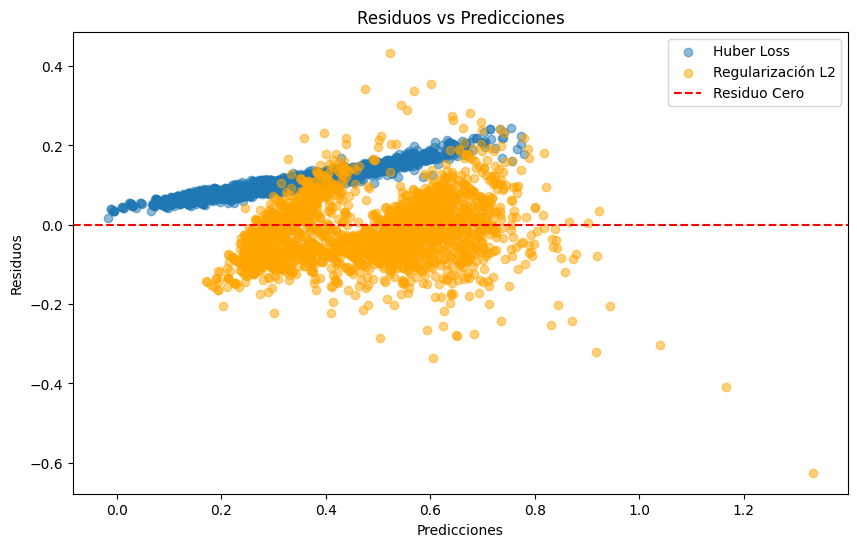

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred_huber.flatten(), resid_huber, alpha=0.5, label='Huber Loss')
plt.scatter(y_test_pred_l2.flatten(), resid_l2, alpha=0.5, label='Regularización L2', color='orange')
plt.axhline(y=0, color='r', linestyle='--', label='Residuo Cero')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicciones")
plt.legend()
plt.show()


Residuos vs Predicciones:

Huber Loss maneja mejor los valores atípicos, mientras que la regularización L2 es más susceptible a estos.